## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings


from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler,PowerTransformer
from scipy.stats import norm
from scipy.stats import stats
from scipy.stats import probplot

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve,auc
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.pipeline import make_pipeline

from collections import Counter # counter takes values returns value_counts dictionary


%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
plt.style.use('ggplot')

/Users/vidhu/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/vidhu/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/vidhu/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.2

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

## Exploratory data analysis

In [3]:
creditcard_df = pd.read_csv('./dataset/creditcard.csv')
creditcard_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

### Lets look at information of dataset

In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Lets check for missing values and duplicates

In [5]:
pd.DataFrame([[creditcard_df.shape],
            [creditcard_df.isnull().sum().sum()],
             [creditcard_df.duplicated().sum()]],
            columns = ['Credit Card Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

Credit Card Data Set
Shape               (284807, 31)
Missingness                    0
Duplicates                  1081

#### There are no null values and there are 1081 duplicate rows

### Lets explore the duplicate rows

In [6]:
creditcard_df[creditcard_df.duplicated()]

Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
221        145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   
223        145.0 -2.419486  1.949346  0.552998  0.982710 -0.284815  2.411200   
1178       919.0  0.904289 -0.538055  0.396058  0.500680 -0.864473 -0.657199   
1180       919.0  1.207596 -0.036860  0.572104  0.373148 -0.709633 -0.713698   
1382      1074.0 -2.248488 -0.195670  0.026949 -0.525780 -0.238759 -0.033359   
1384      1074.0 -2.445204 -0.505494  0.164511 -0.449658  0.460784 -0.509035   
1684      1308.0 -1.322313  0.863591  1.844234  1.089375  0.771005  0.152191   
1686      1308.0 -1.379848  0.536720  2.647870  1.408111  0.126442  0.986525   
2004      1548.0 -1.559446  1.425546  0.812589 -1.129381  0.507528  0.183507   
2005      1548.0 -1.559446  1.425546  0.812589 -1.129381  0.507528  0.183507   
2006      1548.0 -1.559446  1.425546  0.812589 -1.129381  0.507528  0.183507   
2728      2270.0 -2.171193  1.521296  0.698043  1.480960 -1.096511  1.118980   
2729      2270.0 -2.171193  1.521296  0.698043  1.480960 -1.096511  1.118980   
2731      2270.0 -2.181204  1.505528  0.705044  1.484834 -1.060910  1.094772   
2732      2270.0 -2.181204  1.505528  0.705044  1.484834 -1.060910  1.094772   
2734      2270.0 -2.187707  1.495286  0.709591  1.487350 -1.037785  1.079047   
2735      2270.0 -2.187707  1.495286  0.709591  1.487350 -1.037785  1.079047   
2784      2323.0 -2.106211  0.577057  1.717694  1.444458 -0.291290  1.200384   
2786      2323.0 -2.126258  0.545482  1.731713  1.452215 -0.219999  1.151908   
2998      2550.0 -1.055610  0.012962  2.178270  1.351661  1.462775 -0.167862   
3000      2550.0 -1.051814  0.018941  2.175615  1.350192  1.449274 -0.158682   
3175      2749.0 -0.654613  0.969360  1.689934  1.055019 -0.491793 -0.006999   
3177      2749.0 -0.624780  1.016347  1.669072  1.043474 -0.597883  0.065141   
3316      2866.0  1.020962 -0.130374  0.550700  0.704957  0.080658  1.127452   
3318      2866.0  1.010472 -0.147709  0.544611  0.709368  0.075302  1.129406   
...          ...       ...       ...       ...       ...       ...       ...   
279885  169157.0  2.126109  0.573392 -3.701094  0.321675  1.653259 -1.270294   
279886  169157.0  2.126109  0.573392 -3.701094  0.321675  1.653259 -1.270294   
280183  169372.0 -6.169539  3.771115 -2.504633 -1.270182 -1.925098  0.547429   
280185  169372.0 -6.196340  3.728904 -2.485891 -1.259811 -1.829791  0.482622   
280926  169843.0  1.924094 -0.721592 -0.603073  0.401842 -0.665779 -0.126418   
280927  169843.0  1.924094 -0.721592 -0.603073  0.401842 -0.665779 -0.126418   
280929  169843.0  1.958888 -0.664099 -0.582879  0.387212 -0.648016 -0.132899   
280930  169843.0  1.958888 -0.664099 -0.582879  0.387212 -0.648016 -0.132899   
280932  169843.0  1.859202 -0.828823 -0.640738  0.429127 -0.698907 -0.114330   
280933  169843.0  1.859202 -0.828823 -0.640738  0.429127 -0.698907 -0.114330   
281132  169961.0 -2.459207  0.638012 -0.568412 -0.233576  0.086888 -0.400425   
281134  169961.0 -2.558954  0.121403  0.143790 -0.420826  0.146261 -0.402620   
281815  170436.0  1.866493 -0.203574 -0.324093  1.593772 -0.358219 -0.224203   
281817  170436.0  1.883706 -0.175130 -0.314103  1.586534 -0.349431 -0.227409   
282040  170620.0  1.865115 -0.146849  0.091506  1.800408 -0.886233 -0.808445   
282042  170620.0  1.867839 -0.142347  0.093087  1.799263 -0.884843 -0.808953   
282206  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282207  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282208  1707

#### All duplicate rows

In [7]:
creditcard_df[creditcard_df.duplicated(keep=False)]

Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
220        145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   
221        145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   
222        145.0 -2.419486  1.949346  0.552998  0.982710 -0.284815  2.411200   
223        145.0 -2.419486  1.949346  0.552998  0.982710 -0.284815  2.411200   
1177       919.0  0.904289 -0.538055  0.396058  0.500680 -0.864473 -0.657199   
1178       919.0  0.904289 -0.538055  0.396058  0.500680 -0.864473 -0.657199   
1179       919.0  1.207596 -0.036860  0.572104  0.373148 -0.709633 -0.713698   
1180       919.0  1.207596 -0.036860  0.572104  0.373148 -0.709633 -0.713698   
1381      1074.0 -2.248488 -0.195670  0.026949 -0.525780 -0.238759 -0.033359   
1382      1074.0 -2.248488 -0.195670  0.026949 -0.525780 -0.238759 -0.033359   
1383      1074.0 -2.445204 -0.505494  0.164511 -0.449658  0.460784 -0.509035   
1384      1074.0 -2.445204 -0.505494  0.164511 -0.449658  0.460784 -0.509035   
1683      1308.0 -1.322313  0.863591  1.844234  1.089375  0.771005  0.152191   
1684      1308.0 -1.322313  0.863591  1.844234  1.089375  0.771005  0.152191   
1685      1308.0 -1.379848  0.536720  2.647870  1.408111  0.126442  0.986525   
1686      1308.0 -1.379848  0.536720  2.647870  1.408111  0.126442  0.986525   
2003      1548.0 -1.559446  1.425546  0.812589 -1.129381  0.507528  0.183507   
2004      1548.0 -1.559446  1.425546  0.812589 -1.129381  0.507528  0.183507   
2005      1548.0 -1.559446  1.425546  0.812589 -1.129381  0.507528  0.183507   
2006      1548.0 -1.559446  1.425546  0.812589 -1.129381  0.507528  0.183507   
2727      2270.0 -2.171193  1.521296  0.698043  1.480960 -1.096511  1.118980   
2728      2270.0 -2.171193  1.521296  0.698043  1.480960 -1.096511  1.118980   
...          ...       ...       ...       ...       ...       ...       ...   
281134  169961.0 -2.558954  0.121403  0.143790 -0.420826  0.146261 -0.402620   
281814  170436.0  1.866493 -0.203574 -0.324093  1.593772 -0.358219 -0.224203   
281815  170436.0  1.866493 -0.203574 -0.324093  1.593772 -0.358219 -0.224203   
281816  170436.0  1.883706 -0.175130 -0.314103  1.586534 -0.349431 -0.227409   
281817  170436.0  1.883706 -0.175130 -0.314103  1.586534 -0.349431 -0.227409   
282039  170620.0  1.865115 -0.146849  0.091506  1.800408 -0.886233 -0.808445   
282040  170620.0  1.865115 -0.146849  0.091506  1.800408 -0.886233 -0.808445   
282041  170620.0  1.867839 -0.142347  0.093087  1.799263 -0.884843 -0.808953   
282042  170620.0  1.867839 -0.142347  0.093087  1.799263 -0.884843 -0.808953   
282205  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282206  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282207  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282208  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282209  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282210  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282211  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282212  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282213  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
282984  1712

In [8]:
creditcard_df[creditcard_df.duplicated(keep=False)]['Class'].value_counts()

0    1822
1      32
Name: Class, dtype: int64

In [9]:
creditcard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Lets try to check on report that should we drop duplicate rows or not

In [10]:
#Total Number od duplicated rows
print('Total number of duplicated rows: {0}'.format(creditcard_df[creditcard_df.duplicated(keep=False)].shape[0]))
print('Percentage of duplicate rows: {0}%'.format(
    round(100*creditcard_df.duplicated().sum()/creditcard_df['Class'].shape[0],2)))


#The class balance before dropping duplicates
print('\nNo. of rows before trying to drop duplicated rows: {0}'.format(creditcard_df.shape[0]))
print('Class Balance before trying to drop duplicated rows')
print(creditcard_df['Class'].value_counts(normalize=True))
ratio1 = round(creditcard_df['Class'].value_counts()[1]/creditcard_df['Class'].value_counts()[0],5)
print('Ratio of Fraudlent to Non-Fraudlent transactions: {0}'.format(ratio1))

#The class balance after dropping duplicates
print('\nNo. of rows after trying to drop duplicated rows: {0}'.format(
    creditcard_df.drop_duplicates(keep=False).shape[0]))
print('Class Balance after trying to drop duplicated rows')
print(creditcard_df.drop_duplicates(keep=False)['Class'].value_counts(normalize=True))
ratio1 = round(creditcard_df.drop_duplicates(keep=False)
              ['Class'].value_counts()[1]/creditcard_df.drop_duplicates(keep=False)['Class'].value_counts()[0],
              5)
print('Ratio of Fraudlent to Non-Fraudlent transactions: {0}'.format(ratio1))


Total number of duplicated rows: 1854
Percentage of duplicate rows: 0.38%

No. of rows before trying to drop duplicated rows: 284807
Class Balance before trying to drop duplicated rows
0    0.998273
1    0.001727
Name: Class, dtype: float64
Ratio of Fraudlent to Non-Fraudlent transactions: 0.00173

No. of rows after trying to drop duplicated rows: 282953
Class Balance after trying to drop duplicated rows
0    0.998374
1    0.001626
Name: Class, dtype: float64
Ratio of Fraudlent to Non-Fraudlent transactions: 0.00163


### Observations from above cell
    - The ratio of duplicate rows is very low (0.38%)
    - The target class is highly imbalanced. 
    - If we try to drop the duplicate rows we will further add on to the imbalance in class.
    - So, we will not drop these duplicate rows and will continue with EDA and Model Building

# Univariate and Bivatriate Analysis

### Lets view the Class column which is our target column

In [11]:
creditcard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
# Print percentage Value "0" and "1" in Target column
print('Value "0" in Class column percentage: {0:.2%}'.format(creditcard_df['Class'].value_counts(1)[0]))
print('Value "1" in Class column percentage: {0:.2%}'.format(creditcard_df['Class'].value_counts(1)[1]))

Value "0" in Class column percentage: 99.83%
Value "1" in Class column percentage: 0.17%


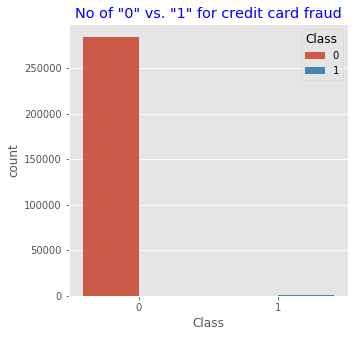

In [13]:
plt.figure(figsize=(5,5))
plt.title('No of "0" vs. "1" for credit card fraud',color='blue');
sns.countplot(x='Class',data=creditcard_df,hue='Class');

### Observations from above plot
- The data is highly imbalanced with only 0.17% of Class variable with values as 1
- We will have to handle this during data preparation/modeling

## 1. Lets explore Time and Class features

In [14]:
creditcard_df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

<b><font size=4>Scatter Plot between Time and Class</font></b>

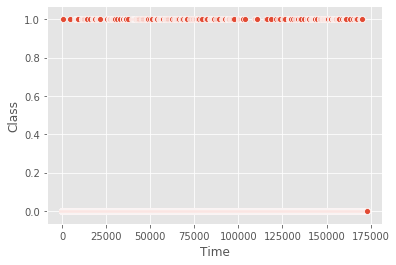

In [15]:
sns.scatterplot(x='Time',y='Class',data=creditcard_df);

### Lets plot distribution to get an idea of probability distribution

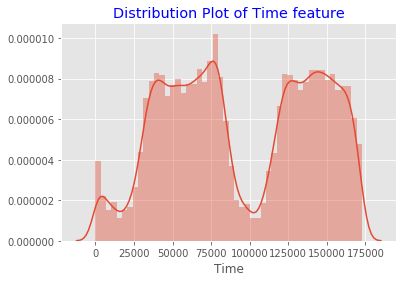

In [16]:
plt.title('Distribution Plot of Time feature',color='blue');
sns.distplot(creditcard_df['Time']);

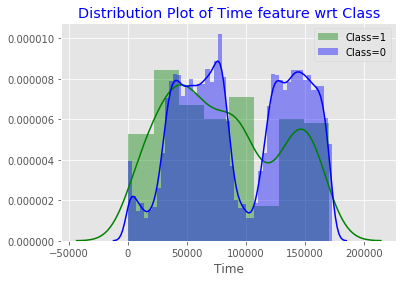

In [17]:
plt.title('Distribution Plot of Time feature wrt Class',color='blue');
sns.distplot(creditcard_df[creditcard_df['Class']==1]['Time'],color='green',label='Class=1');
sns.distplot(creditcard_df[creditcard_df['Class']==0]['Time'],color='blue',label='Class=0');
plt.legend();

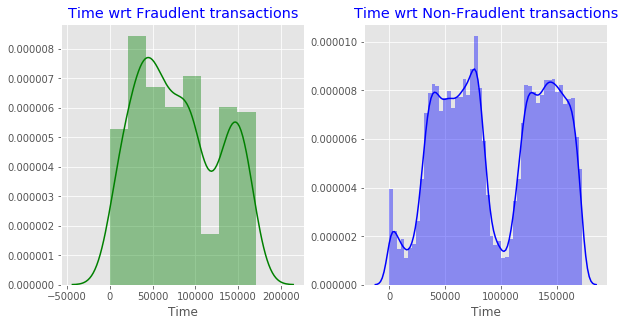

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Time wrt Fraudlent transactions',color='blue');
sns.distplot(creditcard_df[creditcard_df['Class']==1]['Time'],color='green',label='Class=1');
plt.tight_layout(pad=6.0)
plt.subplot(1,2,2)
plt.title('Time wrt Non-Fraudlent transactions',color='blue');
sns.distplot(creditcard_df[creditcard_df['Class']==0]['Time'],color='blue',label='Class=0');

### Observations from above plot
- There are two peaks of time. Probably because the data given is for two days
- We will further convert this time in seconds to hours to get more idea about the transactions occurence

### Convert Time in seconds to Time in Hours and Time in Days

In [19]:
# #Convert time in minutes
# creditcard_df['Time'] = creditcard_df['Time']/60/60

#Calculate hour of the day
creditcard_df['Time_Hour'] = creditcard_df['Time']/60/60%24
creditcard_df['Time_Hour'] = creditcard_df['Time_Hour'].apply(lambda x : math.floor(x))

#Convert time in days
creditcard_df['Time_Day'] = round(creditcard_df['Time']/60/60/24,0)
#To calculate whether its first day or second day
creditcard_df['Time_Day'] = creditcard_df['Time_Day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

creditcard_df[['Time','Time_Hour','Time_Day','Class']].head()

Time  Time_Hour  Time_Day  Class
0   0.0          0         1      0
1   0.0          0         1      0
2   1.0          0         1      0
3   1.0          0         1      0
4   2.0          0         1      0

In [20]:
creditcard_df[['Time','Time_Hour','Time_Day','Class']].tail()

Time  Time_Hour  Time_Day  Class
284802  172786.0         23         2      0
284803  172787.0         23         2      0
284804  172788.0         23         2      0
284805  172788.0         23         2      0
284806  172792.0         23         2      0

### Lets check the frequency of transactions in different hours of day

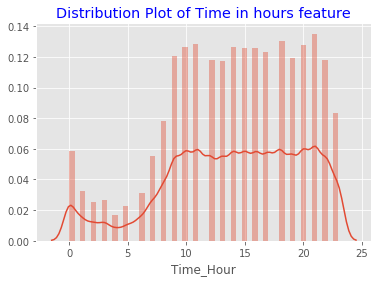

In [21]:
plt.title('Distribution Plot of Time in hours feature',color='blue');
sns.distplot(creditcard_df['Time_Hour']);

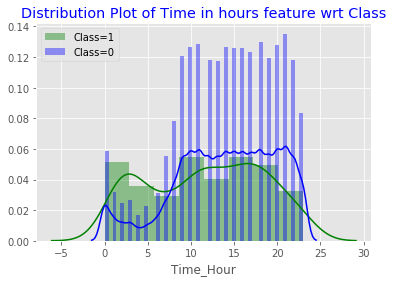

In [22]:
plt.title('Distribution Plot of Time in hours feature wrt Class',color='blue');
sns.distplot(creditcard_df[creditcard_df['Class']==1]['Time_Hour'],color='green',label='Class=1');
sns.distplot(creditcard_df[creditcard_df['Class']==0]['Time_Hour'],color='blue',label='Class=0');
plt.legend();

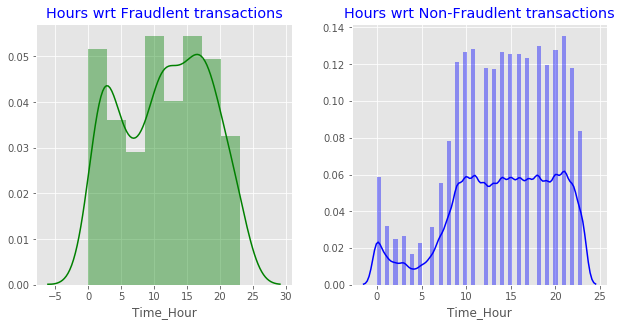

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Hours wrt Fraudlent transactions',color='blue');
sns.distplot(creditcard_df[creditcard_df['Class']==1]['Time_Hour'],color='green',label='Class=1');
plt.tight_layout(pad=6)
plt.subplot(1,2,2)
plt.title('Hours wrt Non-Fraudlent transactions',color='blue');
sns.distplot(creditcard_df[creditcard_df['Class']==0]['Time_Hour'],color='blue',label='Class=0');

### Observations from above cell
- Fraud Transactions are more prevelant in earlier part of the days between 12 midnight to 7am in morning
- Non-fradulent transactions are mostly in the time between 8am to 9pm

### Lets check the frequency of transactions in different days

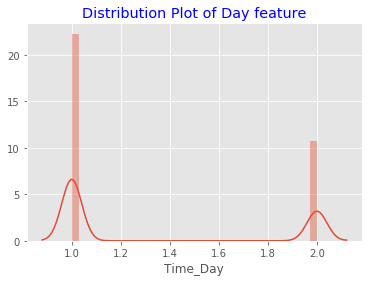

In [24]:
plt.title('Distribution Plot of Day feature',color='blue');
sns.distplot(creditcard_df['Time_Day']);

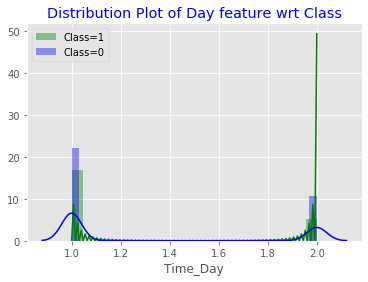

In [25]:
plt.title('Distribution Plot of Day feature wrt Class',color='blue');
sns.distplot(creditcard_df[creditcard_df['Class']==1]['Time_Day'],color='green',label='Class=1');
sns.distplot(creditcard_df[creditcard_df['Class']==0]['Time_Day'],color='blue',label='Class=0');
plt.legend();

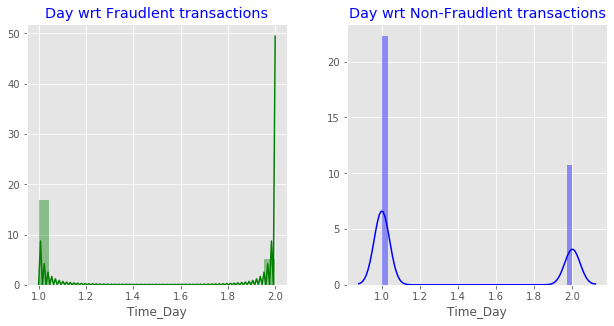

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Day wrt Fraudlent transactions',color='blue');
sns.distplot(creditcard_df[creditcard_df['Class']==1]['Time_Day'],color='green',label='Class=1');
plt.tight_layout(pad=6)
plt.subplot(1,2,2)
plt.title('Day wrt Non-Fraudlent transactions',color='blue');
sns.distplot(creditcard_df[creditcard_df['Class']==0]['Time_Day'],color='blue',label='Class=0');

### Observations from above cell
- More number of non-fraudlent transactions have occured on day 1 in comparison to day 2
- More number of fraudlent transactions have occured on day 2 in comparison to day 1

## 2. Lets explore Amount and Class features

### Lets plot distribution to get an idea of probability distribution

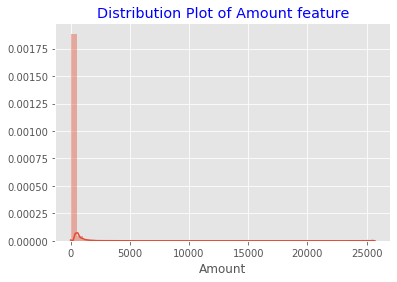

In [27]:
plt.title('Distribution Plot of Amount feature',color='blue');
sns.distplot(creditcard_df['Amount']);

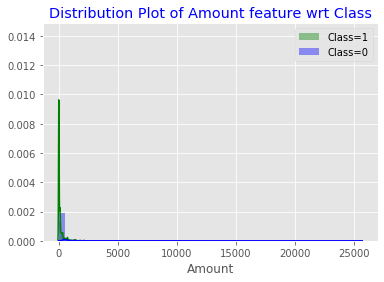

In [28]:
plt.title('Distribution Plot of Amount feature wrt Class',color='blue');
sns.distplot(creditcard_df[creditcard_df['Class']==1]['Amount'],color='green',label='Class=1');
sns.distplot(creditcard_df[creditcard_df['Class']==0]['Amount'],color='blue',label='Class=0');
plt.legend();

### Observations from above cell
- The distribution is highly skewed after 3000
- We will have to handle these outliers

<b><font size=4>Scatter Plot between Amount and Class</font></b>

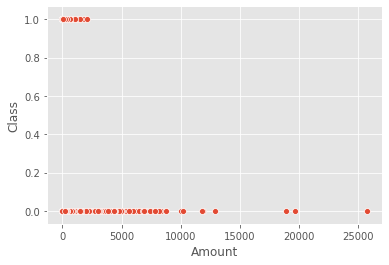

In [29]:
sns.scatterplot(x='Amount',y='Class',data=creditcard_df);

In [30]:
creditcard_df['Amount'].describe([.25, .5, .75,0.9,0.95])

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
90%         203.000000
95%         365.000000
max       25691.160000
Name: Amount, dtype: float64

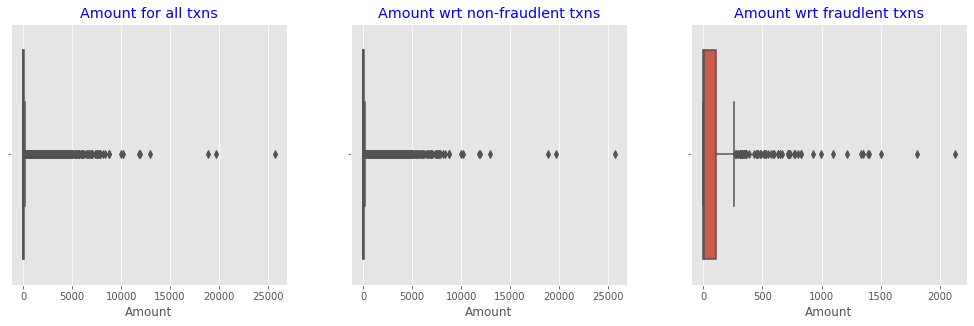

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title('Amount for all txns',color='blue');
sns.boxplot(creditcard_df['Amount']);
plt.tight_layout(pad=6)
plt.subplot(1,3,2)
plt.title('Amount wrt non-fraudlent txns',color='blue');
sns.boxplot(creditcard_df[creditcard_df['Class']==0]['Amount']);
plt.tight_layout(pad=6)
plt.subplot(1,3,3)
plt.title('Amount wrt fraudlent txns',color='blue');
sns.boxplot(creditcard_df[creditcard_df['Class']==1]['Amount']);

### Observations from above cell
- Amount column has many outliers with minimum value as 0 and maximum value as 25691. Ouliers are in 95th percentile
- There are more number of outliers in non-fraudlent transactions
- We will have to handle these outliers before we do any modeling

### Lets look at the amount of transaction for fraudulent trransactions

In [32]:
creditcard_df[creditcard_df['Class']==1]['Amount'].describe([.25, .5, .75,0.9,0.95])

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
90%       346.746000
95%       640.905000
max      2125.870000
Name: Amount, dtype: float64

In [33]:
creditcard_df[creditcard_df['Amount']==0]['Class'].value_counts()

0    1798
1      27
Name: Class, dtype: int64

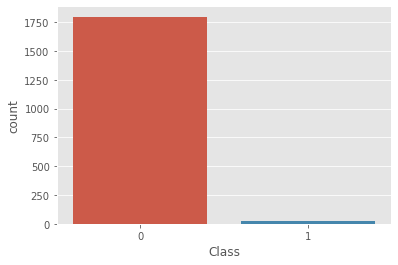

In [34]:
sns.countplot(creditcard_df[creditcard_df['Amount']==0]['Class']);

### Observations from above plot
- There were 27 times, the fraudster had put transaction amount as 0 during fraudlent transactions

## Data Cleaning

### Lets handle outliers in Amount Column
- As we have seens that there are many outliers and the distribution of Amount feature is highly skewed after value 3000. But because the class is highly imbalanced so we will have to carefully check for the threshold to remove the outleirs thereby still maintaining the ratio of fraudlent transactions in the dataset.
- We calculate the threshold by multiplying a number 5(we are not taking usual number 1.5 because the data is highly skewed) with the Interquartile Range

In [35]:
#get the 75th percentile of Amount Column
Q3 = np.percentile(creditcard_df['Amount'],75)

#get the 25th percentile of Amount Column
Q1 = np.percentile(creditcard_df['Amount'],25)

cutoff = 5

#Inter-quartile range
IQR = Q3-Q1

#Calculate lower bound and upper bound
lower_bound = Q1 - (IQR * cutoff)
upper_bound = Q3 + (IQR * cutoff)

#look for the values less than lower bound and greater than upper bound
outlier_data = (creditcard_df['Amount'] < lower_bound) | (creditcard_df['Amount'] > upper_bound)

#get all outliers
outliers = creditcard_df[outlier_data]['Amount']

#get the outliers for fraudlent transactions
fraud_outliers = creditcard_df[(creditcard_df['Class'] == 1) & outlier_data]['Amount']

#get the outliers for non-fraudlent transactions
nonfraud_outliers = creditcard_df[(creditcard_df['Class'] == 0) & outlier_data]['Amount']

print('Total no. of Outliers : {0}'.format(outliers.count()))
print('Total no. of Outliers in Fraudulent Class : {0}'.format(fraud_outliers.count()))
print('Total no. of Outliers in Non-Fraudulent Class : {0}'.format(nonfraud_outliers.count()))

#divide outliers for fraudlent transactions by total outliers
#This will give fraud amount outliers percentage
fraud_perc=round((fraud_outliers.count()/outliers.count())*100,2)

print('Percentage of Fraud amount outliers : {0}'.format(fraud_perc))


Total no. of Outliers : 11366
Total no. of Outliers in Fraudulent Class : 41
Total no. of Outliers in Non-Fraudulent Class : 11325
Percentage of Fraud amount outliers : 0.36


### Observations from above cell
- There are total 11366 number of observations in the dataset which are outliers wrt Amount feature
- From these 11366 outlier observations, 41 are outliers for Fraudlent transactions
- Meaning, if we drop these outliers we will also be dropping 0.36 percent of fraudlent transactions data(which is already very less)

<b><font size=3 color=blue>Before we drop these outliers lets also check what ratio of Class will be maintained before and after dropping outliers and whether dropping these outliers will impact on data imbalance much or not </font></b>

In [36]:
#The class balance before dropping outliers
print('Class Balance before trying to drop outliers')
print(creditcard_df['Class'].value_counts(normalize=True))
ratio = round(creditcard_df['Class'].value_counts()[1]/creditcard_df['Class'].value_counts()[0],5)
print('Ratio of Fraudlent to Non-Fraudlent transactions: {0}'.format(ratio))

#The class balance after dropping outliers
print('\nClass Balance after trying to drop outliers')
print(creditcard_df[(creditcard_df['Amount'] < lower_bound) | 
                    (creditcard_df['Amount'] > upper_bound)]['Class'].value_counts(normalize=True))
ratio = round(creditcard_df[(creditcard_df['Amount'] < lower_bound) | 
                    (creditcard_df['Amount'] > upper_bound)]['Class'].value_counts()[1]/creditcard_df[(creditcard_df['Amount'] < lower_bound) | 
                    (creditcard_df['Amount'] > upper_bound)]['Class'].value_counts()[0],
              5)
print('Ratio of Fraudlent to Non-Fraudlent transactions: {0}'.format(ratio))


Class Balance before trying to drop outliers
0    0.998273
1    0.001727
Name: Class, dtype: float64
Ratio of Fraudlent to Non-Fraudlent transactions: 0.00173

Class Balance after trying to drop outliers
0    0.996393
1    0.003607
Name: Class, dtype: float64
Ratio of Fraudlent to Non-Fraudlent transactions: 0.00362


### Observations from above cell
- We can see that the maximum number of outliers are for non-fraudlent transactions and if we drop all the outliers then even the class imblance is slightly improved
- So with this we will go ahead and will drop the outliers in Amount Column

### Drop outliers in Amount Column

In [37]:
print('Number of Rows: {0} and Columns: {1} before dropping outliers'.format(creditcard_df.shape[0],
                                                                            creditcard_df.shape[1]))
creditcard_df = creditcard_df.drop(outliers.index)
creditcard_df.reset_index(inplace=True, drop=True)
print('Number of Rows: {0} and Columns: {1} after dropping outliers'.format(creditcard_df.shape[0],
                                                                            creditcard_df.shape[1]))

Number of Rows: 284807 and Columns: 33 before dropping outliers
Number of Rows: 273441 and Columns: 33 after dropping outliers


### Lets check for Hour and Amount relationship for fraudlent and non-fraudlent transactions

In [38]:
creditcard_df['Amount'].describe([0.25,0.5,0.75,0.9,0.95])

count    273441.000000
mean         53.031408
std          77.523330
min           0.000000
25%           5.000000
50%          19.990000
75%          65.750000
90%         152.840000
95%         229.880000
max         434.990000
Name: Amount, dtype: float64

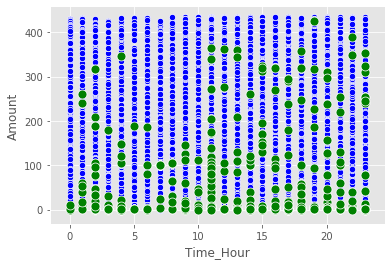

In [39]:
sns.scatterplot(x=creditcard_df[creditcard_df['Class'] == 0]['Time_Hour'], 
            y=creditcard_df[creditcard_df['Class'] == 0]['Amount'], color="b", s=40);
sns.scatterplot(x=creditcard_df[creditcard_df['Class'] == 1]['Time_Hour'], 
            y=creditcard_df[creditcard_df['Class'] == 1]['Amount'], color="g", s=80);

### Observations from above cell
- For the Fraudlent transactions during the day time bteween 11 to 19hrs , the transaction amount is very high
- In general, for the fraudlent transactions during midnight to 9am , the transaction amount is less than 250 with few exceptions

## Scaling - Lets scale column Amount and Time

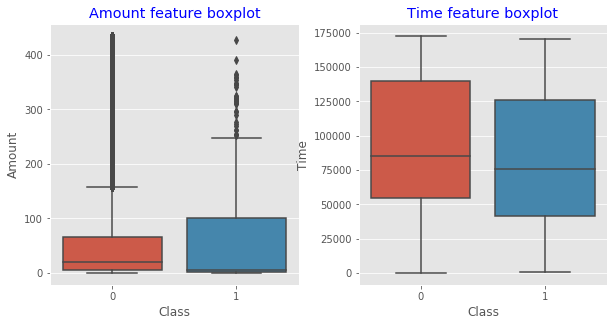

In [40]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Amount feature boxplot',color='blue')
sns.boxplot(x='Class',y='Amount',data=creditcard_df);
plt.tight_layout(pad=6)
plt.subplot(1,2,2)
plt.title('Time feature boxplot',color='blue')
sns.boxplot(x='Class',y='Time',data=creditcard_df);

### Lets Scale Amount feature
- We will use various scaling techniques and will evaluate which one suits best for scaling
    - log scale
    - StandardScaler
    - RobustScaler
    - MinMaxScaler

### Log Scale

In [41]:
creditcard_df['Amount_log'] = np.log(creditcard_df['Amount'] + 0.01)

### StandardScaler

In [42]:
sc = StandardScaler()
creditcard_df['Amount_std'] =  sc.fit_transform(creditcard_df['Amount'].values.reshape(-1,1))

### RobustScaler

In [43]:
rsc = RobustScaler()
creditcard_df['Amount_rsc'] = rsc.fit_transform(creditcard_df['Amount'].values.reshape(-1,1))

### MinMaxScaler

In [44]:
minmax = MinMaxScaler()
creditcard_df['Amount_minmax'] = minmax.fit_transform(creditcard_df['Amount'].values.reshape(-1,1))

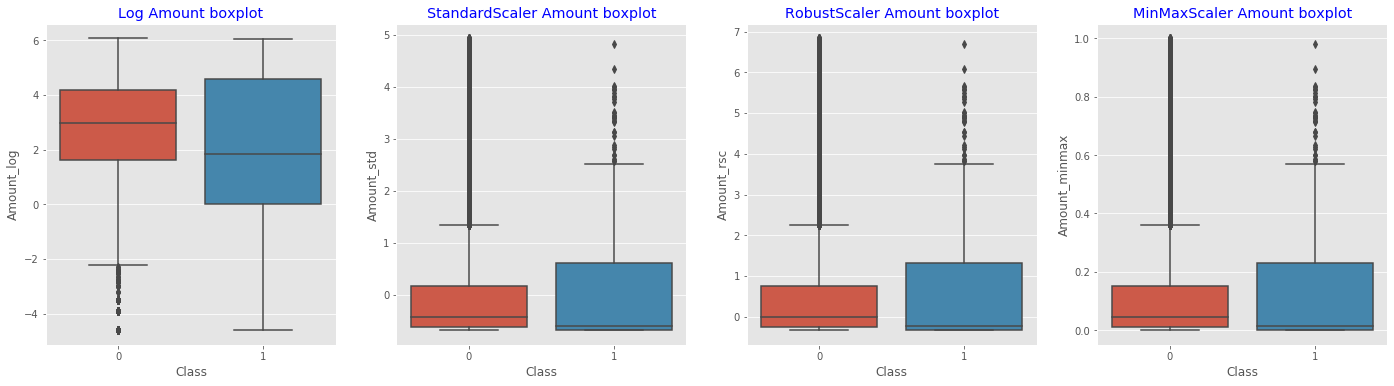

In [45]:
# Let's explore the Amount by Class and see the distribuition of Amount transactions
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.title('Log Amount boxplot',color='blue')
sns.boxplot(x='Class',y='Amount_log',data=creditcard_df);
plt.tight_layout(pad=3)
plt.subplot(1,4,2)
plt.title('StandardScaler Amount boxplot',color='blue')
sns.boxplot(x='Class',y='Amount_std',data=creditcard_df);
plt.tight_layout(pad=3)
plt.subplot(1,4,3)
plt.title('RobustScaler Amount boxplot',color='blue')
sns.boxplot(x='Class',y='Amount_rsc',data=creditcard_df);
plt.tight_layout(pad=3)
plt.subplot(1,4,4)
plt.title('MinMaxScaler Amount boxplot',color='blue')
sns.boxplot(x='Class',y='Amount_minmax',data=creditcard_df);

### Observations from above cell
- IQR of fraudlent transactions is higher
- Log transformation did a good job as there are very less outlier. We will use LogTransformation for scaling Amount feature

### Lets Scale Time feature
- We will use various scaling techniques and will evaluate which one suits best for scaling
    - log scale
    - StandardScaler
    - RobustScaler
    - MinMaxScaler

### Log Scale

In [46]:
creditcard_df['Time_log'] = np.log(creditcard_df['Time'] + 0.01)

### StandardScaler

In [47]:
sc = StandardScaler()
creditcard_df['Time_std'] =  sc.fit_transform(creditcard_df['Time'].values.reshape(-1,1))

### RobustScaler

In [48]:
rsc = RobustScaler()
creditcard_df['Time_rsc'] = rsc.fit_transform(creditcard_df['Time'].values.reshape(-1,1))

### MinMaxScaler

In [49]:
minmax = MinMaxScaler()
creditcard_df['Time_minmax'] = minmax.fit_transform(creditcard_df['Time'].values.reshape(-1,1))

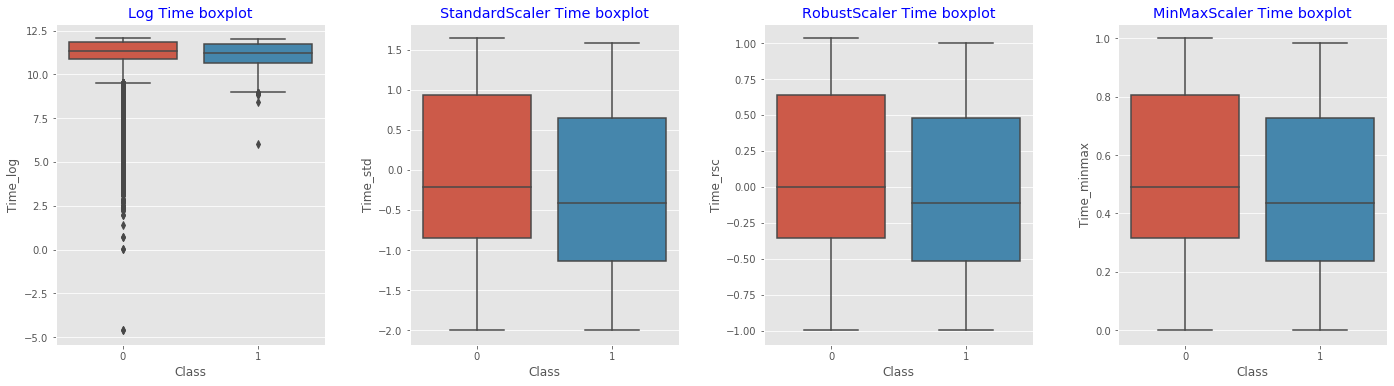

In [50]:
# Let's explore the Time by Class and see the distribuition of Time
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.title('Log Time boxplot',color='blue')
sns.boxplot(x='Class',y='Time_log',data=creditcard_df);
plt.tight_layout(pad=3)
plt.subplot(1,4,2)
plt.title('StandardScaler Time boxplot',color='blue')
sns.boxplot(x='Class',y='Time_std',data=creditcard_df);
plt.tight_layout(pad=3)
plt.subplot(1,4,3)
plt.title('RobustScaler Time boxplot',color='blue')
sns.boxplot(x='Class',y='Time_rsc',data=creditcard_df);
plt.tight_layout(pad=3)
plt.subplot(1,4,4)
plt.title('MinMaxScaler Time boxplot',color='blue')
sns.boxplot(x='Class',y='Time_minmax',data=creditcard_df);

### Observations from above cell
- IQR of both type of trnsactions is almost same
- RobustScalar did a good job with mean centered around 0 and no outlier. We will use RobustScalar for scaling Time feature

### Lets drop unwanted columns

In [51]:
print(creditcard_df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_Hour', 'Time_Day', 'Amount_log', 'Amount_std',
       'Amount_rsc', 'Amount_minmax', 'Time_log', 'Time_std', 'Time_rsc',
       'Time_minmax'],
      dtype='object')


In [52]:
creditcard_df.drop(columns=['Time_Hour', 'Time_Day', 'Amount_std',
       'Amount_rsc', 'Amount_minmax', 'Time_log', 'Time_std',
       'Time_minmax', 'Amount','Time'],inplace=True)
print(creditcard_df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Amount_log',
       'Time_rsc'],
      dtype='object')


In [53]:
creditcard_df.describe()

V1             V2             V3             V4  \
count  273441.000000  273441.000000  273441.000000  273441.000000   
mean        0.065206       0.130288       0.046305      -0.019501   
std         1.856171       1.369822       1.473651       1.398933   
min       -46.855047     -47.429676     -33.680984      -5.683171   
25%        -0.883823      -0.513758      -0.832766      -0.857085   
50%         0.049360       0.104405       0.213112      -0.030911   
75%         1.346560       0.832309       1.052806       0.721609   
max         2.454930      22.057729       9.382558      13.129143   

                  V5             V6             V7             V8  \
count  273441.000000  273441.000000  273441.000000  273441.000000   
mean        0.071229      -0.036564      -0.066447       0.017997   
std         1.234161       1.272537       1.054404       1.167523   
min       -23.669726     -23.496714     -43.557242     -50.943369   
25%        -0.629810      -0.779597      -0.571593      -0.199002   
50%        -0.020057      -0.295075       0.020135       0.028515   
75%         0.637383       0.350100       0.533037       0.334425   
max        34.099309      11.607923      15.661716      20.007208   

                  V9            V10            V11            V12  \
count  273441.000000  273441.000000  273441.000000  273441.000000   
mean        0.005582       0.016020      -0.000348       0.000469   
std         1.090195       1.082713       1.019914       1.000210   
min       -13.434066     -24.588262      -4.797473     -18.683715   
25%        -0.630003      -0.520487      -0.760389      -0.400647   
50%        -0.047119      -0.085730      -0.034761       0.142000   
75%         0.594073       0.462263       0.738116       0.618058   
max        15.594995      23.745136      12.018913       4.846452   

                 V13            V14            V15            V16  \
count  273441.000000  273441.000000  273441.000000  273441.000000   
mean        0.000492      -0.005617       0.002898       0.002556   
std         0.997313       0.959612       0.911689       0.865259   
min        -4.008640     -19.214325      -4.498945     -14.129855   
25%        -0.650047      -0.429919      -0.577873      -0.461015   
50%        -0.011799       0.045891       0.053052       0.068360   
75%         0.665153       0.485454       0.651719       0.519982   
max         4.569009       7.754599       5.825654       6.442798   

                 V17            V18            V19            V20  \
count  273441.000000  273441.000000  273441.000000  273441.000000   
mean       -0.001921      -0.002601       0.005708      -0.041810   
std         0.849911       0.829722       0.807726       0.560296   
min       -25.162799      -9.498746      -4.932733     -23.420173   
25%        -0.486696      -0.496876      -0.446284      -0.214261   
50%        -0.070853      -0.007625       0.008831      -0.070109   
75%         0.394760       0.491242       0.461350       0.110441   
max         9.253526       4.295648       5.591971      11.059004   

                 V21            V22            V23            V24  \
count  273441.000000  273441.000000  273441.000000  273441.000000   
mean       -0.012254       0.006884       0.007435       0.000059   
std         0.708188       0.716359       0.460827       0.604298   
min       -22.889347      -8.887017     -36.666000      -2.836627   
25%        -0.231828      -0.537215      -0.150692      -0.355303   
50%        -0.037515       0.011541      -0.007683       0.040359   
75%         0.170506       0.533020       0.145849       0.438585   
max        27.202839       8.361985      22.083545       4.022866   

                 V25            V26            V27            V28  \
count  273441.000000  273441.000000  273441.000000  273441.000000   
mean        0.003152      -0.001264      -0.000096      -0.001406   
std         0.510646       0.476967       0.377301       0.284590   
min       

In [54]:
creditcard_df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Class  Amount_log  Time_rsc  
0      0    5.008166 -0.997038  
1      0    0.993252 -0.997038  
2      0    5.936665 -0.997027  
3      0    4.816322 -0.997027  
4      0    4.248495 -0.997015

## Lets Create Heatmap

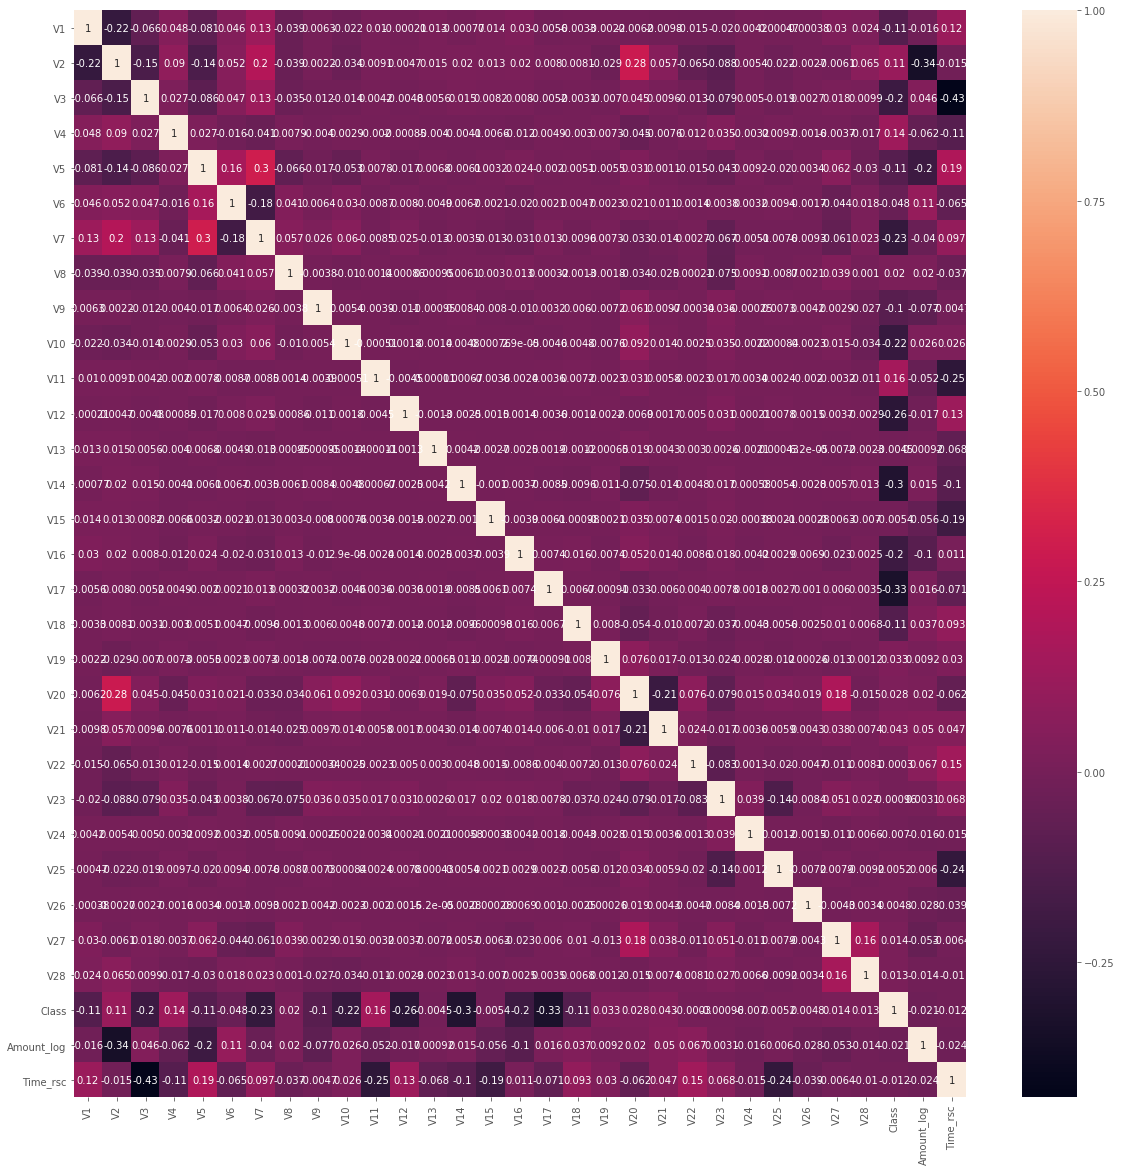

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(creditcard_df.corr(),annot=True);
#plt.savefig('./images/Heatmap.png')

In [56]:
creditcard_corr = creditcard_df.corr()
creditcard_corr.style.apply(lambda x: ["background: yellow" if abs(v) > 0.5 else "" for v in x], axis = 1)

In [57]:
creditcard_corr['Class'].sort_values()

V17          -0.326247
V14          -0.304416
V12          -0.262122
V7           -0.229697
V10          -0.220062
V3           -0.202568
V16          -0.199112
V18          -0.112563
V1           -0.110159
V5           -0.106870
V9           -0.099563
V6           -0.048030
Amount_log   -0.020851
Time_rsc     -0.012475
V24          -0.006973
V15          -0.005382
V13          -0.004498
V23          -0.000958
V22          -0.000296
V26           0.004754
V25           0.005215
V28           0.013448
V27           0.014432
V8            0.020083
V20           0.028176
V19           0.033437
V21           0.042593
V2            0.113577
V4            0.135388
V11           0.155368
Class         1.000000
Name: Class, dtype: float64

### Observations from above cell
- Amount_log and Time_rsc have very less correlation and that too is negative. Both features have very less correlation with Class variable and the relationship is negative
- V17,V14,V12,V7,V10,V3,V16,V18,V1 features have low negative correlation with Class Variable
- V4, V11 features have very low positive correlation with Class Variable

## Functions for Data Modeling

### Function to store results in results dataframe for comparison

In [58]:
#function to store results
def store_results(df,conf_matrix,model_name,location,set_type):
    TP = conf_matrix[1,1] # true positive 
    TN = conf_matrix[0,0] # true negatives
    FP = conf_matrix[0,1] # false positives
    FN = conf_matrix[1,0] # false negatives
    acc = accuracy_score(df['Class'], df['predicted'])
    f1 = f1_score(df['Class'],df['predicted'])
    sen = TP / (TP + FN)
    spec = TN / (TN + FP)
    prec = TP / (TP + FP)
    results_df.loc[location,'model_type']=model_name
    results_df.loc[location,set_type+'_acc'] = round(acc,2)
    results_df.loc[location,set_type+'_sen_recall'] = round(sen,2)
    results_df.loc[location,set_type+'_spec'] = round(spec,2)
    results_df.loc[location,set_type+'_prec'] = round(prec,2)
    results_df.loc[location,set_type+'_f1'] = round(f1,2)

### Function to plot ROC Curve

In [59]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [60]:

def draw_prec_rec( actual, probs ):
    prec, rec, thresholds = precision_recall_curve( actual, probs)
    auc_score = auc( rec, prec )
    plt.figure(figsize=(5, 5))
    plt.plot( rec, prec, label='Precision Recall AUC (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [1, 0], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall AUC')
    plt.legend(loc="lower right")
    plt.show()

    return None

### Function to check scores

In [61]:
def createfinaldf_and_checkscores(y_df,y_pred_df,y_pred_prob_df,prob_cutoff=0.5):
    try:
        y_pred_final_df = pd.DataFrame({'Class':y_df.values, 'Class_Prob':y_pred_prob_df})
    except:
        y_pred_final_df = pd.DataFrame({'Class':y_df, 'Class_Prob':y_pred_prob_df})
    #y_pred_final_df = pd.DataFrame({'response':y_df.values, 'response_Prob':y_pred_df})
    
    ## Lets create a new column that will determine the record uniquely
    y_pred_final_df['ClassId'] = y_df.index
    
    
    # Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
    ## this means cut-off set is 0.5
    y_pred_final_df['predicted'] = y_pred_final_df['Class_Prob'].map(lambda x: 1 if x > prob_cutoff else 0)
    #print(y_train_pred_final.head())
    
    #Confusion matrix
    cm = confusion_matrix(y_pred_final_df['Class'],y_pred_final_df['predicted'])
    #print(conf_matrix)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='d',annot_kws={"size": 14}); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['unsuccessfull', 'successfull']); ax.yaxis.set_ticklabels(['unsuccessfull', 'successfull']);
    plt.show();
    
    # Let's check the overall accuracy.
    print('Accuracy score: {0}'.format
          (accuracy_score(y_pred_final_df['Class'],y_pred_final_df['predicted'])))
    # Let's check sensitivity
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    sensitivity = TP / float(TP+FN)
    print('Sensitivity score: {0}'.format(sensitivity))
    # Lets check Specificity
    specificity = TN / float(TN + FP)
    print('Specificity score: {0}'.format(specificity))
    # Lets check f1-score
    print('f1-score: {0}'.format
          (f1_score(y_pred_final_df['Class'],y_pred_final_df['predicted'])))
    # Lets check precision score
    print('Precision score: {0}'.format
          (precision_score(y_pred_final_df['Class'],y_pred_final_df['predicted'])))
    # Lets check Recall Score
    print('Recall score: {0}'.format
          (recall_score(y_pred_final_df['Class'],y_pred_final_df['predicted'])))
    # Lets check Area Under the Curve
    print('AUC: {0}'.format
          (round(roc_auc_score(y_df,y_pred_prob_df),2)))
    
    
    
    return y_pred_final_df, cm

### Function to check probability cutoff

In [62]:
def  check_cutoff(df):
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i]= df['Class_Prob'].map(lambda x: 1 if x > i else 0)
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = confusion_matrix(df['Class'], df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    return cutoff_df

# Data Preparation

## Set X and y

In [63]:
X = creditcard_df.drop('Class',axis=1)
y = creditcard_df['Class']#class variable

print('shape of X: {0}'.format(X.shape))
print('shape of y: {0}'.format(y.shape))

shape of X: (273441, 30)
shape of y: (273441,)


### Splitting the data into train & test data
- <font color=blue size=3>Since the dataset is highly imbalanced so we will not use regular train-test-split. Instead we will use StratifiedKFold to create out train and test sets</font>

<b><font color=blue size=3>StratifyKFold to split data in train and test set</font></b>

In [64]:
stratifykfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)

# splitting the data
for train_index, test_index in stratifykfold.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Train: [ 29350  29392  29422 ... 273438 273439 273440] Test: [    0     1     2 ... 54742 54743 54744]
Train: [     0      1      2 ... 273438 273439 273440] Test: [ 29350  29392  29422 ... 109415 109416 109417]
Train: [     0      1      2 ... 273438 273439 273440] Test: [ 76259  76295  76304 ... 164124 164125 164126]
Train: [     0      1      2 ... 273438 273439 273440] Test: [144542 144548 144549 ... 218769 218770 218771]
Train: [     0      1      2 ... 218769 218770 218771] Test: [203831 204371 204395 ... 273438 273439 273440]


In [65]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount_log  Time_rsc  
0    5.008166 -0.997038  
1    0.993252 -0.997038  
2    5.936665 -0.997027  
3    4.816322 -0.997027  
4    4.248495 -0.997015

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [66]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

451
361
90


In [67]:
print('shape of X_train: {0}'.format(X_train.shape))
print('shape of y_train: {0}'.format(y_train.shape))
print('shape of X_test: {0}'.format(X_test.shape))
print('shape of y_test: {0}'.format(y_test.shape))

shape of X_train: (218753, 30)
shape of y_train: (218753,)
shape of X_test: (54688, 30)
shape of y_test: (54688,)


## Lets check skewness of data for all numerical columns in the data set

In [68]:
numerical_col_list = list(X_train.columns)
print(numerical_col_list)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_log', 'Time_rsc']


## Function to plot distribution and check skewness of column

In [69]:
## Function to create histograms

def subplot_histograms(dist_df, list_of_columns, cols = 2):
    nrows = int(np.ceil(len(list_of_columns)/cols)) # Makes sure you have enough rows
    
    #Scales the height of the fig to accomodate a long list of features    
    fig, ax = plt.subplots(nrows=nrows, ncols=cols, figsize=(25, len(list_of_columns)*(10/cols)),squeeze=False) 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists

        sns.distplot(dist_df[dist_df['Class']==1][column],color='green',label='Class=1',ax=ax[i]);
        sns.distplot(dist_df[dist_df['Class']==0][column],color='blue',label='Class=0',ax=ax[i]);
        ax[i].set_title('Distribution Plot of {0} feature wrt Class'.format(list_of_columns[i]),color='blue');
        ax[i].set_xlabel(list_of_columns[i]);
        ax[i].legend();
        

In [70]:
numerical_col_list = list(creditcard_df.columns)
numerical_col_list.remove('Class')

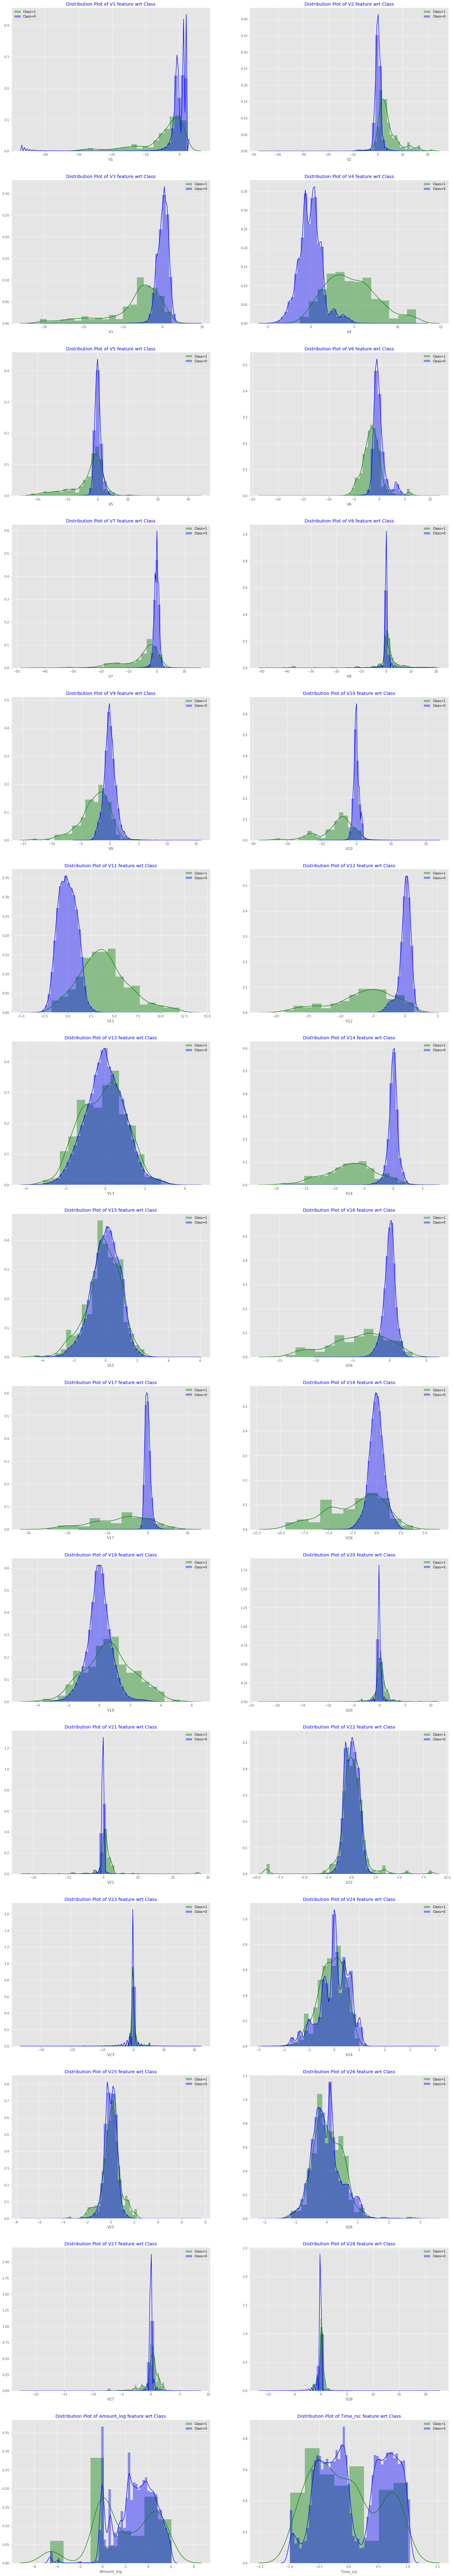

In [71]:
subplot_histograms(creditcard_df, numerical_col_list, cols = 2)

### Observations from above cell
- For features V3,V4,V10,V11,V12,V14,V16 traget class distribution is fairly separable.
- For few features like V8,V20,V23,V27,V28 the target class distribution is not separable and therefore our model might not learn much from those features
- In general, with just few exceptions (Time and Amount), the features distribution is centered around 0, sometimes with a long tail at one of the end
- We will use Power Transformation to handle skewness in data
- We will transform all features to avoid any risk

## Power Transformation

In [72]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
power_transformer = PowerTransformer()
X_train_transformed = pd.DataFrame(power_transformer.fit_transform(X_train),columns=X_train.columns,
                                   index=X_train.index)
X_test_transformed = pd.DataFrame(power_transformer.transform(X_test),columns=X_test.columns,
                                 index=X_test.index)

In [73]:
X_train_transformed.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.931709 -0.181414  2.121669  0.974087 -0.253379  0.480406  0.243395   
1  0.677744  0.071114 -0.217281  0.356414  0.074857  0.049968 -0.116674   
2 -0.931110 -1.068292  1.268041  0.309185 -0.392201  1.373597  0.961913   
3 -0.762305 -0.263365  1.289123 -0.614064  0.017735  1.024235  0.241011   
4 -0.846825  0.544231  1.032995  0.325282 -0.311179  0.197502  0.690911   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.003893  0.376762  0.105725 -0.582979 -0.719304 -0.988872 -0.432102   
1 -0.009645 -0.180612 -0.136596  1.441364  1.297538  0.472964 -0.261777   
2  0.155140 -1.447923  0.213281  0.565195 -0.073518  0.691878 -0.284689   
3  0.290977 -1.313311 -0.030410 -0.250309  0.054640  0.490919 -0.408800   
4 -0.347572  0.757792  0.700583 -0.867916  0.512302  1.288742 -1.189046   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.657794 -0.611212  0.190613  0.036900  0.502639  0.497558  0.022501   
1  0.593991  0.492146 -0.192811 -0.213190 -0.171326 -0.086154 -0.278646   
2  2.876643 -2.749468  1.344856 -0.139458 -2.811919  1.012671  0.398803   
3 -0.776359 -1.195691 -0.828929  2.497765 -1.520795 -0.331906 -0.107288   
4  0.056066 -0.591327 -0.333182 -0.040034  0.988790  0.791724  0.035228   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.405586 -0.241178  0.009632  0.129563 -0.318756  0.340634 -0.066033   
1 -0.895030  0.220580 -0.643455  0.210028  0.364020 -0.062252  0.057145   
2  1.134166  2.014119 -1.137526 -0.768792 -0.202923 -0.189845 -0.199675   
3  0.011359 -0.414253 -1.755978  1.261348 -0.396220  0.138438  0.217502   
4  1.173848 -0.299728  0.140963 -0.537961  1.056299  0.590728  0.740871   

   Amount_log  Time_rsc  
0    1.285883 -2.121710  
1   -1.080053 -2.121710  
2    1.928316 -2.121681  
3    1.156842 -2.121681  
4    0.782817 -2.121652

In [74]:
X_test_transformed.head()

V1        V2        V3        V4        V5        V6        V7  \
203831 -0.906257  1.410231 -2.480895  0.927398  0.010253 -0.331671 -2.143809   
204371 -2.006315 -2.755697 -0.187046  3.233243  3.832601  0.818700 -0.655303   
204395 -1.814970 -1.003871 -2.178136  2.885979  3.019459 -3.611250 -3.521506   
205866  0.068872  0.720666 -2.868162  1.495294 -0.456135 -0.028923 -2.639181   
205975 -0.483711 -0.665306 -1.448876 -0.108651  1.486492 -1.262464 -0.114279   

              V8        V9       V10       V11       V12       V13       V14  \
203831  1.327481 -2.540129 -4.787694  1.850054 -3.222326 -1.247545 -3.316145   
204371 -0.726633 -0.161189  3.363867  0.890191 -0.687294 -0.198054 -0.835477   
204395  0.996571 -3.308031 -4.500380  3.543388 -2.886993  1.134390 -5.410503   
205866  1.109875 -0.979182 -5.849433  3.790310 -3.069109 -1.017443 -5.999349   
205975 -0.963318  0.707262  0.222415  0.219466 -0.225054 -2.238343  1.159389   

             V15       V16       V17       V18       V19       V20       V21  \
203831  0.312424 -5.175511 -7.125996 -5.374881  0.195646  0.495707  1.647542   
204371  1.391172 -0.987445 -0.179061 -0.698479  1.299925 -3.698995 -0.934934   
204395  1.194489 -4.274440 -6.177994 -1.368064  4.309946  4.206805  1.493046   
205866  0.635415 -3.912296 -5.697924 -2.543980 -0.205874  1.136260  1.392882   
205975 -0.913284 -1.053765 -0.318062  0.954005  0.592310 -1.715425  1.905786   

             V22       V23       V24       V25       V26       V27       V28  \
203831  2.022062 -0.590802 -0.622706  0.471726  1.601808  1.896840  0.693446   
204371  2.726791  0.247471 -1.231452 -1.091285  1.270079 -1.375502  2.455895   
204395 -0.049737  0.764988 -0.371839  0.731619 -0.167622  2.664902  2.251859   
205866  1.325786 -0.619045 -2.606003  0.534451  0.452381  2.579465  1.269624   
205975  3.237443  0.413512  1.397993 -1.745674 -0.345764  1.001795  0.116883   

        Amount_log  Time_rsc  
203831   -2.623463  1.467867  
204371    0.073200  1.472685  
204395   -0.499990  1.472911  
205866    1.140620  1.487603  
205975   -1.642929  1.488710

### Lets check skewness again

In [75]:
powerX_df = pd.concat([X_train_transformed, X_test_transformed])
powerY_df = pd.concat([y_train, y_test])
powertransformed_df = pd.concat([powerX_df,powerY_df],axis=1)
powertransformed_df.rename({'0':'Class'},inplace=True)

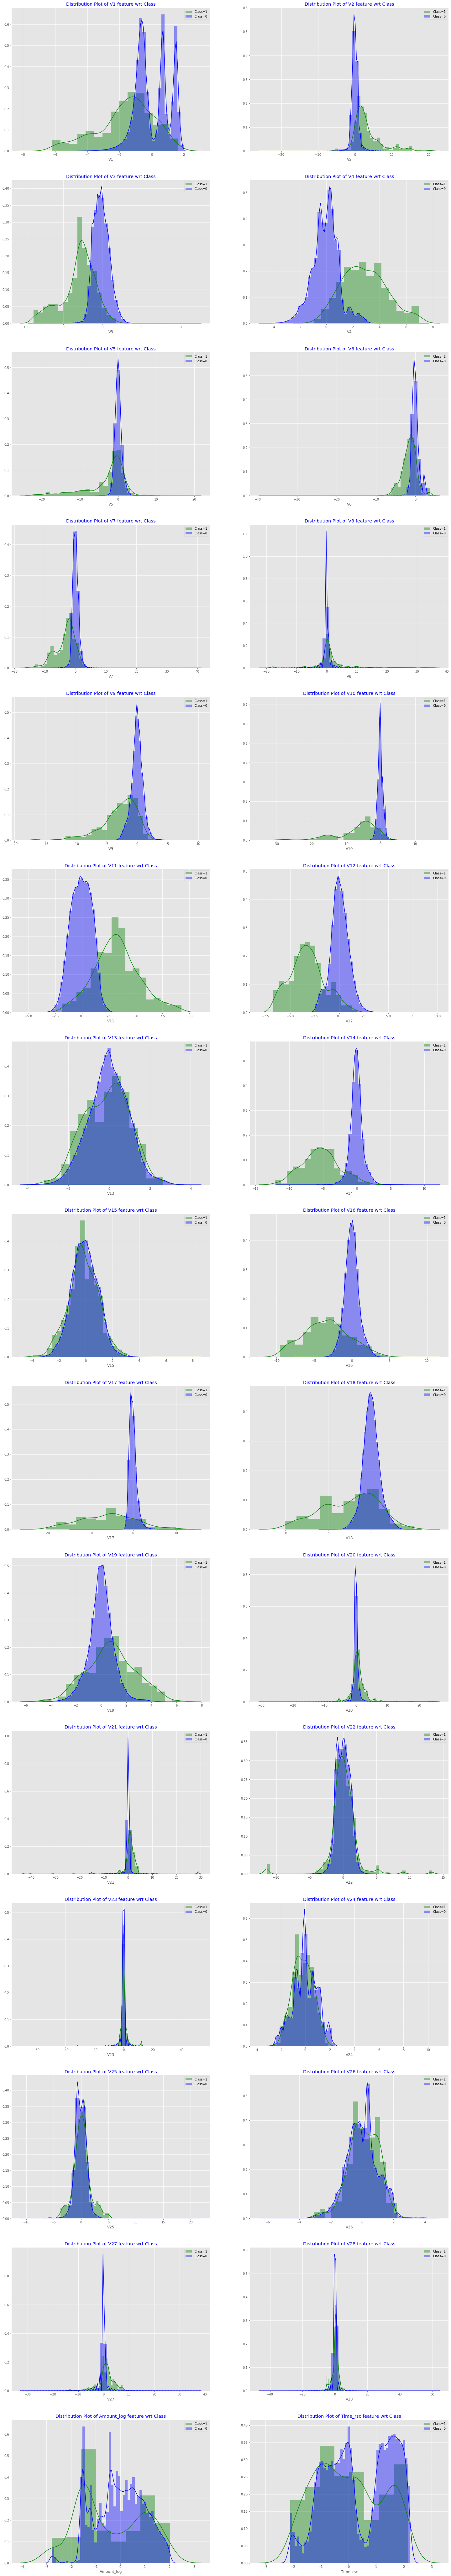

In [76]:
subplot_histograms(powertransformed_df, numerical_col_list, cols = 2)

#### There seems to be slight improvement

## Lets filter Important features

## RFE and Logistic Regression Model

In [77]:
logreg = LogisticRegression(class_weight='balanced')

In [78]:
# Use RFE for feature selection
rfe = RFE(logreg,25)
rfe.fit(X_train_transformed,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=25, step=1, verbose=0)

In [79]:
#List all features with importance/ranking
list(zip(X_train_transformed.columns,rfe.support_,rfe.ranking_))

[('V1', True, 1),
 ('V2', True, 1),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', True, 1),
 ('V6', False, 4),
 ('V7', True, 1),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', True, 1),
 ('V12', True, 1),
 ('V13', False, 2),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', True, 1),
 ('V17', True, 1),
 ('V18', True, 1),
 ('V19', True, 1),
 ('V20', False, 5),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', True, 1),
 ('V24', True, 1),
 ('V25', False, 3),
 ('V26', False, 6),
 ('V27', True, 1),
 ('V28', True, 1),
 ('Amount_log', True, 1),
 ('Time_rsc', True, 1)]

### List of 20 important features filtered by RFE

In [80]:
rfe_col = list(X_train_transformed.columns[rfe.support_])
rfe_col

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V21',
 'V22',
 'V23',
 'V24',
 'V27',
 'V28',
 'Amount_log',
 'Time_rsc']

### Obseravtions from above cell
- Above is the list of important features
- We will build our models and will see later using feature imprtance if these set of features match with our final model

## Model Building
- Build different models on the imbalanced dataset and see the result

### Create Results Dataframe

In [81]:
results_df = pd.DataFrame(columns=['model_type','train_acc', 'train_sen_recall', 'train_spec','train_prec', 
                                   'train_f1', 
                      'test_acc', 'test_sen_recall', 'test_spec', 'test_prec', 'test_f1','roc_auc','roc_threshold','prec_rec_roc','prec_rec_threshold'])

## Logistic Regression

In [82]:
#create Logistic Regression variable
#using class_weight as 'balanced'
logistic_reg = LogisticRegression(class_weight='balanced')#'{1:0.9, 0:0.1}')

#create steps variable
#these steps will be used in Pipeline during model building
steps = [('logistic', logistic_reg)
        ]

#create pipeline
pipeline = Pipeline(steps)

#create parameters that will be used during randomsearch
params = {
    'logistic__C':[2],#[0.1,0.5,0.8,1,2,5], #regularization term. smaller number means more regularization
    'logistic__penalty':['l2'],#['l1','l2'], #norm used in penalization
    'logistic__solver':['saga'],#['liblinear','saga','lbfgs']
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
logistic_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [83]:
logistic_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.4s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('logistic',
                                              LogisticRegression(C=1.0,
                                                                 class_weight='balanced',
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=None,
                                                                 max_iter=100,
                                                                 multi_class='auto',
                                                                 n_jobs=None,
                                                                 penalty='l2',
                                   

In [84]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", logistic_randomsearch.best_score_)
print(logistic_randomsearch.best_params_)

best accuracy 0.9694151755498994
{'logistic__solver': 'saga', 'logistic__penalty': 'l2', 'logistic__C': 2}


In [85]:
# scores of RandomizedSearchCV
scores = logistic_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.053984      0.014744         0.018383        0.000695   

  param_logistic__solver param_logistic__penalty param_logistic__C  \
0                   saga                      l2                 2   

                                              params  split0_test_score  \
0  {'logistic__solver': 'saga', 'logistic__penalt...           0.996895   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.985892           0.925831            0.96795           0.970507   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.969415        0.024205                1            0.965894   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.986781            0.991772             0.98936   

   split4_train_score  mean_train_score  std_train_score  
0            0.990157          0.984793         0.009586

### predict y_train data

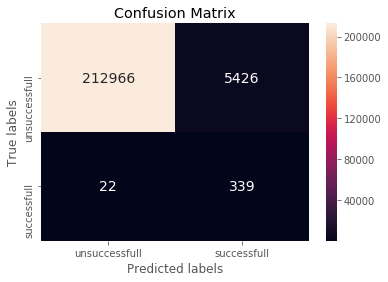

Accuracy score: 0.9750951986944179
Sensitivity score: 0.9390581717451524
Specificity score: 0.9751547675739038
f1-score: 0.11067580803134182
Precision score: 0.0588031222896791
Recall score: 0.9390581717451524
AUC: 0.99


In [86]:
y_train_pred = logistic_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = logistic_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [87]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.854425  0.975069  0.854225
0.2   0.2  0.924033  0.961219  0.923972
0.3   0.3  0.951100  0.950139  0.951102
0.4   0.4  0.965747  0.944598  0.965782
0.5   0.5  0.975095  0.939058  0.975155
0.6   0.6  0.981335  0.925208  0.981428
0.7   0.7  0.985701  0.925208  0.985801
0.8   0.8  0.989358  0.914127  0.989482
0.9   0.9  0.993120  0.905817  0.993264


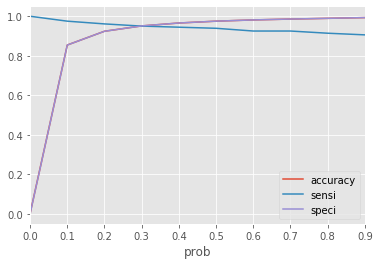

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.3 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

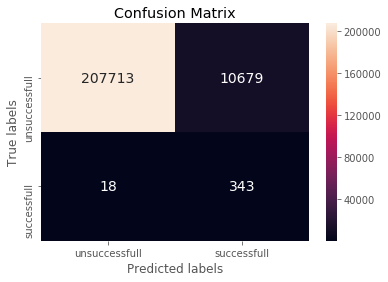

Accuracy score: 0.9511000991986396
Sensitivity score: 0.9501385041551247
Specificity score: 0.951101688706546
f1-score: 0.06026530791531231
Precision score: 0.03111957902377064
Recall score: 0.9501385041551247
AUC: 0.99


In [89]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.3)#cutoff probability is 0.3

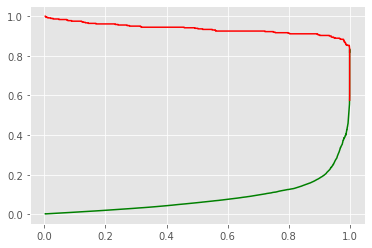

In [90]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

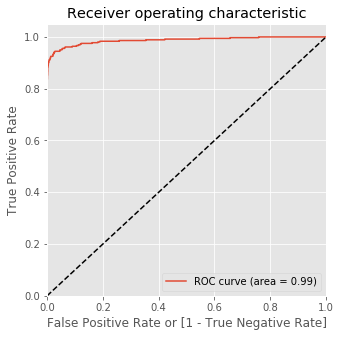

In [91]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [92]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'Logistic', #model_name
              0, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

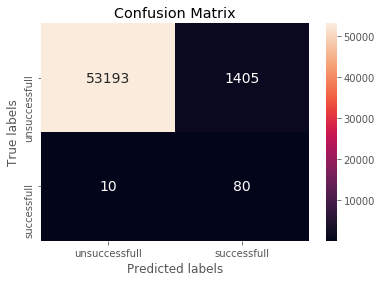

Accuracy score: 0.9741259508484494
Sensitivity score: 0.8888888888888888
Specificity score: 0.9742664566467636
f1-score: 0.10158730158730159
Precision score: 0.05387205387205387
Recall score: 0.8888888888888888
AUC: 0.97


In [93]:
# predict fraud on test data
y_test_pred = logistic_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = logistic_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.3)# cutoff probability is 0.3

### Draw ROC Curve

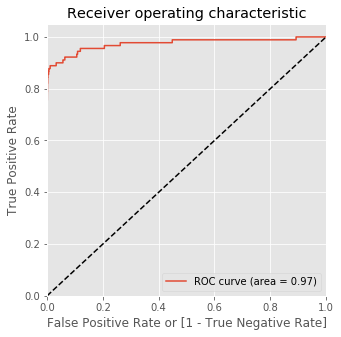

In [94]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [95]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'Logistic', #model_name
              0, #location or index
              'test' #train or test set
             )

In [96]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[0,'roc_auc'] = round(roc_score,2)
results_df.loc[0,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[0,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[0,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.5582217156493232
precision-recall threshold: 0.00013993948850587969


In [97]:
results_df

model_type train_acc train_sen_recall train_spec train_prec train_f1  \
0   Logistic      0.95             0.95       0.95       0.03     0.06   

  test_acc test_sen_recall test_spec test_prec test_f1 roc_auc roc_threshold  \
0     0.97            0.89      0.97      0.05     0.1    0.97          0.56   

  prec_rec_roc prec_rec_threshold  
0         0.77                  0

## Decision Tree

In [98]:
#create Logistic Regression variable
#using class_weight as 'balanced'
decisontree = DecisionTreeClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#create steps variable
#these steps will be used in Pipeline during model building
steps = [('decisontree', decisontree)
        ]

#create pipeline
pipeline = Pipeline(steps)

#create parameters that will be used during randomsearch
params = {
    'decisontree__max_depth': [4],#[4,8,10], # maximum depth of the tree,
    'decisontree__min_samples_leaf': [100],#[50,80,100,120], #minimum sample observations at the leaf
    'decisontree__min_samples_split': [120],#[50,80,100,120], #minmum sample observations at the node during split
    'decisontree__max_features': [20],#[5,8,10,12,15,20], # number of features
    'decisontree__criterion': ['entropy'],#['gini','entropy'] #function to measure quality of split
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
decisontree_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [99]:
decisontree_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('decisontree',
                                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                                     class_weight='balanced',
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=1,
                                    

In [100]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", decisontree_randomsearch.best_score_)
print(decisontree_randomsearch.best_params_)

best accuracy 0.9669181986874442
{'decisontree__min_samples_split': 120, 'decisontree__min_samples_leaf': 100, 'decisontree__max_features': 20, 'decisontree__max_depth': 4, 'decisontree__criterion': 'entropy'}


In [101]:
# scores of RandomizedSearchCV
scores = decisontree_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.648434      0.082099         0.015817        0.000864   

  param_decisontree__min_samples_split param_decisontree__min_samples_leaf  \
0                                  120                                 100   

  param_decisontree__max_features param_decisontree__max_depth  \
0                              20                            4   

  param_decisontree__criterion  \
0                      entropy   

                                              params  split0_test_score  \
0  {'decisontree__min_samples_split': 120, 'decis...           0.994525   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.982548           0.925375           0.954699           0.977444   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.966918        0.024464                1            0.986396   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.986279            0.990927            0.990536   

   split4_train_score  mean_train_score  std_train_score  
0            0.989985          0.988825         0.002053

### predict y_train data

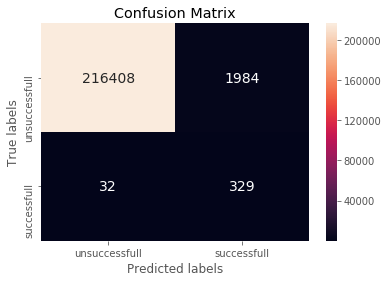

Accuracy score: 0.9907841263891238
Sensitivity score: 0.9113573407202216
Specificity score: 0.9909154181471849
f1-score: 0.24607329842931938
Precision score: 0.1422395157803718
Recall score: 0.9113573407202216
AUC: 0.99


In [102]:
y_train_pred = decisontree_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = decisontree_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [103]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.048187  1.000000  0.046613
0.1   0.1  0.850105  0.986150  0.849880
0.2   0.2  0.850105  0.986150  0.849880
0.3   0.3  0.850105  0.986150  0.849880
0.4   0.4  0.957623  0.936288  0.957659
0.5   0.5  0.990784  0.911357  0.990915
0.6   0.6  0.990784  0.911357  0.990915
0.7   0.7  0.990784  0.911357  0.990915
0.8   0.8  0.990784  0.911357  0.990915
0.9   0.9  0.998322  0.864266  0.998544


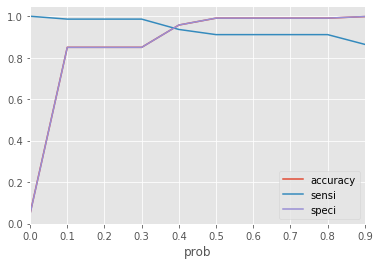

In [104]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.3 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

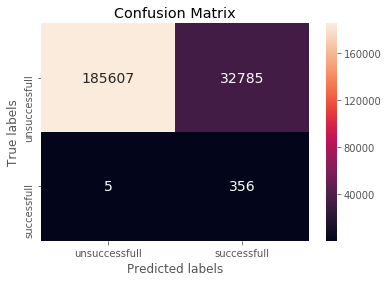

Accuracy score: 0.8501049128469095
Sensitivity score: 0.9861495844875346
Specificity score: 0.849880032235613
f1-score: 0.02125246253954988
Precision score: 0.01074198123170695
Recall score: 0.9861495844875346
AUC: 0.99


In [105]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.3)#cutoff probability is 0.3

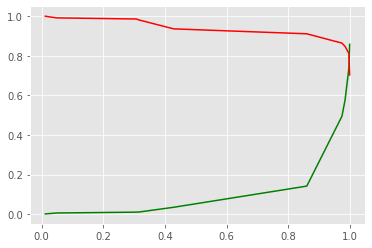

In [106]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

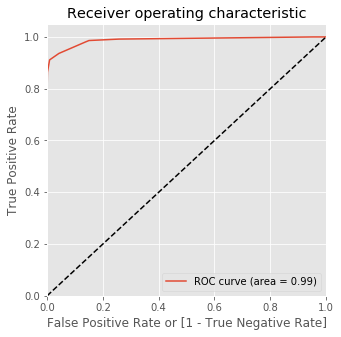

In [107]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [108]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'DecisionTree', #model_name
              1, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

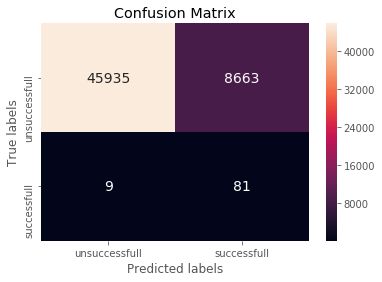

Accuracy score: 0.8414277355178467
Sensitivity score: 0.9
Specificity score: 0.8413311842924649
f1-score: 0.018338238623500112
Precision score: 0.009263494967978042
Recall score: 0.9
AUC: 0.92


In [109]:
# predict fraud on test data
y_test_pred = decisontree_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = decisontree_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.3)# cutoff probability is 0.3

### Draw ROC Curve

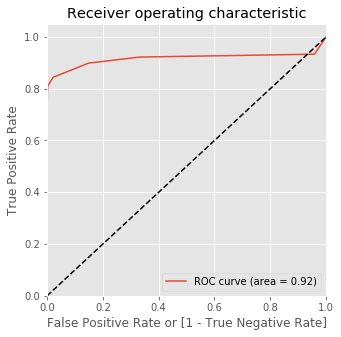

In [110]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [111]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'DecisionTree', #model_name
              1, #location or index
              'test' #train or test set
             )

In [112]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[1,'roc_auc'] = round(roc_score,2)
results_df.loc[1,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[1,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[1,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.4284556785209379
precision-recall threshold: 0.0


In [113]:
results_df

model_type train_acc train_sen_recall train_spec train_prec train_f1  \
0      Logistic      0.95             0.95       0.95       0.03     0.06   
1  DecisionTree      0.85             0.99       0.85       0.01     0.02   

  test_acc test_sen_recall test_spec test_prec test_f1 roc_auc roc_threshold  \
0     0.97            0.89      0.97      0.05     0.1    0.97          0.56   
1     0.84             0.9      0.84      0.01    0.02    0.92          0.43   

  prec_rec_roc prec_rec_threshold  
0         0.77                  0  
1         0.76                  0

## Random Forest

In [114]:
#create Random Forest variable
#using class_weight as 'balanced'
randomforest = RandomForestClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#create steps variable
#these steps will be used in Pipeline during model building
steps = [('randomforest', randomforest)
        ]

#create pipeline
pipeline = Pipeline(steps)

#create parameters that will be used during randomsearch
params = {
    'randomforest__max_depth': [4],#[4,8,10], # maximum depth of the tree,
    'randomforest__min_samples_leaf': [100],#[50,80,100,120], #minimum sample observations at the leaf
    'randomforest__min_samples_split': [120],#[50,80,100,120], #minmum sample observations at the node during split
    'randomforest__max_features': [20],#[5,8,10,12,15,20], # number of features
    'randomforest__criterion': ['entropy'],#['gini','entropy'], #function to measure quality of split
    'randomforest__n_estimators': [200],#[100,200,300], # no. of trees to be build
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
randomforest_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [115]:
randomforest_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.4min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('randomforest',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight='balanced',
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                            

In [116]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", randomforest_randomsearch.best_score_)
print(randomforest_randomsearch.best_params_)

best accuracy 0.980339291213211
{'randomforest__n_estimators': 200, 'randomforest__min_samples_split': 120, 'randomforest__min_samples_leaf': 100, 'randomforest__max_features': 20, 'randomforest__max_depth': 4, 'randomforest__criterion': 'entropy'}


In [117]:
# scores of RandomiozedSearchCV
scores = randomforest_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     375.011445      3.950104         0.537797        0.069608   

  param_randomforest__n_estimators param_randomforest__min_samples_split  \
0                              200                                   120   

  param_randomforest__min_samples_leaf param_randomforest__max_features  \
0                                  100                               20   

  param_randomforest__max_depth param_randomforest__criterion  \
0                             4                       entropy   

                                              params  split0_test_score  \
0  {'randomforest__n_estimators': 200, 'randomfor...           0.997773   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.988571            0.95934           0.971339           0.984675   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.980339        0.013509                1            0.997478   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.997926            0.998875            0.998231   

   split4_train_score  mean_train_score  std_train_score  
0            0.997787           0.99806         0.000474

### predict y_train data

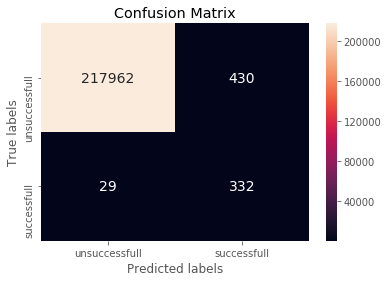

Accuracy score: 0.9979017430618095
Sensitivity score: 0.9196675900277008
Specificity score: 0.9980310634089161
f1-score: 0.591273374888691
Precision score: 0.4356955380577428
Recall score: 0.9196675900277008
AUC: 1.0


In [118]:
y_train_pred = randomforest_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = randomforest_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [119]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.817676  0.997230  0.817379
0.2   0.2  0.946378  0.977839  0.946326
0.3   0.3  0.983109  0.961219  0.983145
0.4   0.4  0.995579  0.936288  0.995677
0.5   0.5  0.997902  0.919668  0.998031
0.6   0.6  0.999141  0.891967  0.999318
0.7   0.7  0.999465  0.880886  0.999661
0.8   0.8  0.999515  0.867036  0.999734
0.9   0.9  0.999497  0.842105  0.999757


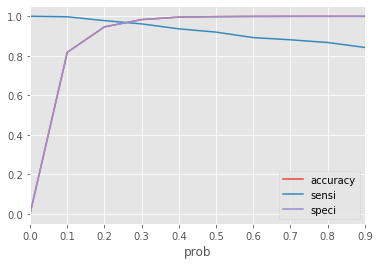

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.2 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

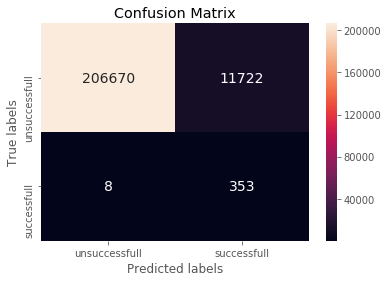

Accuracy score: 0.9463778782462412
Sensitivity score: 0.9778393351800554
Specificity score: 0.9463258727425913
f1-score: 0.05677066580894178
Precision score: 0.029233954451345755
Recall score: 0.9778393351800554
AUC: 1.0


In [121]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.2)#cutoff probability is 0.2

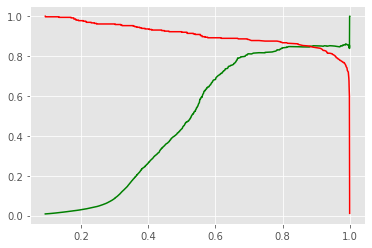

In [122]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

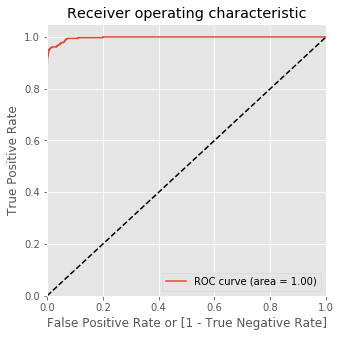

In [123]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [124]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'RandomForest', #model_name
              2, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

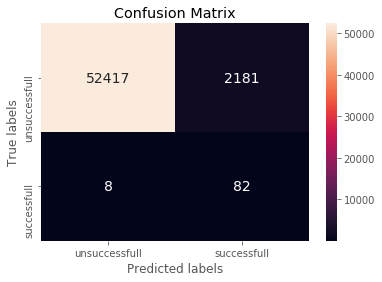

Accuracy score: 0.9599729373902867
Sensitivity score: 0.9111111111111111
Specificity score: 0.9600534818125206
f1-score: 0.0696982575435614
Precision score: 0.03623508616880247
Recall score: 0.9111111111111111
AUC: 0.98


In [125]:
# predict fraud on test data
y_test_pred = randomforest_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = randomforest_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.2)# cutoff probability is 0.2

### Draw ROC Curve

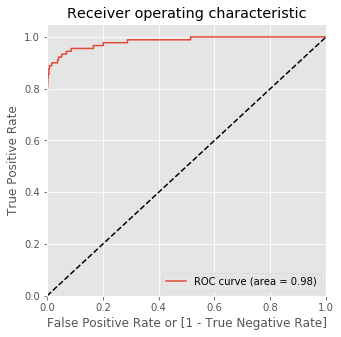

In [126]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [127]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'RandomForest', #model_name
              2, #location or index
              'test' #train or test set
             )

In [128]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[2,'roc_auc'] = round(roc_score,2)
results_df.loc[2,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[2,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[2,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.26813819580746956
precision-recall threshold: 0.026918702538988905


In [129]:
results_df

model_type train_acc train_sen_recall train_spec train_prec train_f1  \
0      Logistic      0.95             0.95       0.95       0.03     0.06   
1  DecisionTree      0.85             0.99       0.85       0.01     0.02   
2  RandomForest      0.95             0.98       0.95       0.03     0.06   

  test_acc test_sen_recall test_spec test_prec test_f1 roc_auc roc_threshold  \
0     0.97            0.89      0.97      0.05     0.1    0.97          0.56   
1     0.84             0.9      0.84      0.01    0.02    0.92          0.43   
2     0.96            0.91      0.96      0.04    0.07    0.98          0.27   

  prec_rec_roc prec_rec_threshold  
0         0.77                  0  
1         0.76                  0  
2         0.81               0.03

## XGBoost

In [130]:
#create XGBoost variable
#using class_weight as 'balanced'
xgboost = XGBClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#create steps variable
#these steps will be used in Pipeline during model building
steps = [('xgboost', xgboost)
        ]

#create pipeline
pipeline = Pipeline(steps)

#create parameters that will be used during randomsearch
params = {
    'xgboost__learning_rate': [0.02],#[0.01,0.02,0.03],# learning rate,
    'xgboost__min_child_weight': [8],#[5,6,7,8,9], #minimum sum of weights of all observations required in a child
    'xgboost__gamma': [2.5],#[1, 1.5, 2, 2.5, 3], #minimum loss reduction required to make a split
    'xgboost__n_estimators': [400],#[350,400,500,700], # no. of trees to be build
    'xgboost__colsample_bytree': [0.8],#[0.6, 0.8, 0.9, 1.0] #fraction of columns to be randomly samples for each tree
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
xgboost_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [131]:
xgboost_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('xgboost',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            class_weight='balanced',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0,
                                                            learning_rate=0.1,
                                                            max_delta_step=0,
                                                            max_depth=3,
                                                            min_chil

In [132]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", xgboost_randomsearch.best_score_)
print(xgboost_randomsearch.best_params_)

best accuracy 0.9801432141257322
{'xgboost__n_estimators': 400, 'xgboost__min_child_weight': 8, 'xgboost__learning_rate': 0.02, 'xgboost__gamma': 2.5, 'xgboost__colsample_bytree': 0.8}


In [133]:
# scores of RandomizedSearchCV
scores = xgboost_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     163.677479      0.728509         0.292653        0.014853   

  param_xgboost__n_estimators param_xgboost__min_child_weight  \
0                         400                               8   

  param_xgboost__learning_rate param_xgboost__gamma  \
0                         0.02                  2.5   

  param_xgboost__colsample_bytree  \
0                             0.8   

                                              params  split0_test_score  \
0  {'xgboost__n_estimators': 400, 'xgboost__min_c...           0.996979   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.991576           0.958904           0.961762           0.991495   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.980143        0.016322                1            0.993863   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.993699            0.994929            0.994742   

   split4_train_score  mean_train_score  std_train_score  
0            0.991902          0.993827         0.001075

### predict y_train data

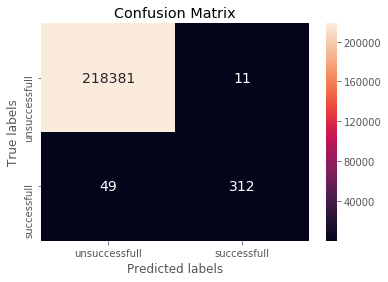

Accuracy score: 0.9997257180472954
Sensitivity score: 0.8642659279778393
Specificity score: 0.9999496318546467
f1-score: 0.912280701754386
Precision score: 0.9659442724458205
Recall score: 0.8642659279778393
AUC: 0.99


In [134]:
y_train_pred = xgboost_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = xgboost_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [135]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.999451  0.878116  0.999652
0.2   0.2  0.999502  0.878116  0.999702
0.3   0.3  0.999639  0.878116  0.999840
0.4   0.4  0.999680  0.872576  0.999890
0.5   0.5  0.999726  0.864266  0.999950
0.6   0.6  0.999721  0.844875  0.999977
0.7   0.7  0.999712  0.828255  0.999995
0.8   0.8  0.999602  0.761773  0.999995
0.9   0.9  0.999291  0.570637  1.000000


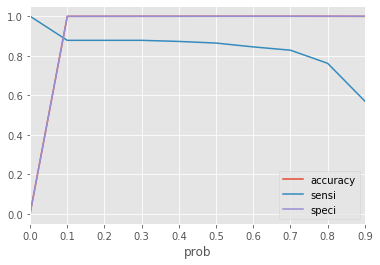

In [136]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.085 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

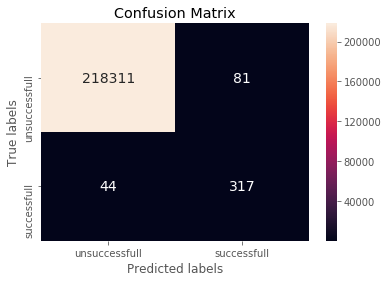

Accuracy score: 0.9994285792651987
Sensitivity score: 0.8781163434903048
Specificity score: 0.9996291072933075
f1-score: 0.8353096179183136
Precision score: 0.7964824120603015
Recall score: 0.8781163434903048
AUC: 0.99


In [137]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.085)#cutoff probability is 0.085

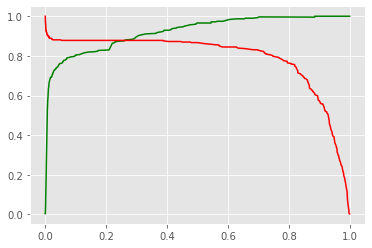

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

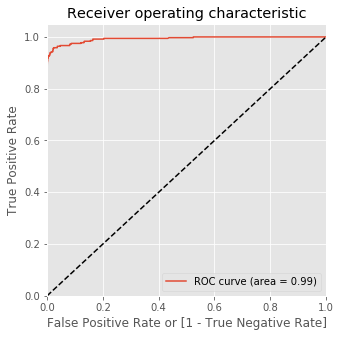

In [139]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [140]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'XGBoost', #model_name
              3, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

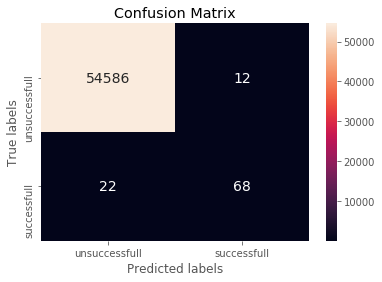

Accuracy score: 0.9993782913984787
Sensitivity score: 0.7555555555555555
Specificity score: 0.9997802117293674
f1-score: 0.7999999999999998
Precision score: 0.85
Recall score: 0.7555555555555555
AUC: 0.98


In [141]:
# predict fraud on test data
y_test_pred = xgboost_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = xgboost_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.085)# cutoff probability is 0.085

### Draw ROC Curve

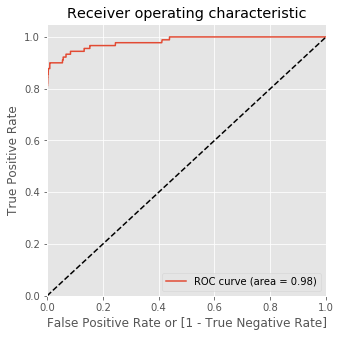

In [142]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [143]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'XGBoost', #model_name
              3, #location or index
              'test' #train or test set
             )

In [144]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[3,'roc_auc'] = round(roc_score,2)
results_df.loc[3,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[3,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[3,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.0015559900784865022
precision-recall threshold: 0.00026203712332062423


In [145]:
results_df

model_type train_acc train_sen_recall train_spec train_prec train_f1  \
0      Logistic      0.95             0.95       0.95       0.03     0.06   
1  DecisionTree      0.85             0.99       0.85       0.01     0.02   
2  RandomForest      0.95             0.98       0.95       0.03     0.06   
3       XGBoost         1             0.88          1        0.8     0.84   

  test_acc test_sen_recall test_spec test_prec test_f1 roc_auc roc_threshold  \
0     0.97            0.89      0.97      0.05     0.1    0.97          0.56   
1     0.84             0.9      0.84      0.01    0.02    0.92          0.43   
2     0.96            0.91      0.96      0.04    0.07    0.98          0.27   
3        1            0.76         1      0.85     0.8    0.98             0   

  prec_rec_roc prec_rec_threshold  
0         0.77                  0  
1         0.76                  0  
2         0.81               0.03  
3         0.82                  0

### Observations from above cell
- RandomForest performed best with stable sensitivity/recall score of train and test sets
- We will use RandomForest model to fit on the test set

## Fianl Model - Random Forest - without balancing dataset

In [146]:
#create Random Forest variable
#using class_weight as 'balanced'
clf = RandomForestClassifier(class_weight='balanced',
                            max_depth = 4,
                            min_samples_leaf = 100,
                            min_samples_split=120,
                            max_features = 20,
                            criterion = 'entropy',
                            n_estimators = 200)
clf.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=120,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### predict y_train data

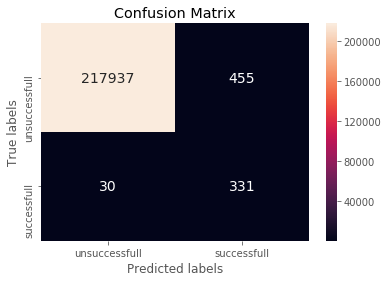

Accuracy score: 0.9977828875489707
Sensitivity score: 0.9168975069252078
Specificity score: 0.9979165903512949
f1-score: 0.5771578029642546
Precision score: 0.4211195928753181
Recall score: 0.9168975069252078
AUC: 1.0


In [147]:
y_train_pred = clf.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = clf.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [148]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.810201  0.997230  0.809892
0.2   0.2  0.949153  0.983380  0.949096
0.3   0.3  0.985189  0.955679  0.985238
0.4   0.4  0.995703  0.933518  0.995806
0.5   0.5  0.997783  0.916898  0.997917
0.6   0.6  0.999081  0.897507  0.999249
0.7   0.7  0.999461  0.883657  0.999652
0.8   0.8  0.999515  0.872576  0.999725
0.9   0.9  0.999493  0.839335  0.999757


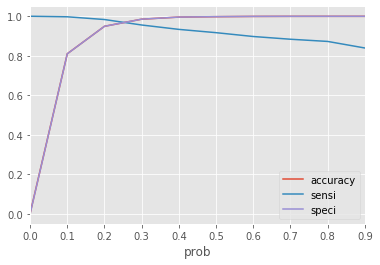

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.2 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

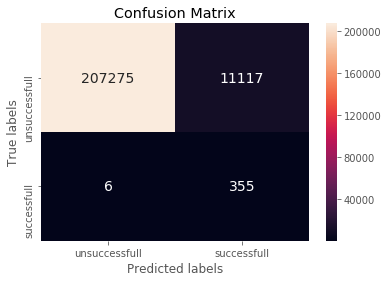

Accuracy score: 0.9491526973344365
Sensitivity score: 0.9833795013850416
Specificity score: 0.9490961207370233
f1-score: 0.06000169018845601
Precision score: 0.030944909344490935
Recall score: 0.9833795013850416
AUC: 1.0


In [150]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.2)#cutoff probability is 0.2

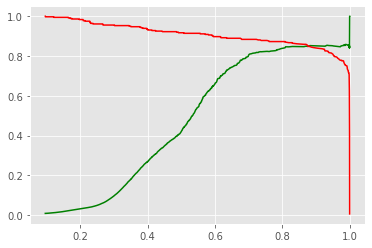

In [151]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

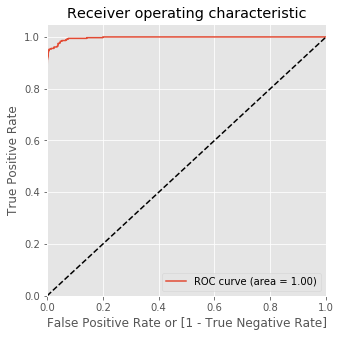

In [152]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

## Evaluate model on test data and check the score

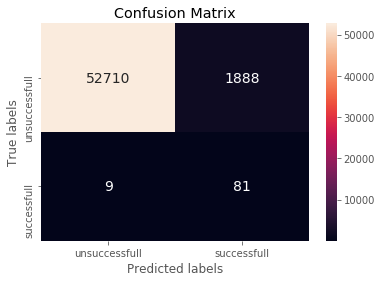

Accuracy score: 0.9653123171445289
Sensitivity score: 0.9
Specificity score: 0.9654199787538005
f1-score: 0.07867897037396794
Precision score: 0.041137633316404264
Recall score: 0.9
AUC: 0.98


In [153]:
# predict fraud on test data
y_test_pred = clf.predict(X_test_transformed)

# check area under curve
y_pred_prob = clf.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.2)# cutoff probability is 0.2

### Draw ROC Curve

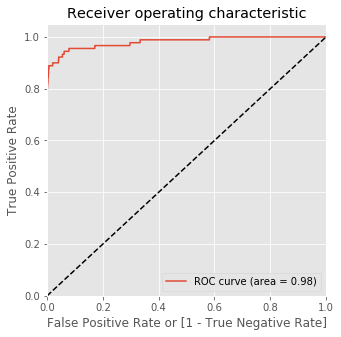

In [154]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Feature Importance

In [155]:
#features list
features_list = X_train_transformed.columns

#features importance
features_importance = list(clf.feature_importances_)

#create dataframe with feature importance in percentage
params_df = pd.DataFrame({'feature':features_list,'coefficient':features_importance})
params_df = params_df.sort_values(by='coefficient',ascending=False).reset_index(drop=True)
params_df

feature  coefficient
0          V14     0.577711
1          V10     0.184264
2           V4     0.076428
3          V12     0.051251
4          V17     0.032500
5          V11     0.017251
6           V8     0.009459
7          V19     0.007408
8          V20     0.005201
9   Amount_log     0.005155
10          V7     0.004576
11         V23     0.004483
12          V3     0.004420
13         V21     0.003562
14    Time_rsc     0.002677
15         V26     0.002126
16          V5     0.001444
17         V22     0.001184
18         V25     0.001148
19          V6     0.000971
20         V13     0.000953
21         V18     0.000890
22         V16     0.000858
23         V28     0.000805
24          V1     0.000709
25         V15     0.000667
26         V24     0.000592
27          V9     0.000587
28          V2     0.000431
29         V27     0.000290

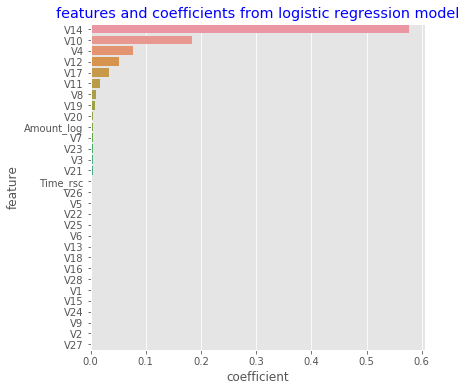

In [156]:
plt.figure(figsize=(6,6))
plt.title('features and coefficients from logistic regression model',color='blue')
sns.barplot(y='feature',x='coefficient',data=params_df);

### Observation from above plot
- V14 forms the very important predictor with positive coefficient. 
- V10 and V4 are also important predictors
- Amount_log and Time_rsc are not so good predictors

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 4


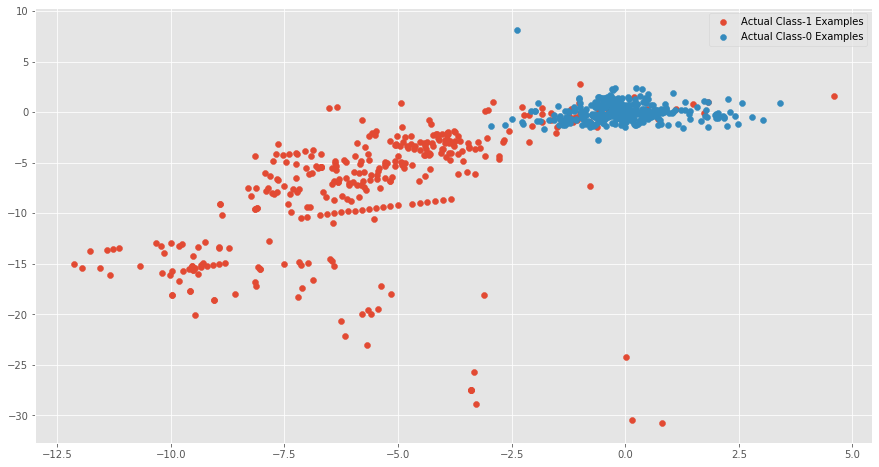

In [157]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_transformed.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_transformed.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.figure(figsize=(15,8))

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend();

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [158]:
#print('Original dataset shape %s' % Counter(y))
print('Original X_train_transformed dataset shape \n{0}'.format(y_train.value_counts()))
random_oversampler = RandomOverSampler(random_state=42)
X_train_oversampler,y_train_oversampler = random_oversampler.fit_resample(X_train_transformed,y_train)
#print('Resampled dataset shape %s' % Counter(y_oversampler))
print('Resampled X_train_transformed dataset shape \n{0}'.format(
    pd.DataFrame(y_train_oversampler,columns=['Class'])['Class'].value_counts()))

Original X_train_transformed dataset shape 
0    218392
1       361
Name: Class, dtype: int64
Resampled X_train_transformed dataset shape 
1    218392
0    218392
Name: Class, dtype: int64


### Print the class distribution after applying Random Oversampling

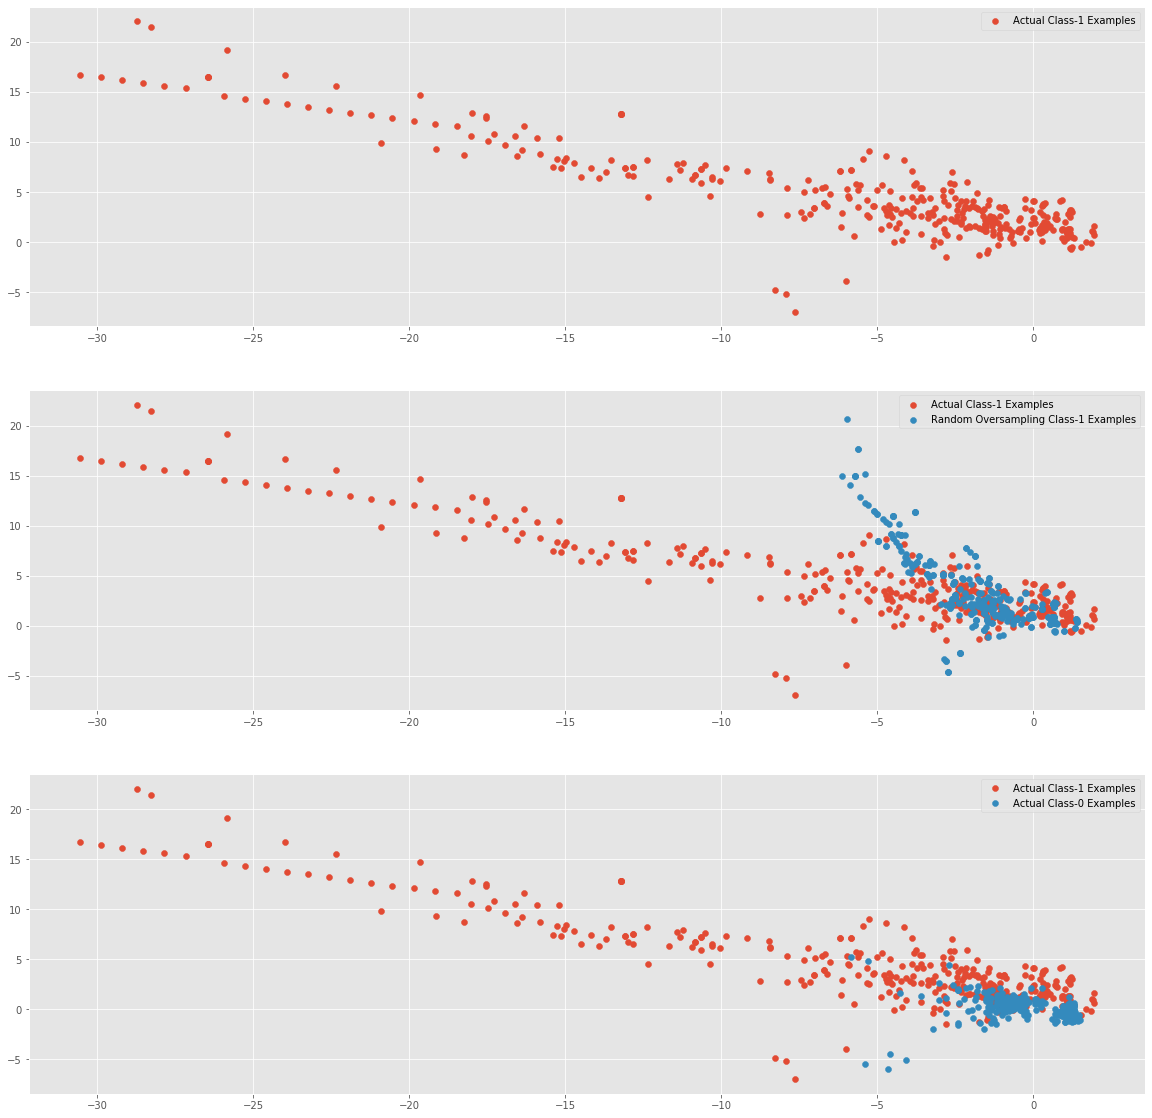

In [159]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_oversampler_1 = X_train_oversampler[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_oversampler_1[:X_train_1.shape[0], 0], X_train_oversampler_1[:X_train_1.shape[0], 1],
            label='Random Oversampling Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend();

In [160]:
#Convert into dataframe
X_train_oversampler = pd.DataFrame(X_train_oversampler,columns=X_train_transformed.columns)
y_train_oversampler = pd.Series(y_train_oversampler)

## Logistic Regression

In [161]:
#create Logistic Regression variable
#using class_weight as 'balanced'
logistic_reg = LogisticRegression(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate random over sampler
random_oversampler = RandomOverSampler(random_state=42)

#create pipeline
pipeline = make_pipeline(random_oversampler,logistic_reg)

#create parameters that will be used during randomsearch
params = {
    'logisticregression__C':[5],#[0.1,0.5,0.8,1,2,5], #regularization term. smaller number means more regularization
    'logisticregression__penalty':['l2'],#['l1','l2'], #norm used in penalization
    'logisticregression__solver':['lbfgs'],#['liblinear','saga','lbfgs']
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
logistic_oversampler_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [162]:
#fit the model on oversampled X_train_transformed and y_train
logistic_oversampler_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.5s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=42,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('logisticregression',
                                              LogisticRegression(C=1.0,
                                                                 class_weight='balanced',
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                        

In [163]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", logistic_oversampler_randomsearch.best_score_)
print(logistic_oversampler_randomsearch.best_params_)

best accuracy 0.9690520169322558
{'logisticregression__solver': 'lbfgs', 'logisticregression__penalty': 'l2', 'logisticregression__C': 5}


In [164]:
# scores of RandomizedSearchCV
scores = logistic_oversampler_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.426494      0.416386         0.033153        0.006338   

  param_logisticregression__solver param_logisticregression__penalty  \
0                            lbfgs                                l2   

  param_logisticregression__C  \
0                           5   

                                              params  split0_test_score  \
0  {'logisticregression__solver': 'lbfgs', 'logis...           0.997312   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.983852           0.933969            0.96241           0.967717   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.969052        0.021421                1            0.989852   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.989229            0.994022            0.990358   

   split4_train_score  mean_train_score  std_train_score  
0            0.990561          0.990804         0.001673

### predict y_train data

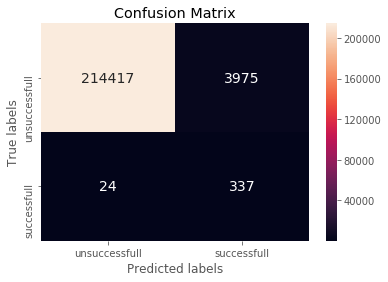

Accuracy score: 0.9817191078522352
Sensitivity score: 0.9335180055401662
Specificity score: 0.9817987838382358
f1-score: 0.1442328268778087
Precision score: 0.07815398886827458
Recall score: 0.9335180055401662
AUC: 0.99


In [165]:
#predit on X_train_transformed
y_train_pred = logistic_oversampler_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = logistic_oversampler_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [166]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.829616  0.975069  0.829376
0.2   0.2  0.924815  0.969529  0.924741
0.3   0.3  0.956641  0.947368  0.956656
0.4   0.4  0.972522  0.941828  0.972572
0.5   0.5  0.981719  0.933518  0.981799
0.6   0.6  0.987858  0.916898  0.987976
0.7   0.7  0.991264  0.916898  0.991387
0.8   0.8  0.993792  0.911357  0.993928
0.9   0.9  0.997225  0.897507  0.997390


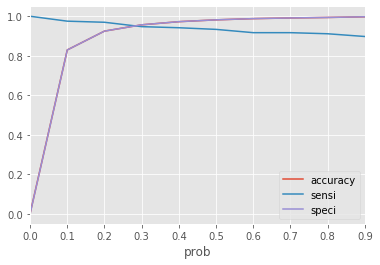

In [167]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.2 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

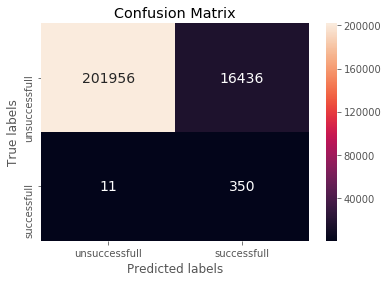

Accuracy score: 0.9248147453977774
Sensitivity score: 0.9695290858725761
Specificity score: 0.9247408329975457
f1-score: 0.04082346766198168
Precision score: 0.020850708924103418
Recall score: 0.9695290858725761
AUC: 0.99


In [168]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.2)#cutoff probability is 0.2

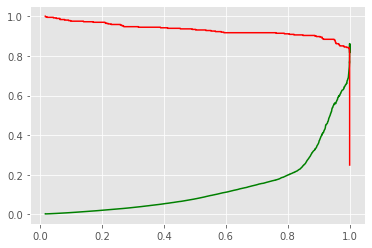

In [169]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

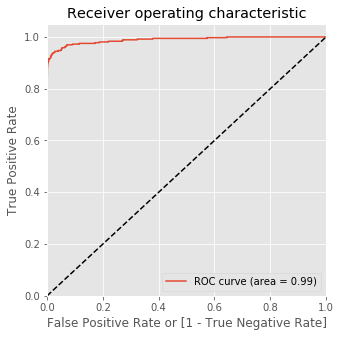

In [170]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [171]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'Logistic_Oversampler', #model_name
              4, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

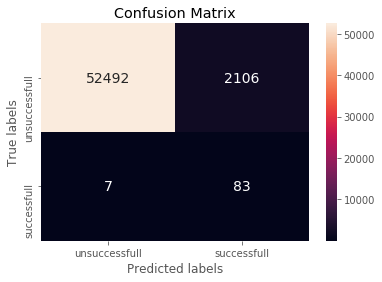

Accuracy score: 0.961362638970158
Sensitivity score: 0.9222222222222223
Specificity score: 0.9614271585039745
f1-score: 0.07283896445809566
Precision score: 0.0379168570123344
Recall score: 0.9222222222222223
AUC: 0.99


In [172]:
# predict fraud on X_test_transformed data
y_test_pred = logistic_oversampler_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = logistic_oversampler_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.2)# cutoff probability is 0.2

### Draw ROC Curve

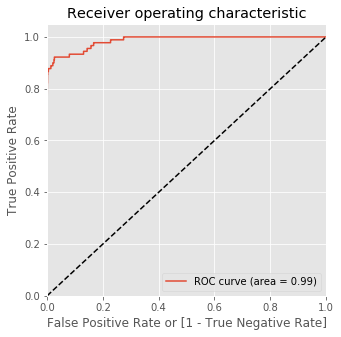

In [173]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [174]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'Logistic_Oversampler', #model_name
              4, #location or index
              'test' #train or test set
             )

In [175]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[4,'roc_auc'] = round(roc_score,2)
results_df.loc[4,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[4,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[4,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.26614975904843075
precision-recall threshold: 0.02418226304082796


In [176]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0              Logistic      0.95             0.95       0.95       0.03   
1          DecisionTree      0.85             0.99       0.85       0.01   
2          RandomForest      0.95             0.98       0.95       0.03   
3               XGBoost         1             0.88          1        0.8   
4  Logistic_Oversampler      0.92             0.97       0.92       0.02   

  train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0     0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1     0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2     0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3     0.84        1            0.76         1      0.85     0.8    0.98   
4     0.04     0.96            0.92      0.96      0.04    0.07    0.99   

  roc_threshold prec_rec_roc prec_rec_threshold  
0          0.56         0.77                  0  
1          0.43         0.76                  0  
2          0.27         0.81               0.03  
3             0         0.82                  0  
4          0.27         0.79               0.02

## Decision Tree

In [177]:
#create Decision Tree variable
#using class_weight as 'balanced'
decisontree = DecisionTreeClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate random over sampler
random_oversampler = RandomOverSampler(random_state=42)

#create pipeline
pipeline = make_pipeline(random_oversampler,decisontree)

#create parameters that will be used during randomsearch
params = {
    'decisiontreeclassifier__max_depth': [4],#[4,8,10], # maximum depth of the tree,
    'decisiontreeclassifier__min_samples_leaf': [100],#[50,80,100,120], #minimum sample observations at the leaf
    'decisiontreeclassifier__min_samples_split': [120],#[50,80,100,120], #minmum sample observations at the node during split
    'decisiontreeclassifier__max_features': [20],#[5,8,10,12,15,20], # number of features
    'decisiontreeclassifier__criterion': ['entropy'],#['gini','entropy'] #function to measure quality of split
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
decisontree_oversampler_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, 
                                                  scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [178]:
#fit the model on oversampled dataset
decisontree_oversampler_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.8s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=42,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                                     class_weight='balanced',
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_feature

In [179]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", decisontree_oversampler_randomsearch.best_score_)
print(decisontree_oversampler_randomsearch.best_params_)

best accuracy 0.9417474408866389
{'decisiontreeclassifier__min_samples_split': 120, 'decisiontreeclassifier__min_samples_leaf': 100, 'decisiontreeclassifier__max_features': 20, 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__criterion': 'entropy'}


In [180]:
# scores of RandomizerdSearchCV
scores = decisontree_oversampler_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.676987      0.107399         0.025611         0.00599   

  param_decisiontreeclassifier__min_samples_split  \
0                                             120   

  param_decisiontreeclassifier__min_samples_leaf  \
0                                            100   

  param_decisiontreeclassifier__max_features  \
0                                         20   

  param_decisiontreeclassifier__max_depth  \
0                                       4   

  param_decisiontreeclassifier__criterion  \
0                                 entropy   

                                              params  split0_test_score  \
0  {'decisiontreeclassifier__min_samples_split': ...            0.98577   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.982205           0.897699           0.922639           0.920424   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.941747        0.035595                1            0.987857   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.986338            0.992258            0.989095   

   split4_train_score  mean_train_score  std_train_score  
0             0.98527          0.988164         0.002426

### predict y_train data

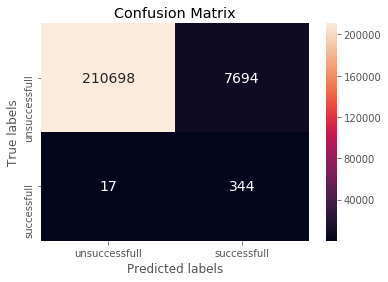

Accuracy score: 0.9647501977115742
Sensitivity score: 0.9529085872576177
Specificity score: 0.9647697717865124
f1-score: 0.0819145136325753
Precision score: 0.04279671560089574
Recall score: 0.9529085872576177
AUC: 0.99


In [181]:
#use the model to predict X_train_transformed 
y_train_pred = decisontree_oversampler_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = decisontree_oversampler_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [182]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.057270  1.000000  0.055712
0.1   0.1  0.808441  0.983380  0.808152
0.2   0.2  0.918136  0.966759  0.918056
0.3   0.3  0.964750  0.952909  0.964770
0.4   0.4  0.964750  0.952909  0.964770
0.5   0.5  0.964750  0.952909  0.964770
0.6   0.6  0.964750  0.952909  0.964770
0.7   0.7  0.981495  0.919668  0.981597
0.8   0.8  0.999429  0.864266  0.999652
0.9   0.9  0.999429  0.864266  0.999652


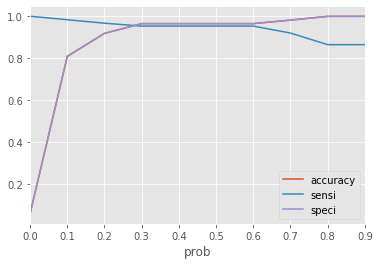

In [183]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.4 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

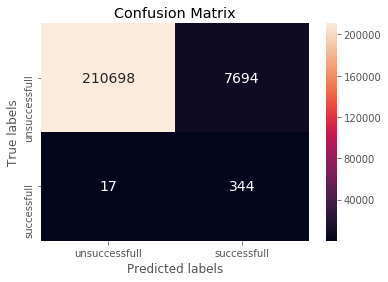

Accuracy score: 0.9647501977115742
Sensitivity score: 0.9529085872576177
Specificity score: 0.9647697717865124
f1-score: 0.0819145136325753
Precision score: 0.04279671560089574
Recall score: 0.9529085872576177
AUC: 0.99


In [184]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.4)#cutoff probability is 0.4

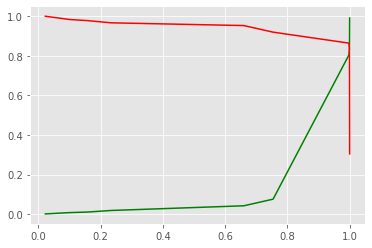

In [185]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

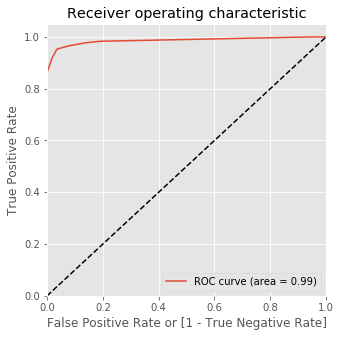

In [186]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [187]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'DecisionTree_Oversampler', #model_name
              5, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

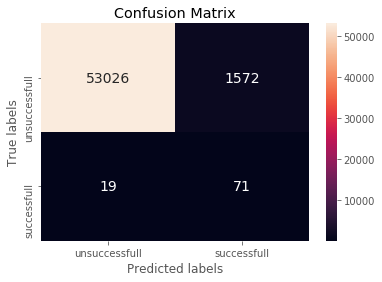

Accuracy score: 0.9709076945582212
Sensitivity score: 0.7888888888888889
Specificity score: 0.9712077365471262
f1-score: 0.08193883439122908
Precision score: 0.04321363359707851
Recall score: 0.7888888888888889
AUC: 0.85


In [188]:
# predict fraud on X_test_transformed data
y_test_pred = decisontree_oversampler_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = decisontree_oversampler_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.4)# cutoff probability is 0.4

### Draw ROC Curve

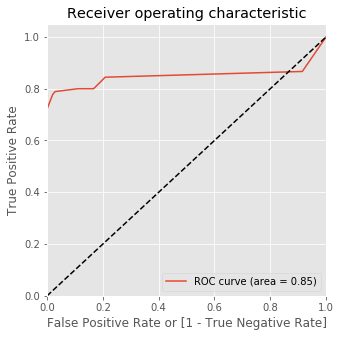

In [189]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [190]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'DecisionTree_Oversampler', #model_name
              5, #location or index
              'test' #train or test set
             )

In [191]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[5,'roc_auc'] = round(roc_score,2)
results_df.loc[5,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[5,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[5,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.6599426297769964
precision-recall threshold: 0.0


In [192]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                  Logistic      0.95             0.95       0.95       0.03   
1              DecisionTree      0.85             0.99       0.85       0.01   
2              RandomForest      0.95             0.98       0.95       0.03   
3                   XGBoost         1             0.88          1        0.8   
4      Logistic_Oversampler      0.92             0.97       0.92       0.02   
5  DecisionTree_Oversampler      0.96             0.95       0.96       0.04   

  train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0     0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1     0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2     0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3     0.84        1            0.76         1      0.85     0.8    0.98   
4     0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5     0.08     0.97            0.79      0.97      0.04    0.08    0.85   

  roc_threshold prec_rec_roc prec_rec_threshold  
0          0.56         0.77                  0  
1          0.43         0.76                  0  
2          0.27         0.81               0.03  
3             0         0.82                  0  
4          0.27         0.79               0.02  
5          0.66         0.73                  0

## Random Forest

In [193]:
#create Random Forest variable
#using class_weight as 'balanced'
randomforest = RandomForestClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate random over sampler
random_oversampler = RandomOverSampler(random_state=42)

#create pipeline
pipeline = make_pipeline(random_oversampler,randomforest)

#create parameters that will be used during randomsearch
params = {
    'randomforestclassifier__max_depth': [4],#[4,8,10], # maximum depth of the tree,
    'randomforestclassifier__min_samples_leaf': [100],#[50,80,100,120], #minimum sample observations at the leaf
    'randomforestclassifier__min_samples_split': [120],#[50,80,100,120], #minmum sample observations at the node during split
    'randomforestclassifier__max_features': [20],#[5,8,10,12,15,20], # number of features
    'randomforestclassifier__criterion': ['entropy'],#['gini','entropy'], #function to measure quality of split
    'randomforestclassifier__n_estimators': [200],#[100,200,300], # no. of trees to be build
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
randomforest_oversampler_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [194]:
randomforest_oversampler_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.5min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=42,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight='balanced',
                                                                     criterion='gini',
                                                                     max_depth=N

In [195]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", randomforest_oversampler_randomsearch.best_score_)
print(randomforest_oversampler_randomsearch.best_params_)

best accuracy 0.9754478938380473
{'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 120, 'randomforestclassifier__min_samples_leaf': 100, 'randomforestclassifier__max_features': 20, 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'entropy'}


In [196]:
# scores of RandomizedSearchCV
scores = randomforest_oversampler_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     615.251723      8.662746         0.629237        0.070718   

  param_randomforestclassifier__n_estimators  \
0                                        200   

  param_randomforestclassifier__min_samples_split  \
0                                             120   

  param_randomforestclassifier__min_samples_leaf  \
0                                            100   

  param_randomforestclassifier__max_features  \
0                                         20   

  param_randomforestclassifier__max_depth  \
0                                       4   

  param_randomforestclassifier__criterion  \
0                                 entropy   

                                              params  split0_test_score  \
0  {'randomforestclassifier__n_estimators': 200, ...           0.996327   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.989888            0.93866           0.970205            0.98216   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.975448        0.020349                1            0.994837   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.995742            0.997601            0.996874   

   split4_train_score  mean_train_score  std_train_score  
0            0.996441          0.996299         0.000948

### predict y_train data

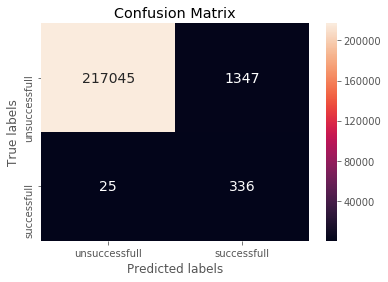

Accuracy score: 0.9937280860148203
Sensitivity score: 0.9307479224376731
Specificity score: 0.993832191655372
f1-score: 0.3287671232876712
Precision score: 0.19964349376114082
Recall score: 0.9307479224376731
AUC: 0.99


In [197]:
y_train_pred = randomforest_oversampler_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = randomforest_oversampler_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [198]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.791203  0.994460  0.790867
0.2   0.2  0.918205  0.983380  0.918097
0.3   0.3  0.961953  0.955679  0.961963
0.4   0.4  0.982295  0.944598  0.982357
0.5   0.5  0.993728  0.930748  0.993832
0.6   0.6  0.997851  0.911357  0.997994
0.7   0.7  0.999287  0.900277  0.999451
0.8   0.8  0.999479  0.878116  0.999679
0.9   0.9  0.999502  0.858726  0.999734


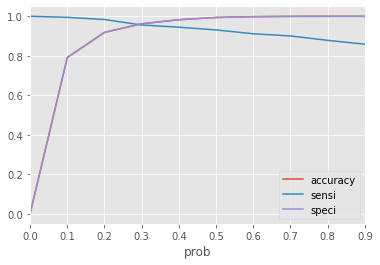

In [199]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.2 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

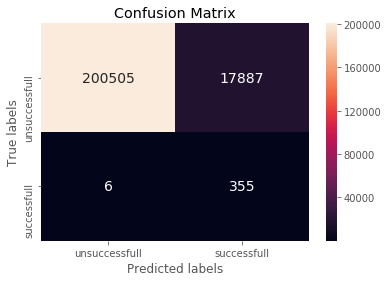

Accuracy score: 0.9182045503375954
Sensitivity score: 0.9833795013850416
Specificity score: 0.9180968167332136
f1-score: 0.03816588722249099
Precision score: 0.019460585462120383
Recall score: 0.9833795013850416
AUC: 0.99


In [200]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.2)#cutoff probability is 0.2

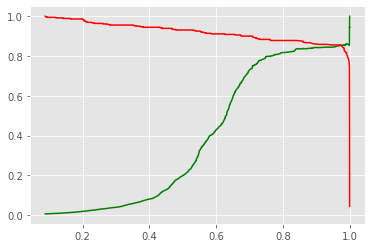

In [201]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

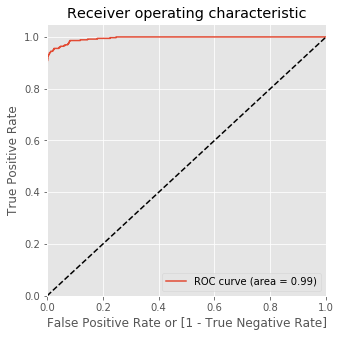

In [202]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [203]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'RandomForest_Oversampler', #model_name
              6, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

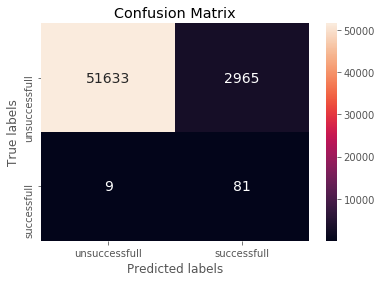

Accuracy score: 0.9456187829139848
Sensitivity score: 0.9
Specificity score: 0.9456939814645225
f1-score: 0.051658163265306124
Precision score: 0.02659225213394616
Recall score: 0.9
AUC: 0.98


In [204]:
# predict fraud on test data
y_test_pred = randomforest_oversampler_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = randomforest_oversampler_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.2)# cutoff probability is 0.2

### Draw ROC Curve

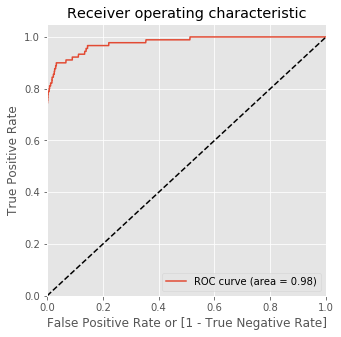

In [205]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [206]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'RandomForest_Oversampler', #model_name
              6, #location or index
              'test' #train or test set
             )

In [207]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[6,'roc_auc'] = round(roc_score,2)
results_df.loc[6,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[6,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[6,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.284708815232932
precision-recall threshold: 0.031220518742225048


In [208]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                  Logistic      0.95             0.95       0.95       0.03   
1              DecisionTree      0.85             0.99       0.85       0.01   
2              RandomForest      0.95             0.98       0.95       0.03   
3                   XGBoost         1             0.88          1        0.8   
4      Logistic_Oversampler      0.92             0.97       0.92       0.02   
5  DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6  RandomForest_Oversampler      0.92             0.98       0.92       0.02   

  train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0     0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1     0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2     0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3     0.84        1            0.76         1      0.85     0.8    0.98   
4     0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5     0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6     0.04     0.95             0.9      0.95      0.03    0.05    0.98   

  roc_threshold prec_rec_roc prec_rec_threshold  
0          0.56         0.77                  0  
1          0.43         0.76                  0  
2          0.27         0.81               0.03  
3             0         0.82                  0  
4          0.27         0.79               0.02  
5          0.66         0.73                  0  
6          0.28         0.76               0.03

## XGBoost

In [209]:
#create XGBoost variable
#using class_weight as 'balanced'
xgboost = XGBClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate random over sampler
random_oversampler = RandomOverSampler(random_state=42)

#create pipeline
pipeline = make_pipeline(random_oversampler,xgboost)

#create parameters that will be used during randomsearch
params = {
    'xgbclassifier__learning_rate': [0.02],#[0.01,0.02,0.03],# learning rate,
    'xgbclassifier__min_child_weight': [8],#[5,6,7,8,9], #minimum sum of weights of all observations required in a child
    'xgbclassifier__gamma': [2.5],#[1, 1.5, 2, 2.5, 3], #minimum loss reduction required to make a split
    'xgbclassifier__n_estimators': [250],#[200,250,300], # no. of trees to be build
    'xgbclassifier__colsample_bytree': [0.8],#[0.6, 0.8, 0.9, 1.0] #fraction of columns to be randomly samples for each tree
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
xgboost_oversampler_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [210]:
xgboost_oversampler_randomsearch.fit(X_train_transformed.values,y_train.values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=42,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            class_weight='balanced',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                       

In [211]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", xgboost_oversampler_randomsearch.best_score_)
print(xgboost_oversampler_randomsearch.best_params_)

best accuracy 0.9737808678318738
{'xgbclassifier__n_estimators': 250, 'xgbclassifier__min_child_weight': 8, 'xgbclassifier__learning_rate': 0.02, 'xgbclassifier__gamma': 2.5, 'xgbclassifier__colsample_bytree': 0.8}


In [212]:
# scores of RandomizedSearchCV
scores = xgboost_oversampler_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     273.243037      1.030353         0.563558        0.029502   

  param_xgbclassifier__n_estimators param_xgbclassifier__min_child_weight  \
0                               250                                     8   

  param_xgbclassifier__learning_rate param_xgbclassifier__gamma  \
0                               0.02                        2.5   

  param_xgbclassifier__colsample_bytree  \
0                                   0.8   

                                              params  split0_test_score  \
0  {'xgbclassifier__n_estimators': 250, 'xgbclass...           0.998108   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0            0.97524           0.952027           0.964945           0.978584   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.973781        0.015286                1            0.999253   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999376            0.999681            0.999546   

   split4_train_score  mean_train_score  std_train_score  
0            0.999356          0.999442         0.000152

### predict y_train data

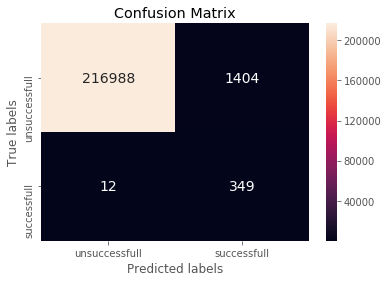

Accuracy score: 0.9935269459161703
Sensitivity score: 0.9667590027700831
Specificity score: 0.9935711930839958
f1-score: 0.3301797540208136
Precision score: 0.1990872789503708
Recall score: 0.9667590027700831
AUC: 1.0


In [213]:
y_train_pred = xgboost_oversampler_randomsearch.predict(X_train_transformed.values)
# check area under curve
y_train_pred_prob = xgboost_oversampler_randomsearch.predict_proba(X_train_transformed.values)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [214]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.890982  1.000000  0.890802
0.2   0.2  0.958369  0.997230  0.958304
0.3   0.3  0.976741  0.997230  0.976707
0.4   0.4  0.987173  0.983380  0.987179
0.5   0.5  0.993527  0.966759  0.993571
0.6   0.6  0.996553  0.936288  0.996653
0.7   0.7  0.997929  0.930748  0.998040
0.8   0.8  0.998880  0.911357  0.999025
0.9   0.9  0.999378  0.889197  0.999560


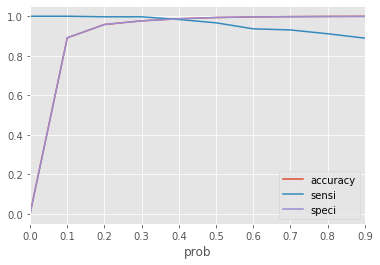

In [215]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.3 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

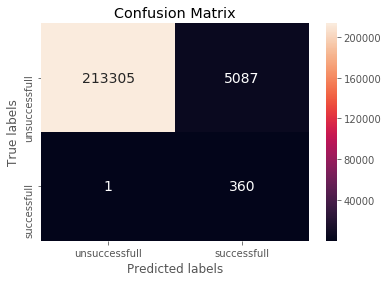

Accuracy score: 0.9767408904106458
Sensitivity score: 0.997229916897507
Specificity score: 0.9767070222352467
f1-score: 0.1239669421487603
Precision score: 0.06609142647328804
Recall score: 0.997229916897507
AUC: 1.0


In [216]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.3)#cutoff probability is 0.3

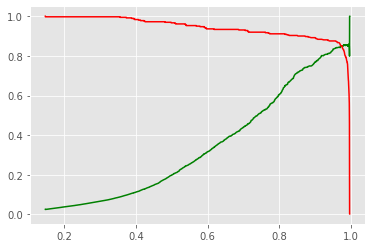

In [217]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

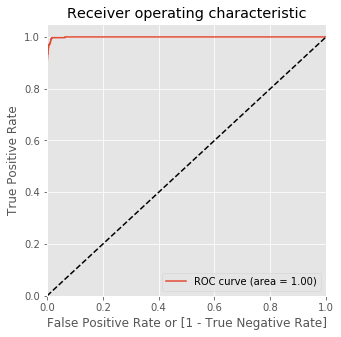

In [218]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [219]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'XGBoost_Oversampler', #model_name
              7, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

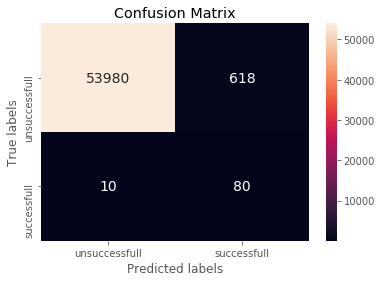

Accuracy score: 0.9885166764189585
Sensitivity score: 0.8888888888888888
Specificity score: 0.9886809040624198
f1-score: 0.20304568527918784
Precision score: 0.11461318051575932
Recall score: 0.8888888888888888
AUC: 0.98


In [220]:
# predict fraud on test data
y_test_pred = xgboost_oversampler_randomsearch.predict(X_test_transformed.values)

# check area under curve
y_pred_prob = xgboost_oversampler_randomsearch.predict_proba(X_test_transformed.values)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.3)# cutoff probability is 0.3

### Draw ROC Curve

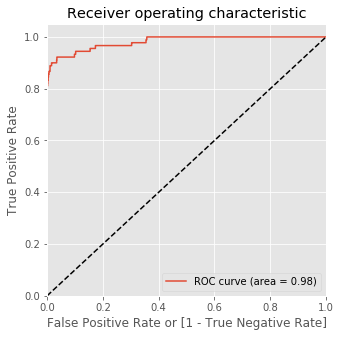

In [221]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [222]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'XGBoost_Oversampler', #model_name
              7, #location or index
              'test' #train or test set
             )

In [223]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[7,'roc_auc'] = round(roc_score,2)
results_df.loc[7,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[7,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[7,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.14955800771713257
precision-recall threshold: 0.026402637362480164


In [224]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                  Logistic      0.95             0.95       0.95       0.03   
1              DecisionTree      0.85             0.99       0.85       0.01   
2              RandomForest      0.95             0.98       0.95       0.03   
3                   XGBoost         1             0.88          1        0.8   
4      Logistic_Oversampler      0.92             0.97       0.92       0.02   
5  DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6  RandomForest_Oversampler      0.92             0.98       0.92       0.02   
7       XGBoost_Oversampler      0.98                1       0.98       0.07   

  train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0     0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1     0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2     0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3     0.84        1            0.76         1      0.85     0.8    0.98   
4     0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5     0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6     0.04     0.95             0.9      0.95      0.03    0.05    0.98   
7     0.12     0.99            0.89      0.99      0.11     0.2    0.98   

  roc_threshold prec_rec_roc prec_rec_threshold  
0          0.56         0.77                  0  
1          0.43         0.76                  0  
2          0.27         0.81               0.03  
3             0         0.82                  0  
4          0.27         0.79               0.02  
5          0.66         0.73                  0  
6          0.28         0.76               0.03  
7          0.15         0.82               0.03

In [225]:
# #features list
# features_list = X_train_transformed.columns

# #features importance
# features_importance = list(xgboost_oversampler_randomsearch.best_estimator_.
#                            named_steps['xgbclassifier'].feature_importances_.round(4).tolist())

# #create dataframe with feature importance in percentage
# params_df = pd.DataFrame({'feature':features_list,'coefficient':features_importance})
# params_df = params_df.sort_values(by='coefficient',ascending=False).reset_index(drop=True)
# params_df

## Fianl Model - Random Forest - with balancing dataset

In [226]:
#create Random Forest variable
#using class_weight as 'balanced'
clf = RandomForestClassifier(class_weight='balanced',
                            max_depth = 4,
                            min_samples_leaf = 100,
                            min_samples_split=120,
                            max_features = 20,
                            criterion = 'entropy',
                            n_estimators = 200)
clf.fit(X_train_oversampler, y_train_oversampler)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=120,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### predict y_train data

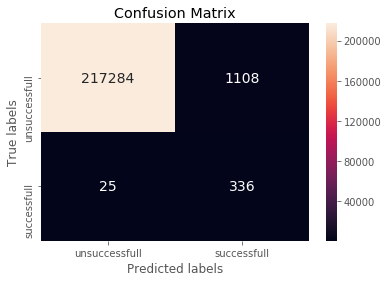

Accuracy score: 0.9948206424597605
Sensitivity score: 0.9307479224376731
Specificity score: 0.9949265540862303
f1-score: 0.3722991689750692
Precision score: 0.23268698060941828
Recall score: 0.9307479224376731
AUC: 0.99


In [227]:
y_train_pred = clf.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = clf.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [228]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.763857  0.997230  0.763471
0.2   0.2  0.915882  0.977839  0.915780
0.3   0.3  0.960691  0.958449  0.960695
0.4   0.4  0.982743  0.947368  0.982802
0.5   0.5  0.994821  0.930748  0.994927
0.6   0.6  0.997856  0.911357  0.997999
0.7   0.7  0.999301  0.897507  0.999469
0.8   0.8  0.999479  0.878116  0.999679
0.9   0.9  0.999506  0.861496  0.999734


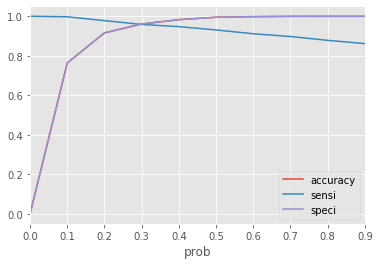

In [229]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.2 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

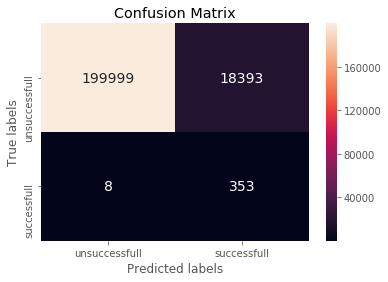

Accuracy score: 0.9158822964713627
Sensitivity score: 0.9778393351800554
Specificity score: 0.9157798820469615
f1-score: 0.03694980897053436
Precision score: 0.01883068387922757
Recall score: 0.9778393351800554
AUC: 0.99


In [230]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.2)#cutoff probability is 0.2

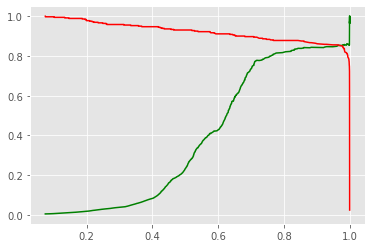

In [231]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

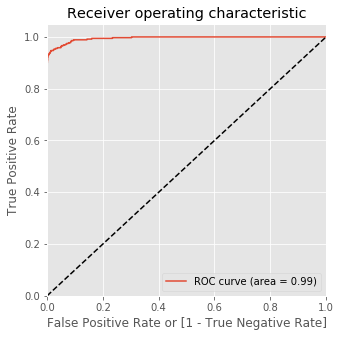

In [232]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

## Evaluate model on test data and check the score

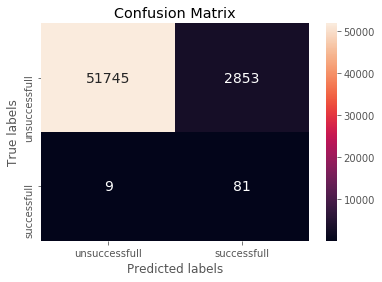

Accuracy score: 0.9476667641895845
Sensitivity score: 0.9
Specificity score: 0.9477453386570936
f1-score: 0.053571428571428575
Precision score: 0.027607361963190184
Recall score: 0.9
AUC: 0.98


In [233]:
# predict fraud on test data
y_test_pred = clf.predict(X_test_transformed)

# check area under curve
y_pred_prob = clf.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.2)# cutoff probability is 0.2

### Draw ROC Curve

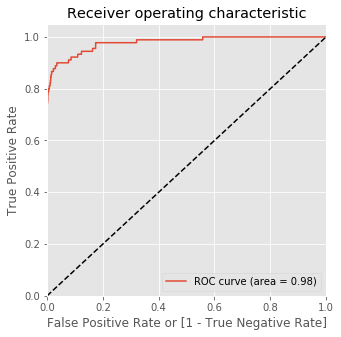

In [234]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Feature Importance

In [235]:
#features list
features_list = X_train_transformed.columns

#features importance
features_importance = list(clf.feature_importances_)

#create dataframe with feature importance in percentage
params_df = pd.DataFrame({'feature':features_list,'coefficient':features_importance})
params_df = params_df.sort_values(by='coefficient',ascending=False).reset_index(drop=True)
params_df

feature  coefficient
0          V14     0.591800
1          V10     0.183915
2           V4     0.070621
3          V12     0.058187
4          V17     0.055172
5           V7     0.007300
6           V8     0.005781
7          V28     0.003996
8          V20     0.003415
9          V21     0.003321
10  Amount_log     0.003212
11          V3     0.003165
12         V11     0.002016
13         V19     0.001687
14         V26     0.000935
15    Time_rsc     0.000857
16         V23     0.000799
17         V16     0.000624
18         V18     0.000600
19          V5     0.000536
20         V25     0.000460
21         V22     0.000438
22          V9     0.000430
23         V24     0.000202
24         V15     0.000157
25          V6     0.000125
26          V1     0.000093
27         V13     0.000075
28          V2     0.000073
29         V27     0.000008

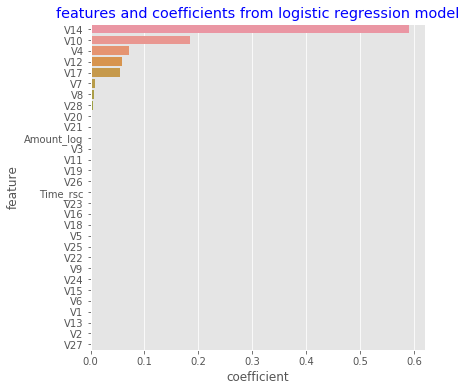

In [236]:
plt.figure(figsize=(6,6))
plt.title('features and coefficients from logistic regression model',color='blue')
sns.barplot(y='feature',x='coefficient',data=params_df);

### Observation from above plot
- V14 forms the very important predictor with positive coefficient. 
- V10 and V4 are also important predictors
- Amount_pwrt and Time_rsc afe not good predictors

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 4


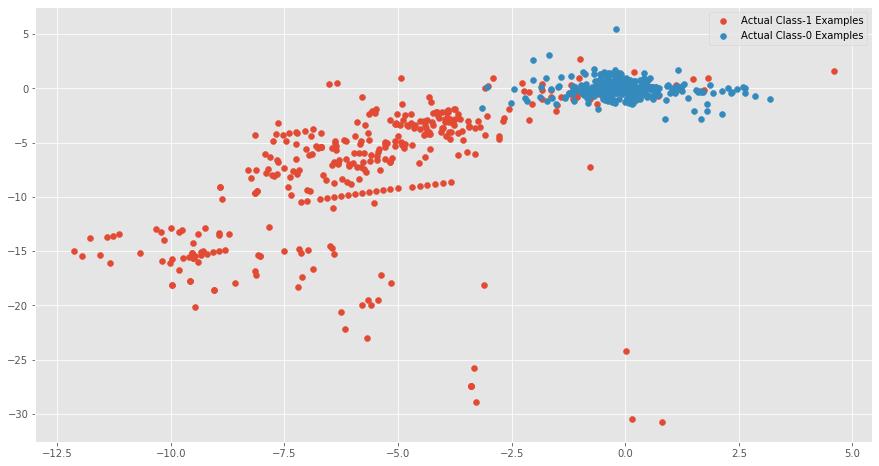

In [237]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_oversampler.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_oversampler.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.figure(figsize=(15,8))

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend();

### SMOTE

#### Create X_train and y_train using SMOTE on original X_train_transformed and y_train

In [238]:
#print('Original dataset shape %s' % Counter(y))
print('Original dataset shape \n{0}'.format(y_train.value_counts()))
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train_transformed,y_train)
#print('Resampled dataset shape %s' % Counter(y_oversampler))
print('Resampled dataset shape \n{0}'.format(
    pd.DataFrame(y_train_smote,columns=['Class'])['Class'].value_counts()))

Original dataset shape 
0    218392
1       361
Name: Class, dtype: int64
Resampled dataset shape 
1    218392
0    218392
Name: Class, dtype: int64


### Print the class distribution after applying SMOTE 

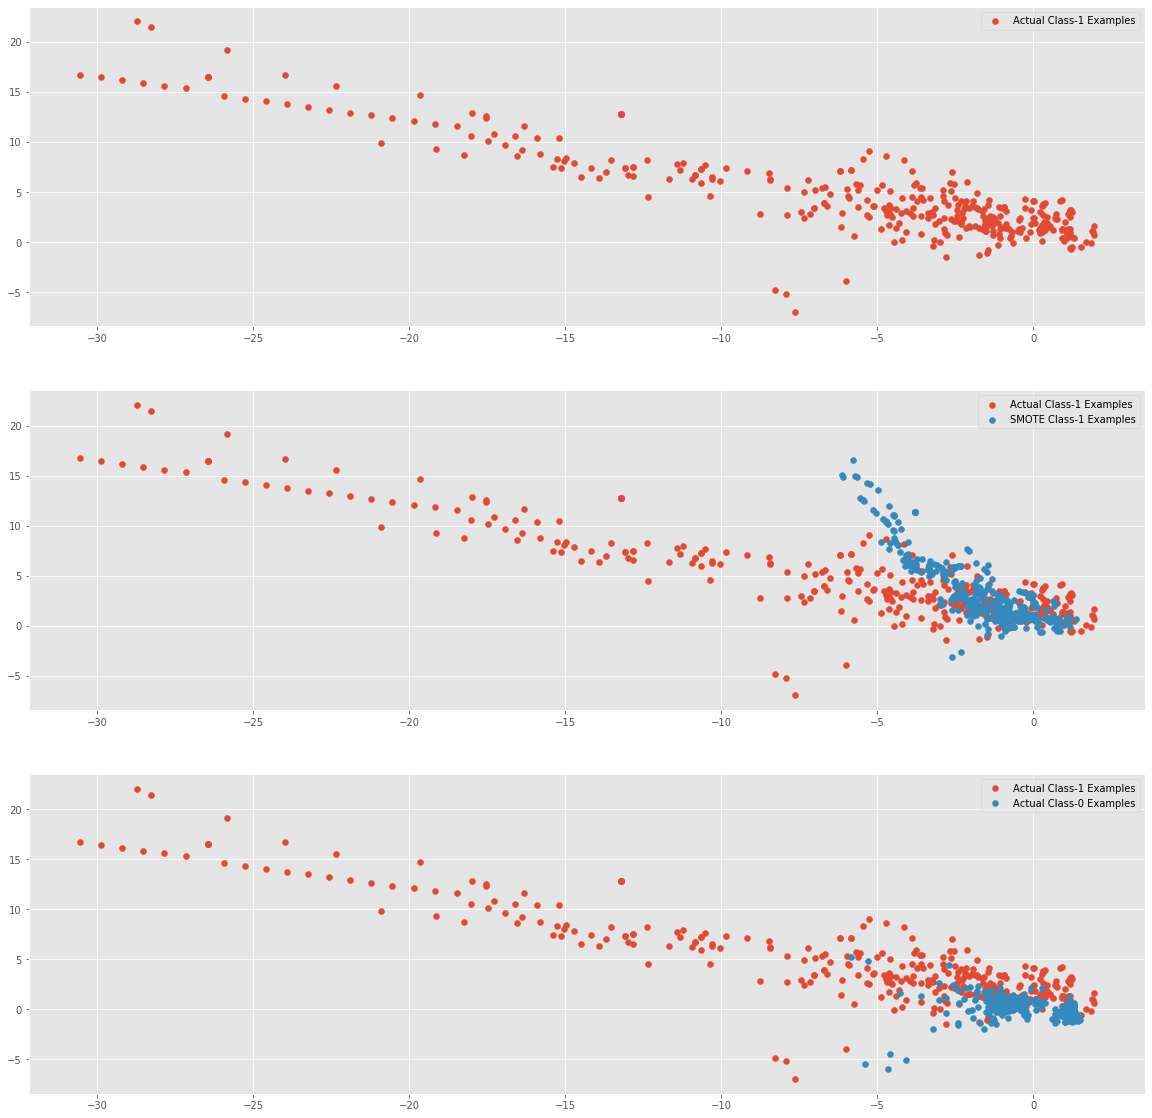

In [239]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend();

In [240]:
#Convert into dataframe
X_train_smote = pd.DataFrame(X_train_smote,columns=X_train.columns)
y_train_smote = pd.Series(y_train_smote)

## Logistic Regression

In [241]:
#create Logistic Regression variable
#using class_weight as 'balanced'
logistic_reg = LogisticRegression(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate smote
smote = SMOTE(random_state=42)

#create pipeline
pipeline = make_pipeline(smote,logistic_reg)

#create parameters that will be used during randomsearch
params = {
    'logisticregression__C':[0.1],#[0.1,0.5,0.8,1,2,5], #regularization term. smaller number means more regularization
    'logisticregression__penalty':['l2'],#['l1','l2'], #norm used in penalization
    'logisticregression__solver':['saga'],#['liblinear','saga','lbfgs']
    }


#create RandomizedSearchCV object to find best param that we will use in our final model building process
logistic_smote_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [242]:
logistic_smote_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.9s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('smote',
                                              SMOTE(k_neighbors=5,
                                                    kind='deprecated',
                                                    m_neighbors='deprecated',
                                                    n_jobs=1,
                                                    out_step='deprecated',
                                                    random_state=42, ratio=None,
                                                    sampling_strategy='auto',
                                                    svm_estimator='deprecated')),
                                             ('logisticregression',
                                              LogisticRegression(C=1.0,
                                                                 class_weight='balanced',
                         

In [243]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", logistic_smote_randomsearch.best_score_)
print(logistic_smote_randomsearch.best_params_)

best accuracy 0.9698571463737616
{'logisticregression__solver': 'saga', 'logisticregression__penalty': 'l2', 'logisticregression__C': 0.1}


In [244]:
# scores of RandomizedSearchCV
scores = logistic_smote_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      20.268029      6.451742         0.022386         0.00065   

  param_logisticregression__solver param_logisticregression__penalty  \
0                             saga                                l2   

  param_logisticregression__C  \
0                         0.1   

                                              params  split0_test_score  \
0  {'logisticregression__solver': 'saga', 'logist...           0.996968   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.979032           0.941901            0.96718           0.964204   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.969857         0.01811                1            0.988433   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.987524            0.993625            0.989167   

   split4_train_score  mean_train_score  std_train_score  
0            0.989945          0.989739         0.002102

### predict y_train data

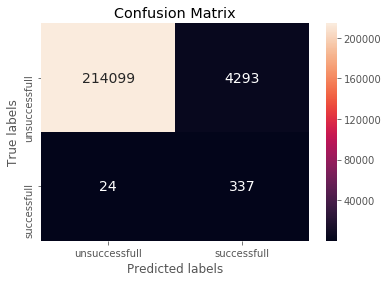

Accuracy score: 0.9802654135029005
Sensitivity score: 0.9335180055401662
Specificity score: 0.9803426865452947
f1-score: 0.1350430775395712
Precision score: 0.07278617710583153
Recall score: 0.9335180055401662
AUC: 0.99


In [245]:
y_train_pred = logistic_smote_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = logistic_smote_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [246]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.842731  0.975069  0.842513
0.2   0.2  0.931978  0.961219  0.931930
0.3   0.3  0.960435  0.950139  0.960452
0.4   0.4  0.972618  0.941828  0.972668
0.5   0.5  0.980265  0.933518  0.980343
0.6   0.6  0.985810  0.927978  0.985906
0.7   0.7  0.990158  0.922438  0.990270
0.8   0.8  0.993084  0.908587  0.993223
0.9   0.9  0.995442  0.900277  0.995600


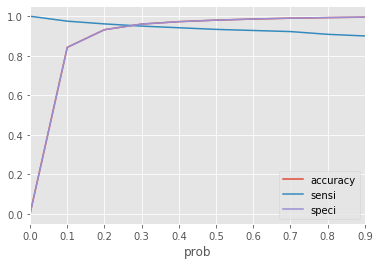

In [247]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.2 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

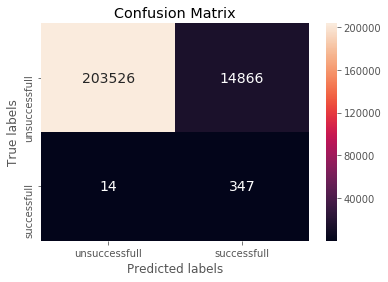

Accuracy score: 0.9319780757292472
Sensitivity score: 0.961218836565097
Specificity score: 0.9319297410161544
f1-score: 0.04456144856812636
Precision score: 0.02280943929533951
Recall score: 0.961218836565097
AUC: 0.99


In [248]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.2)#cutoff probability is 0.2

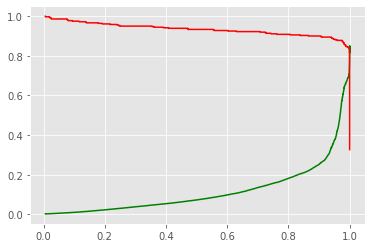

In [249]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

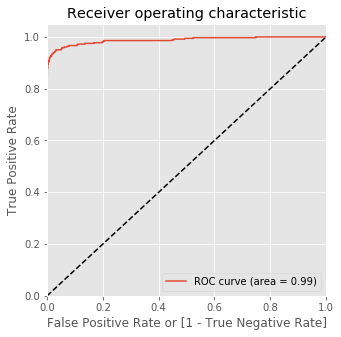

In [250]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [251]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'Logistic_Smote', #model_name
              8, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

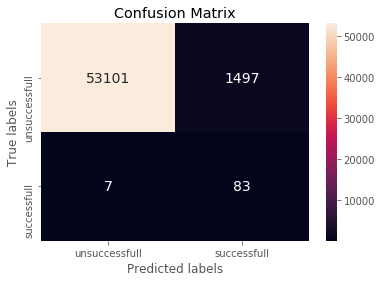

Accuracy score: 0.9724985371562317
Sensitivity score: 0.9222222222222223
Specificity score: 0.9725814132385802
f1-score: 0.09940119760479042
Precision score: 0.052531645569620256
Recall score: 0.9222222222222223
AUC: 0.98


In [252]:
# predict fraud on test data
y_test_pred = logistic_smote_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = logistic_smote_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.2)# cutoff probability is 0.2

### Draw ROC Curve

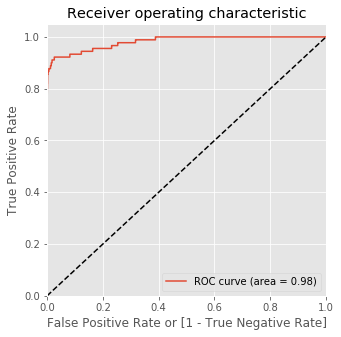

In [253]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [254]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'Logistic_Smote', #model_name
              8, #location or index
              'test' #train or test set
             )

In [255]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[8,'roc_auc'] = round(roc_score,2)
results_df.loc[8,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[8,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[8,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.2112146529682426
precision-recall threshold: 0.008055381160234557


In [256]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                  Logistic      0.95             0.95       0.95       0.03   
1              DecisionTree      0.85             0.99       0.85       0.01   
2              RandomForest      0.95             0.98       0.95       0.03   
3                   XGBoost         1             0.88          1        0.8   
4      Logistic_Oversampler      0.92             0.97       0.92       0.02   
5  DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6  RandomForest_Oversampler      0.92             0.98       0.92       0.02   
7       XGBoost_Oversampler      0.98                1       0.98       0.07   
8            Logistic_Smote      0.93             0.96       0.93       0.02   

  train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0     0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1     0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2     0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3     0.84        1            0.76         1      0.85     0.8    0.98   
4     0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5     0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6     0.04     0.95             0.9      0.95      0.03    0.05    0.98   
7     0.12     0.99            0.89      0.99      0.11     0.2    0.98   
8     0.04     0.97            0.92      0.97      0.05     0.1    0.98   

  roc_threshold prec_rec_roc prec_rec_threshold  
0          0.56         0.77                  0  
1          0.43         0.76                  0  
2          0.27         0.81               0.03  
3             0         0.82                  0  
4          0.27         0.79               0.02  
5          0.66         0.73                  0  
6          0.28         0.76               0.03  
7          0.15         0.82               0.03  
8          0.21          0.8               0.01

## Decision Tree

In [257]:
#create Logistic Regression variable
#using class_weight as 'balanced'
decisontree = DecisionTreeClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate smote
smote = SMOTE(random_state=42)

#create pipeline
pipeline = make_pipeline(smote,decisontree)

#create parameters that will be used during randomsearch
params = {
    'decisiontreeclassifier__max_depth': [4],#[4,8,10], # maximum depth of the tree,
    'decisiontreeclassifier__min_samples_leaf': [100],#[50,80,100,120], #minimum sample observations at the leaf
    'decisiontreeclassifier__min_samples_split': [120],#[50,80,100,120], #minmum sample observations at the node during split
    'decisiontreeclassifier__max_features': [20],#[5,8,10,12,15,20], # number of features
    'decisiontreeclassifier__criterion': ['entropy'],#['gini','entropy'] #function to measure quality of split
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
decisontree_smote_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, 
                                                  scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [258]:
decisontree_smote_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.6s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('smote',
                                              SMOTE(k_neighbors=5,
                                                    kind='deprecated',
                                                    m_neighbors='deprecated',
                                                    n_jobs=1,
                                                    out_step='deprecated',
                                                    random_state=42, ratio=None,
                                                    sampling_strategy='auto',
                                                    svm_estimator='deprecated')),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                                     class_weight='balanced...
    

In [259]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", decisontree_smote_randomsearch.best_score_)
print(decisontree_smote_randomsearch.best_params_)

best accuracy 0.958314710727087
{'decisiontreeclassifier__min_samples_split': 120, 'decisiontreeclassifier__min_samples_leaf': 100, 'decisiontreeclassifier__max_features': 20, 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__criterion': 'entropy'}


In [260]:
# scores of RandomizedSearchCV
scores = decisontree_smote_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.166666      0.106516         0.024006        0.000742   

  param_decisiontreeclassifier__min_samples_split  \
0                                             120   

  param_decisiontreeclassifier__min_samples_leaf  \
0                                            100   

  param_decisiontreeclassifier__max_features  \
0                                         20   

  param_decisiontreeclassifier__max_depth  \
0                                       4   

  param_decisiontreeclassifier__criterion  \
0                                 entropy   

                                              params  split0_test_score  \
0  {'decisiontreeclassifier__min_samples_split': ...           0.989153   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.971103           0.947289           0.957419            0.92661   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.958315        0.021176                1            0.986038   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.976918            0.987588            0.989232   

   split4_train_score  mean_train_score  std_train_score  
0            0.988169          0.985589         0.004457

### predict y_train data

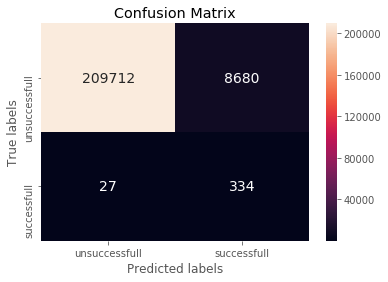

Accuracy score: 0.9601971172966771
Sensitivity score: 0.925207756232687
Specificity score: 0.9602549543939338
f1-score: 0.07125333333333332
Precision score: 0.03705347237630353
Recall score: 0.925207756232687
AUC: 0.99


In [261]:
y_train_pred = decisontree_smote_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = decisontree_smote_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [262]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.009819  1.000000  0.008183
0.1   0.1  0.763546  0.988920  0.763174
0.2   0.2  0.921930  0.955679  0.921874
0.3   0.3  0.921930  0.955679  0.921874
0.4   0.4  0.960197  0.925208  0.960255
0.5   0.5  0.960197  0.925208  0.960255
0.6   0.6  0.960197  0.925208  0.960255
0.7   0.7  0.999264  0.861496  0.999492
0.8   0.8  0.999264  0.861496  0.999492
0.9   0.9  0.999264  0.861496  0.999492


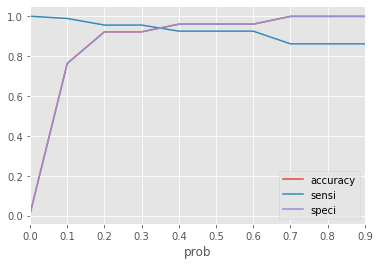

In [263]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.3 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

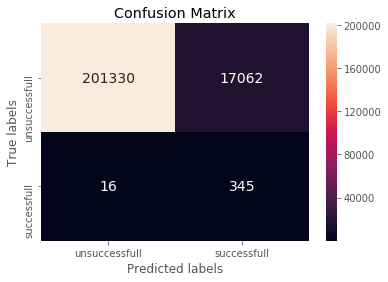

Accuracy score: 0.9219302135285001
Sensitivity score: 0.9556786703601108
Specificity score: 0.921874427634712
f1-score: 0.03883385862224223
Precision score: 0.019819612799448497
Recall score: 0.9556786703601108
AUC: 0.99


In [264]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.3)#cutoff probability is 0.3

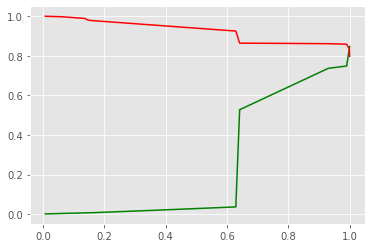

In [265]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

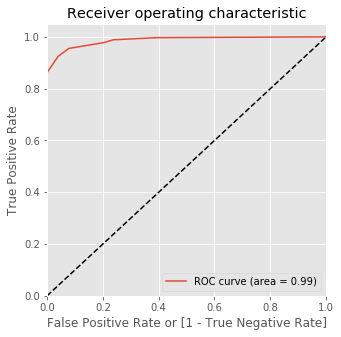

In [266]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [267]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'DecisionTree_Smote', #model_name
              9, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

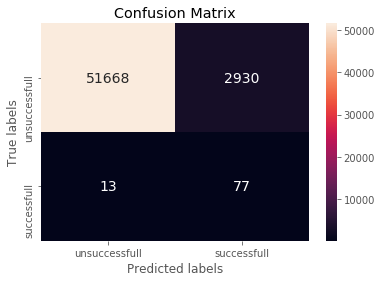

Accuracy score: 0.9461856348741955
Sensitivity score: 0.8555555555555555
Specificity score: 0.946335030587201
f1-score: 0.04972554084597997
Precision score: 0.02560691719321583
Recall score: 0.8555555555555555
AUC: 0.92


In [268]:
# predict fraud on test data
y_test_pred = decisontree_smote_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = decisontree_smote_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.3)# cutoff probability is 0.3

### Draw ROC Curve

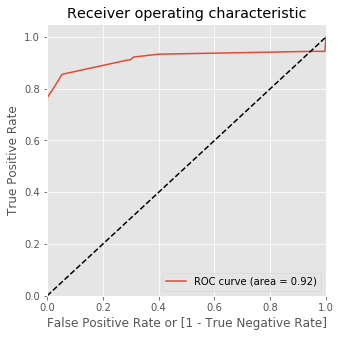

In [269]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [270]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'DecisionTree_Smote', #model_name
              9, #location or index
              'test' #train or test set
             )

In [271]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[9,'roc_auc'] = round(roc_score,2)
results_df.loc[9,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[9,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[9,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.3586840091813313
precision-recall threshold: 0.0


In [272]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                  Logistic      0.95             0.95       0.95       0.03   
1              DecisionTree      0.85             0.99       0.85       0.01   
2              RandomForest      0.95             0.98       0.95       0.03   
3                   XGBoost         1             0.88          1        0.8   
4      Logistic_Oversampler      0.92             0.97       0.92       0.02   
5  DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6  RandomForest_Oversampler      0.92             0.98       0.92       0.02   
7       XGBoost_Oversampler      0.98                1       0.98       0.07   
8            Logistic_Smote      0.93             0.96       0.93       0.02   
9        DecisionTree_Smote      0.92             0.96       0.92       0.02   

  train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0     0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1     0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2     0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3     0.84        1            0.76         1      0.85     0.8    0.98   
4     0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5     0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6     0.04     0.95             0.9      0.95      0.03    0.05    0.98   
7     0.12     0.99            0.89      0.99      0.11     0.2    0.98   
8     0.04     0.97            0.92      0.97      0.05     0.1    0.98   
9     0.04     0.95            0.86      0.95      0.03    0.05    0.92   

  roc_threshold prec_rec_roc prec_rec_threshold  
0          0.56         0.77                  0  
1          0.43         0.76                  0  
2          0.27         0.81               0.03  
3             0         0.82                  0  
4          0.27         0.79               0.02  
5          0.66         0.73                  0  
6          0.28         0.76               0.03  
7          0.15         0.82               0.03  
8          0.21          0.8               0.01  
9          0.36         0.72                  0

## Random Forest

In [273]:
#create Random Forest variable
#using class_weight as 'balanced'
randomforest = RandomForestClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate smote
smote = SMOTE(random_state=42)

#create pipeline
pipeline = make_pipeline(smote,randomforest)


#create parameters that will be used during randomsearch
params = {
    'randomforestclassifier__max_depth': [4],#[4,8,10], # maximum depth of the tree,
    'randomforestclassifier__min_samples_leaf': [100],#[50,80,100,120], #minimum sample observations at the leaf
    'randomforestclassifier__min_samples_split': [120],#[50,80,100,120], #minmum sample observations at the node during split
    'randomforestclassifier__max_features': [20],#[5,8,10,12,15,20], # number of features
    'randomforestclassifier__criterion': ['entropy'],#['gini','entropy'], #function to measure quality of split
    'randomforestclassifier__n_estimators': [200],#[100,200,300], # no. of trees to be build
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
randomforest_smote_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [274]:
randomforest_smote_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('smote',
                                              SMOTE(k_neighbors=5,
                                                    kind='deprecated',
                                                    m_neighbors='deprecated',
                                                    n_jobs=1,
                                                    out_step='deprecated',
                                                    random_state=42, ratio=None,
                                                    sampling_strategy='auto',
                                                    svm_estimator='deprecated')),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
              

In [275]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", randomforest_smote_randomsearch.best_score_)
print(randomforest_smote_randomsearch.best_params_)

best accuracy 0.9783875638744928
{'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 120, 'randomforestclassifier__min_samples_leaf': 100, 'randomforestclassifier__max_features': 20, 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'entropy'}


In [276]:
# scores of RandomizedSearchCV
scores = randomforest_smote_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      993.61493      6.954838         0.538054        0.035699   

  param_randomforestclassifier__n_estimators  \
0                                        200   

  param_randomforestclassifier__min_samples_split  \
0                                             120   

  param_randomforestclassifier__min_samples_leaf  \
0                                            100   

  param_randomforestclassifier__max_features  \
0                                         20   

  param_randomforestclassifier__max_depth  \
0                                       4   

  param_randomforestclassifier__criterion  \
0                                 entropy   

                                              params  split0_test_score  \
0  {'randomforestclassifier__n_estimators': 200, ...           0.994602   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.984897           0.960716           0.970737           0.980986   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.978388        0.011686                1            0.990021   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.991412            0.994881            0.994113   

   split4_train_score  mean_train_score  std_train_score  
0            0.991722           0.99243         0.001799

### predict y_train data

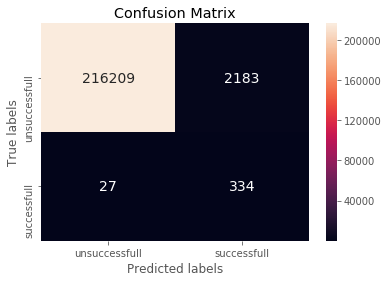

Accuracy score: 0.9898972814087121
Sensitivity score: 0.925207756232687
Specificity score: 0.9900042126085205
f1-score: 0.23210562890896452
Precision score: 0.13269765593961064
Recall score: 0.925207756232687
AUC: 0.99


In [277]:
y_train_pred = randomforest_smote_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = randomforest_smote_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [278]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.755564  0.988920  0.755179
0.2   0.2  0.907773  0.969529  0.907671
0.3   0.3  0.962657  0.950139  0.962677
0.4   0.4  0.980663  0.936288  0.980736
0.5   0.5  0.989897  0.925208  0.990004
0.6   0.6  0.994327  0.919668  0.994450
0.7   0.7  0.999310  0.883657  0.999501
0.8   0.8  0.999461  0.864266  0.999684
0.9   0.9  0.999493  0.847645  0.999744


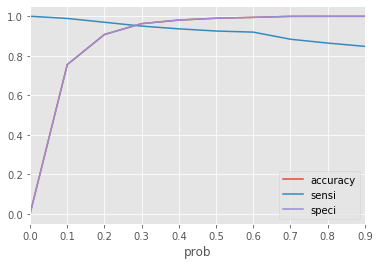

In [279]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.2 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

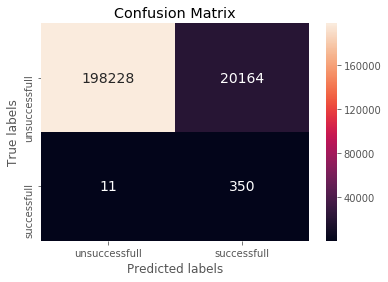

Accuracy score: 0.9077726934030619
Sensitivity score: 0.9695290858725761
Specificity score: 0.9076706106450786
f1-score: 0.033532934131736525
Precision score: 0.017061518962659648
Recall score: 0.9695290858725761
AUC: 0.99


In [280]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.2)#cutoff probability is 0.2

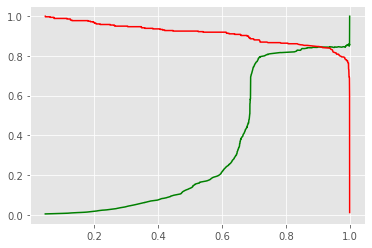

In [281]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

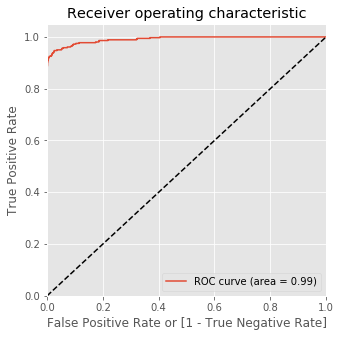

In [282]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [283]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'RandomForest_Smote', #model_name
              10, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

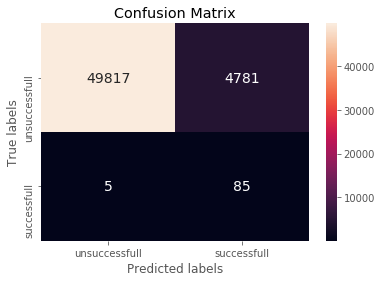

Accuracy score: 0.9124853715623171
Sensitivity score: 0.9444444444444444
Specificity score: 0.9124326898421188
f1-score: 0.03430185633575464
Precision score: 0.017468146321413892
Recall score: 0.9444444444444444
AUC: 0.98


In [284]:
# predict fraud on test data
y_test_pred = randomforest_smote_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = randomforest_smote_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.2)# cutoff probability is 0.2

### Draw ROC Curve

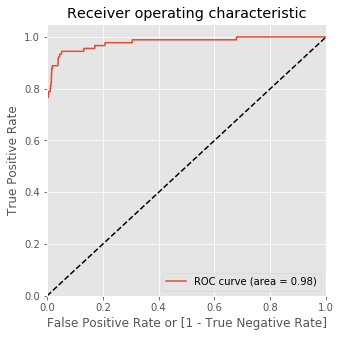

In [285]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [286]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'RandomForest_Smote', #model_name
              10, #location or index
              'test' #train or test set
             )

In [287]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[10,'roc_auc'] = round(roc_score,2)
results_df.loc[10,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[10,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[10,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.24941872478671498
precision-recall threshold: 0.017091578848305918


In [288]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                   Logistic      0.95             0.95       0.95       0.03   
1               DecisionTree      0.85             0.99       0.85       0.01   
2               RandomForest      0.95             0.98       0.95       0.03   
3                    XGBoost         1             0.88          1        0.8   
4       Logistic_Oversampler      0.92             0.97       0.92       0.02   
5   DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6   RandomForest_Oversampler      0.92             0.98       0.92       0.02   
7        XGBoost_Oversampler      0.98                1       0.98       0.07   
8             Logistic_Smote      0.93             0.96       0.93       0.02   
9         DecisionTree_Smote      0.92             0.96       0.92       0.02   
10        RandomForest_Smote      0.91             0.97       0.91       0.02   

   train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0      0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1      0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2      0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3      0.84        1            0.76         1      0.85     0.8    0.98   
4      0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5      0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6      0.04     0.95             0.9      0.95      0.03    0.05    0.98   
7      0.12     0.99            0.89      0.99      0.11     0.2    0.98   
8      0.04     0.97            0.92      0.97      0.05     0.1    0.98   
9      0.04     0.95            0.86      0.95      0.03    0.05    0.92   
10     0.03     0.91            0.94      0.91      0.02    0.03    0.98   

   roc_threshold prec_rec_roc prec_rec_threshold  
0           0.56         0.77                  0  
1           0.43         0.76                  0  
2           0.27         0.81               0.03  
3              0         0.82                  0  
4           0.27         0.79               0.02  
5           0.66         0.73                  0  
6           0.28         0.76               0.03  
7           0.15         0.82               0.03  
8           0.21          0.8               0.01  
9           0.36         0.72                  0  
10          0.25         0.77               0.02

## XGBoost

In [289]:
#create XGBoost variable
#using class_weight as 'balanced'
xgboost = XGBClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate smote
smote = SMOTE(random_state=42)

#create pipeline
pipeline = make_pipeline(smote,xgboost)


# {'decisontree__criterion': 'entropy', 'decisontree__max_depth': 4, 'decisontree__max_features': 20, 
#  'decisontree__min_samples_leaf': 100, 'decisontree__min_samples_split': 120}

#create parameters that will be used during randomsearch
params = {
    'xgbclassifier__learning_rate': [0.02],#[0.01,0.02,0.03],# learning rate,
    'xgbclassifier__min_child_weight': [8],#[5,6,7,8,9], #minimum sum of weights of all observations required in a child
    'xgbclassifier__gamma': [2.5],#[1, 1.5, 2, 2.5, 3], #minimum loss reduction required to make a split
    'xgbclassifier__n_estimators': [250],#[200,250,300], # no. of trees to be build
    'xgbclassifier__colsample_bytree': [0.8],#[0.6, 0.8, 0.9, 1.0] #fraction of columns to be randomly samples for each tree
    }


#create RandomizedSearchCV object to find best param that we will use in our final model building process
xgboost_smote_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [290]:
xgboost_smote_randomsearch.fit(X_train_transformed.values,y_train.values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.9min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('smote',
                                              SMOTE(k_neighbors=5,
                                                    kind='deprecated',
                                                    m_neighbors='deprecated',
                                                    n_jobs=1,
                                                    out_step='deprecated',
                                                    random_state=42, ratio=None,
                                                    sampling_strategy='auto',
                                                    svm_estimator='deprecated')),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                      

In [291]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", xgboost_smote_randomsearch.best_score_)
print(xgboost_smote_randomsearch.best_params_)

best accuracy 0.9708775978881559
{'xgbclassifier__n_estimators': 250, 'xgbclassifier__min_child_weight': 8, 'xgbclassifier__learning_rate': 0.02, 'xgbclassifier__gamma': 2.5, 'xgbclassifier__colsample_bytree': 0.8}


In [292]:
# scores of RandomizedSearchCV
scores = xgboost_smote_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     282.482729      2.192764          0.56626        0.173393   

  param_xgbclassifier__n_estimators param_xgbclassifier__min_child_weight  \
0                               250                                     8   

  param_xgbclassifier__learning_rate param_xgbclassifier__gamma  \
0                               0.02                        2.5   

  param_xgbclassifier__colsample_bytree  \
0                                   0.8   

                                              params  split0_test_score  \
0  {'xgbclassifier__n_estimators': 250, 'xgbclass...           0.998282   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.975574           0.940001           0.956615           0.983917   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.970878        0.020493                1            0.996582   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.998028            0.998904            0.998226   

   split4_train_score  mean_train_score  std_train_score  
0            0.997722          0.997893         0.000761

### predict y_train data

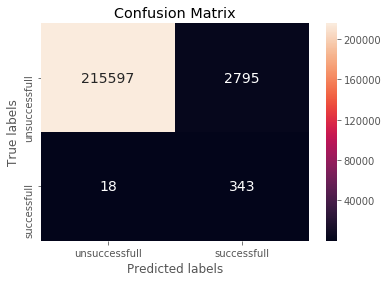

Accuracy score: 0.9871407477840304
Sensitivity score: 0.9501385041551247
Specificity score: 0.9872019121579545
f1-score: 0.19605601600457276
Precision score: 0.10930528999362651
Recall score: 0.9501385041551247
AUC: 1.0


In [293]:
y_train_pred = xgboost_smote_randomsearch.predict(X_train_transformed.values)
# check area under curve
y_train_pred_prob = xgboost_smote_randomsearch.predict_proba(X_train_transformed.values)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [294]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.844990  0.994460  0.844742
0.2   0.2  0.946213  0.983380  0.946152
0.3   0.3  0.970263  0.966759  0.970269
0.4   0.4  0.980128  0.952909  0.980173
0.5   0.5  0.987141  0.950139  0.987202
0.6   0.6  0.992937  0.933518  0.993035
0.7   0.7  0.996626  0.922438  0.996749
0.8   0.8  0.998670  0.886427  0.998855
0.9   0.9  0.999264  0.878116  0.999464


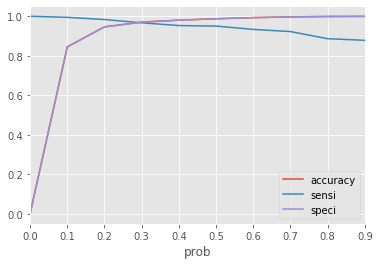

In [295]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.2 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

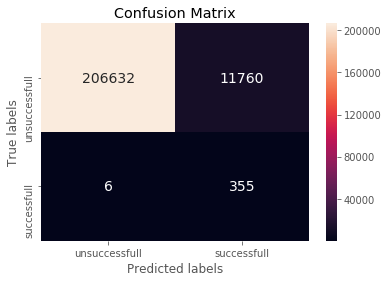

Accuracy score: 0.9462133090746184
Sensitivity score: 0.9833795013850416
Specificity score: 0.9461518736950072
f1-score: 0.05690926579031741
Precision score: 0.029302517540239374
Recall score: 0.9833795013850416
AUC: 1.0


In [296]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.2)#cutoff probability is 0.2

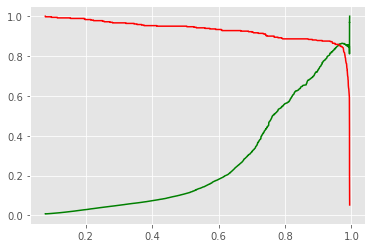

In [297]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

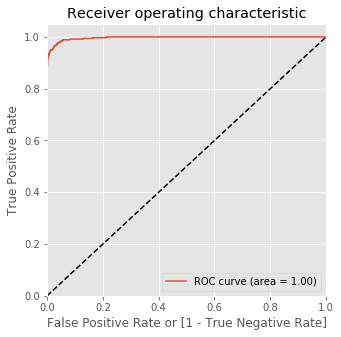

In [298]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [299]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'XGBoost_Smote', #model_name
              11, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

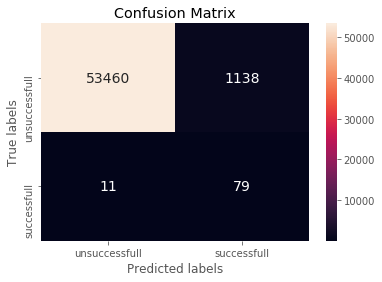

Accuracy score: 0.9789899063779989
Sensitivity score: 0.8777777777777778
Specificity score: 0.9791567456683395
f1-score: 0.12088752869166028
Precision score: 0.06491372226787182
Recall score: 0.8777777777777778
AUC: 0.98


In [300]:
# predict fraud on test data
y_test_pred = xgboost_smote_randomsearch.predict(X_test_transformed.values)

# check area under curve
y_pred_prob = xgboost_smote_randomsearch.predict_proba(X_test_transformed.values)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.2)# cutoff probability is 0.2

### Draw ROC Curve

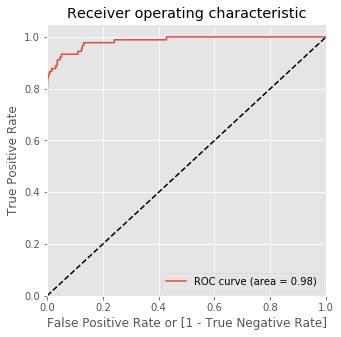

In [301]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [302]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'XGBoost_Smote', #model_name
              11, #location or index
              'test' #train or test set
             )

In [303]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[11,'roc_auc'] = round(roc_score,2)
results_df.loc[11,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[11,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[11,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.1276935338973999
precision-recall threshold: 0.017910970374941826


In [304]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                   Logistic      0.95             0.95       0.95       0.03   
1               DecisionTree      0.85             0.99       0.85       0.01   
2               RandomForest      0.95             0.98       0.95       0.03   
3                    XGBoost         1             0.88          1        0.8   
4       Logistic_Oversampler      0.92             0.97       0.92       0.02   
5   DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6   RandomForest_Oversampler      0.92             0.98       0.92       0.02   
7        XGBoost_Oversampler      0.98                1       0.98       0.07   
8             Logistic_Smote      0.93             0.96       0.93       0.02   
9         DecisionTree_Smote      0.92             0.96       0.92       0.02   
10        RandomForest_Smote      0.91             0.97       0.91       0.02   
11             XGBoost_Smote      0.95             0.98       0.95       0.03   

   train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0      0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1      0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2      0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3      0.84        1            0.76         1      0.85     0.8    0.98   
4      0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5      0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6      0.04     0.95             0.9      0.95      0.03    0.05    0.98   
7      0.12     0.99            0.89      0.99      0.11     0.2    0.98   
8      0.04     0.97            0.92      0.97      0.05     0.1    0.98   
9      0.04     0.95            0.86      0.95      0.03    0.05    0.92   
10     0.03     0.91            0.94      0.91      0.02    0.03    0.98   
11     0.06     0.98            0.88      0.98      0.06    0.12    0.98   

   roc_threshold prec_rec_roc prec_rec_threshold  
0           0.56         0.77                  0  
1           0.43         0.76                  0  
2           0.27         0.81               0.03  
3              0         0.82                  0  
4           0.27         0.79               0.02  
5           0.66         0.73                  0  
6           0.28         0.76               0.03  
7           0.15         0.82               0.03  
8           0.21          0.8               0.01  
9           0.36         0.72                  0  
10          0.25         0.77               0.02  
11          0.13         0.82               0.02

## Final Model - Random Forest - with balancing dataset

In [305]:
#create Random Forest variable
#using class_weight as 'balanced'
clf = RandomForestClassifier(class_weight='balanced',
                            max_depth = 4,
                            min_samples_leaf = 100,
                            min_samples_split=120,
                            max_features = 20,
                            criterion = 'entropy',
                            n_estimators = 200)
clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=120,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### predict y_train data

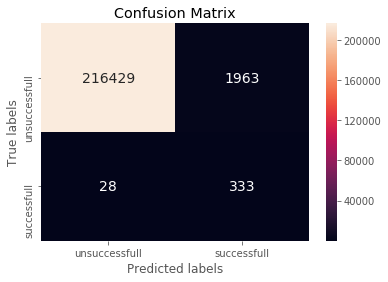

Accuracy score: 0.9908984105360841
Sensitivity score: 0.9224376731301939
Specificity score: 0.9910115755155866
f1-score: 0.25065863756115925
Precision score: 0.14503484320557491
Recall score: 0.9224376731301939
AUC: 0.99


In [306]:
y_train_pred = clf.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = clf.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [307]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.752790  0.988920  0.752399
0.2   0.2  0.915695  0.966759  0.915610
0.3   0.3  0.958734  0.950139  0.958748
0.4   0.4  0.981477  0.933518  0.981556
0.5   0.5  0.990898  0.922438  0.991012
0.6   0.6  0.994848  0.916898  0.994977
0.7   0.7  0.999287  0.886427  0.999473
0.8   0.8  0.999456  0.864266  0.999679
0.9   0.9  0.999497  0.850416  0.999744


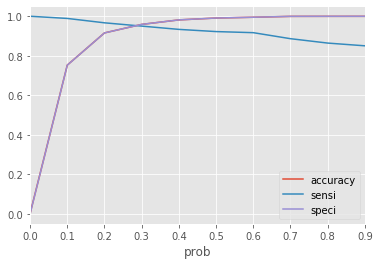

In [308]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.2 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

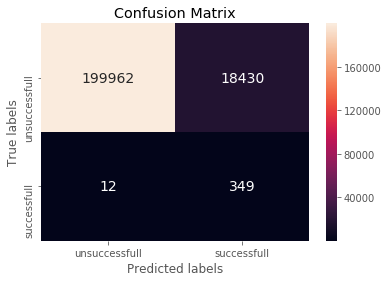

Accuracy score: 0.9156948704703478
Sensitivity score: 0.9667590027700831
Specificity score: 0.9156104619216822
f1-score: 0.036468129571577856
Precision score: 0.01858458916875233
Recall score: 0.9667590027700831
AUC: 0.99


In [309]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.2)#cutoff probability is 0.2

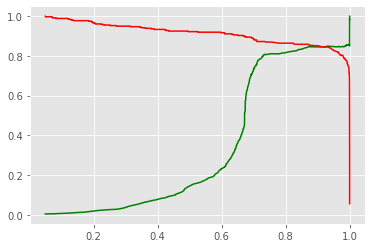

In [310]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

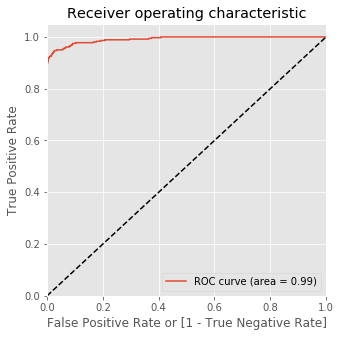

In [311]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

## Evaluate model on test data and check the score

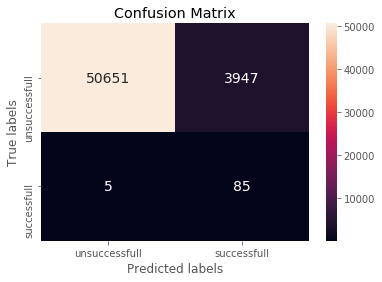

Accuracy score: 0.927735517846694
Sensitivity score: 0.9444444444444444
Specificity score: 0.9277079746510861
f1-score: 0.04124211547792334
Precision score: 0.021081349206349208
Recall score: 0.9444444444444444
AUC: 0.98


In [312]:
# predict fraud on test data
y_test_pred = clf.predict(X_test_transformed)

# check area under curve
y_pred_prob = clf.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.2)# cutoff probability is 0.2

### Draw ROC Curve

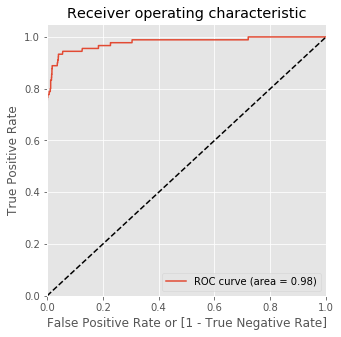

In [313]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Feature Importance

In [314]:
#features list
features_list = X_train_transformed.columns

#features importance
features_importance = list(clf.feature_importances_)

#create dataframe with feature importance in percentage
params_df = pd.DataFrame({'feature':features_list,'coefficient':features_importance})
params_df = params_df.sort_values(by='coefficient',ascending=False).reset_index(drop=True)
params_df

feature  coefficient
0          V14     0.599855
1          V10     0.190026
2           V4     0.066938
3          V17     0.064889
4          V11     0.037902
5          V12     0.013016
6   Amount_log     0.007589
7           V7     0.005846
8     Time_rsc     0.003968
9           V3     0.002920
10         V21     0.001500
11          V8     0.001256
12         V16     0.001056
13         V20     0.000922
14         V19     0.000395
15         V18     0.000379
16          V2     0.000249
17         V25     0.000199
18         V13     0.000177
19         V23     0.000177
20         V26     0.000152
21          V5     0.000133
22         V27     0.000121
23         V28     0.000099
24          V9     0.000092
25          V1     0.000091
26         V24     0.000034
27         V22     0.000017
28         V15     0.000002
29          V6     0.000000

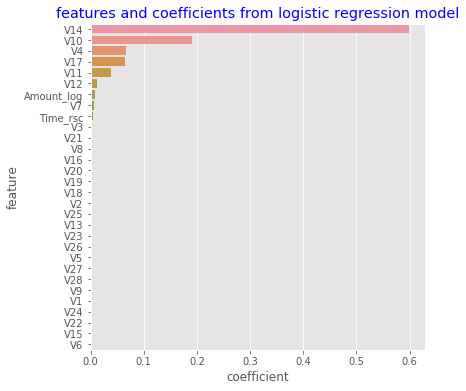

In [315]:
plt.figure(figsize=(6,6))
plt.title('features and coefficients from logistic regression model',color='blue')
sns.barplot(y='feature',x='coefficient',data=params_df);

### Observation from above plot
- V14 forms the very important predictor with positive coefficient. 
- V10 and V12 are also important predictors
- Amount_log also seems to be a fair predictor

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 4


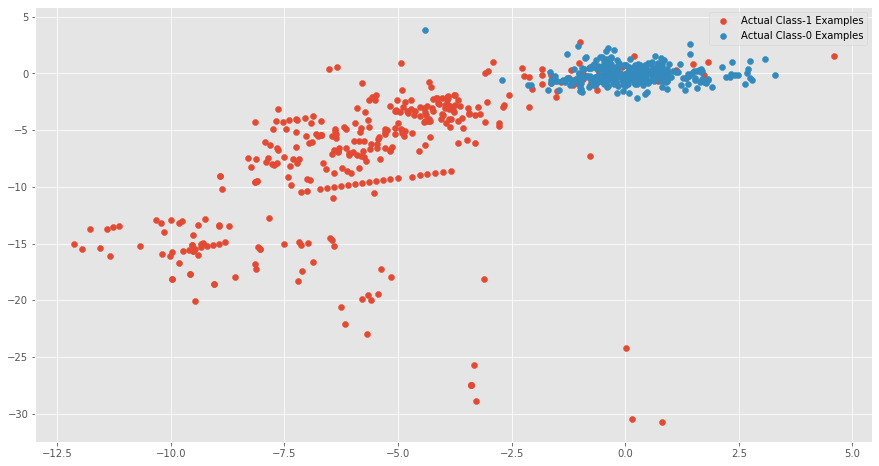

In [316]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_smote.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_smote.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.figure(figsize=(15,8))

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend();

### ADASYN

#### Resample X_train_transformed and y_train using ADASYN

In [317]:
#print('Original dataset shape %s' % Counter(y))
print('Original dataset shape \n{0}'.format(y_train.value_counts()))
adasyn = ADASYN(random_state=42)
X_train_adasyn,y_train_adasyn = adasyn.fit_resample(X_train_transformed,y_train)
#print('Resampled dataset shape %s' % Counter(y_oversampler))
print('Resampled dataset shape \n{0}'.format(
    pd.DataFrame(y_train_adasyn,columns=['Class'])['Class'].value_counts()))

Original dataset shape 
0    218392
1       361
Name: Class, dtype: int64
Resampled dataset shape 
0    218392
1    218369
Name: Class, dtype: int64


### Print the class distribution after applying ADASYN

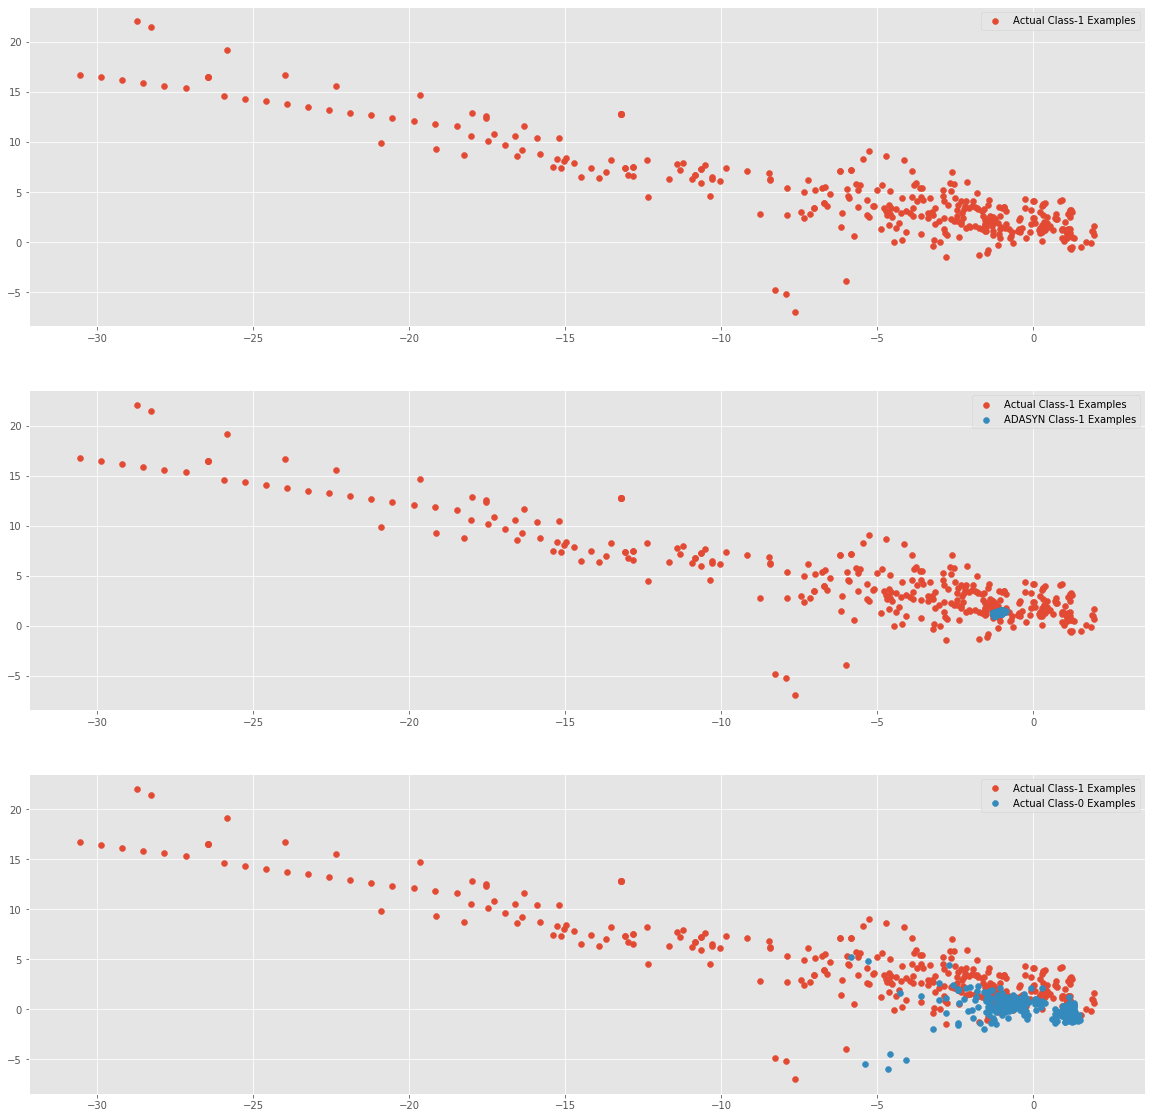

In [318]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend();

In [319]:
#Convert into dataframe
X_train_adasyn = pd.DataFrame(X_train_adasyn,columns=X_train_transformed.columns)
y_train_adasyn = pd.Series(y_train_adasyn)

## Logistic Regression

In [320]:
#create Logistic Regression variable
#using class_weight as 'balanced'
logistic_reg = LogisticRegression(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate adasyn
adasyn = ADASYN(random_state=42)

#create pipeline
pipeline = make_pipeline(adasyn,logistic_reg)

#create parameters that will be used during randomsearch
params = {
    'logisticregression__C':[0.1],#[0.1,0.5,0.8,1,2,5], #regularization term. smaller number means more regularization
    'logisticregression__penalty':['l2'],#['l1','l2'], #norm used in penalization
    'logisticregression__solver':['liblinear']#['liblinear','saga']
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
logistic_adasyn_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [321]:
logistic_adasyn_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.4s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('adasyn',
                                              ADASYN(n_jobs=1, n_neighbors=5,
                                                     random_state=42,
                                                     ratio=None,
                                                     sampling_strategy='auto')),
                                             ('logisticregression',
                                              LogisticRegression(C=1.0,
                                                                 class_weight='balanced',
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=No

In [322]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", logistic_adasyn_randomsearch.best_score_)
print(logistic_adasyn_randomsearch.best_params_)

best accuracy 0.9637717153110017
{'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l2', 'logisticregression__C': 0.1}


In [323]:
# scores of RandomizedSearchCV
scores = logistic_adasyn_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.248987      0.866082         0.025606          0.0039   

  param_logisticregression__solver param_logisticregression__penalty  \
0                        liblinear                                l2   

  param_logisticregression__C  \
0                         0.1   

                                              params  split0_test_score  \
0  {'logisticregression__solver': 'liblinear', 'l...           0.995896   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.962554           0.940255           0.959134           0.961021   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.963772        0.017975                1            0.989962   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.989241            0.994617            0.991042   

   split4_train_score  mean_train_score  std_train_score  
0            0.991281          0.991229         0.001848

### predict y_train data

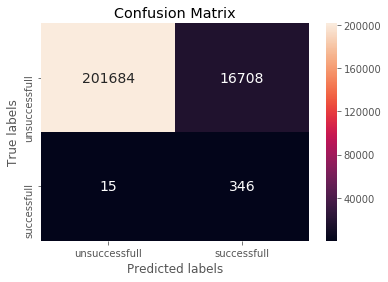

Accuracy score: 0.923553048415336
Sensitivity score: 0.9584487534626038
Specificity score: 0.9234953661306275
f1-score: 0.03973585989089865
Precision score: 0.02028849536765568
Recall score: 0.9584487534626038
AUC: 0.99


In [324]:
y_train_pred = logistic_adasyn_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = logistic_adasyn_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [325]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.609724  0.994460  0.609088
0.2   0.2  0.756730  0.986150  0.756351
0.3   0.3  0.839655  0.977839  0.839426
0.4   0.4  0.891457  0.969529  0.891328
0.5   0.5  0.923553  0.958449  0.923495
0.6   0.6  0.944705  0.955679  0.944687
0.7   0.7  0.959265  0.947368  0.959284
0.8   0.8  0.970515  0.944598  0.970558
0.9   0.9  0.981815  0.922438  0.981913


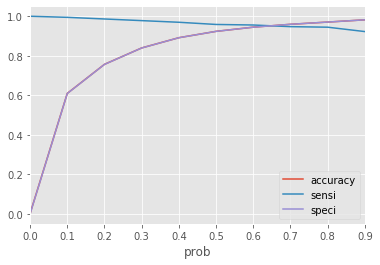

In [326]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.6 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

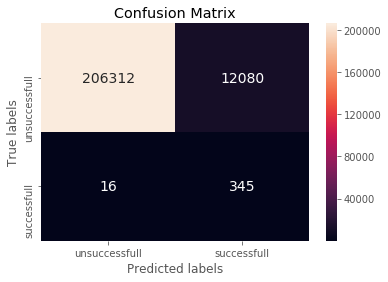

Accuracy score: 0.9447047583347429
Sensitivity score: 0.9556786703601108
Specificity score: 0.9446866185574563
f1-score: 0.05396527451900516
Precision score: 0.027766599597585512
Recall score: 0.9556786703601108
AUC: 0.99


In [327]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.6)#cutoff probability is 0.6

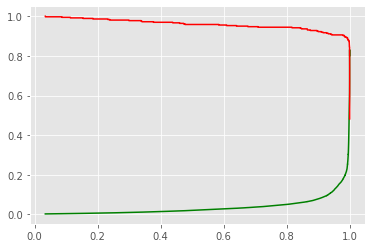

In [328]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

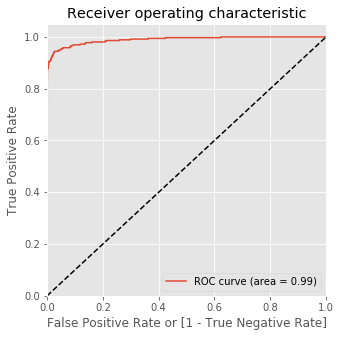

In [329]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [330]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'Logistic_Adasyn', #model_name
              12, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

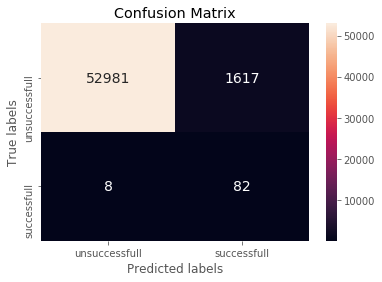

Accuracy score: 0.9702859859566998
Sensitivity score: 0.9111111111111111
Specificity score: 0.9703835305322539
f1-score: 0.09167132476243711
Precision score: 0.04826368452030606
Recall score: 0.9111111111111111
AUC: 0.98


In [331]:
# predict fraud on test data
y_test_pred = logistic_adasyn_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = logistic_adasyn_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.6)# cutoff probability is 0.6

### Draw ROC Curve

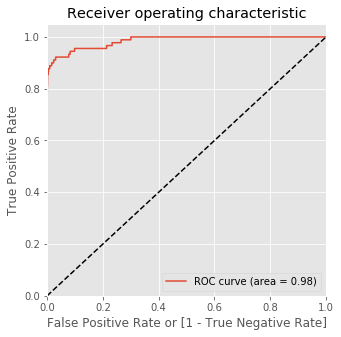

In [332]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [333]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'Logistic_Adasyn', #model_name
              12, #location or index
              'test' #train or test set
             )

In [334]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[12,'roc_auc'] = round(roc_score,2)
results_df.loc[12,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[12,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[12,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.5867834066237708
precision-recall threshold: 0.04609890503953082


In [335]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                   Logistic      0.95             0.95       0.95       0.03   
1               DecisionTree      0.85             0.99       0.85       0.01   
2               RandomForest      0.95             0.98       0.95       0.03   
3                    XGBoost         1             0.88          1        0.8   
4       Logistic_Oversampler      0.92             0.97       0.92       0.02   
5   DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6   RandomForest_Oversampler      0.92             0.98       0.92       0.02   
7        XGBoost_Oversampler      0.98                1       0.98       0.07   
8             Logistic_Smote      0.93             0.96       0.93       0.02   
9         DecisionTree_Smote      0.92             0.96       0.92       0.02   
10        RandomForest_Smote      0.91             0.97       0.91       0.02   
11             XGBoost_Smote      0.95             0.98       0.95       0.03   
12           Logistic_Adasyn      0.94             0.96       0.94       0.03   

   train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0      0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1      0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2      0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3      0.84        1            0.76         1      0.85     0.8    0.98   
4      0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5      0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6      0.04     0.95             0.9      0.95      0.03    0.05    0.98   
7      0.12     0.99            0.89      0.99      0.11     0.2    0.98   
8      0.04     0.97            0.92      0.97      0.05     0.1    0.98   
9      0.04     0.95            0.86      0.95      0.03    0.05    0.92   
10     0.03     0.91            0.94      0.91      0.02    0.03    0.98   
11     0.06     0.98            0.88      0.98      0.06    0.12    0.98   
12     0.05     0.97            0.91      0.97      0.05    0.09    0.98   

   roc_threshold prec_rec_roc prec_rec_threshold  
0           0.56         0.77                  0  
1           0.43         0.76                  0  
2           0.27         0.81               0.03  
3              0         0.82                  0  
4           0.27         0.79               0.02  
5           0.66         0.73                  0  
6           0.28         0.76               0.03  
7           0.15         0.82               0.03  
8           0.21          0.8               0.01  
9           0.36         0.72                  0  
10          0.25         0.77               0.02  
11          0.13         0.82               0.02  
12          0.59         0.77               0.05

## Decision Tree

In [336]:
#create Logistic Regression variable
#using class_weight as 'balanced'
decisontree = DecisionTreeClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate adasyn
adasyn = ADASYN(random_state=42)

#create pipeline
pipeline = make_pipeline(adasyn,decisontree)

#create parameters that will be used during randomsearch
params = {
    'decisiontreeclassifier__max_depth': [4],#[4,8,10], # maximum depth of the tree,
    'decisiontreeclassifier__min_samples_leaf': [100],#[50,80,100,120], #minimum sample observations at the leaf
    'decisiontreeclassifier__min_samples_split': [120],#[50,80,100,120], #minmum sample observations at the node during split
    'decisiontreeclassifier__max_features': [20],#[5,8,10,12,15,20], # number of features
    'decisiontreeclassifier__criterion': ['entropy'],#['gini','entropy'] #function to measure quality of split
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
decisontree_adasyn_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, 
                                                  scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [337]:
decisontree_adasyn_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('adasyn',
                                              ADASYN(n_jobs=1, n_neighbors=5,
                                                     random_state=42,
                                                     ratio=None,
                                                     sampling_strategy='auto')),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                                     class_weight='balanced',
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features=None,
                                            

In [338]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", decisontree_adasyn_randomsearch.best_score_)
print(decisontree_adasyn_randomsearch.best_params_)

best accuracy 0.867270763132268
{'decisiontreeclassifier__min_samples_split': 120, 'decisiontreeclassifier__min_samples_leaf': 100, 'decisiontreeclassifier__max_features': 20, 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__criterion': 'entropy'}


In [339]:
# scores of RandomizedSearchCV
scores = decisontree_adasyn_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.161587      0.229507         0.026735        0.004354   

  param_decisiontreeclassifier__min_samples_split  \
0                                             120   

  param_decisiontreeclassifier__min_samples_leaf  \
0                                            100   

  param_decisiontreeclassifier__max_features  \
0                                         20   

  param_decisiontreeclassifier__max_depth  \
0                                       4   

  param_decisiontreeclassifier__criterion  \
0                                 entropy   

                                              params  split0_test_score  \
0  {'decisiontreeclassifier__min_samples_split': ...           0.989046   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.973879           0.923264            0.96571           0.484454   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.867271        0.192649                1            0.976893   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.982162            0.992192            0.983695   

   split4_train_score  mean_train_score  std_train_score  
0            0.974253          0.981839         0.006209

### predict y_train data

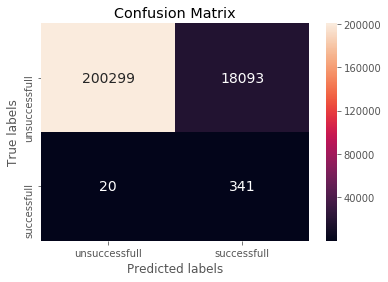

Accuracy score: 0.917198849844345
Sensitivity score: 0.9445983379501385
Specificity score: 0.9171535587384153
f1-score: 0.03628624634211226
Precision score: 0.01849842682000651
Recall score: 0.9445983379501385
AUC: 0.98


In [340]:
y_train_pred = decisontree_adasyn_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = decisontree_adasyn_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [341]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.062395  1.000000  0.060845
0.1   0.1  0.559590  1.000000  0.558862
0.2   0.2  0.578031  0.997230  0.577338
0.3   0.3  0.748365  0.972299  0.747994
0.4   0.4  0.914662  0.944598  0.914612
0.5   0.5  0.917199  0.944598  0.917154
0.6   0.6  0.917199  0.944598  0.917154
0.7   0.7  0.917199  0.944598  0.917154
0.8   0.8  0.945354  0.927978  0.945383
0.9   0.9  0.998194  0.836565  0.998461


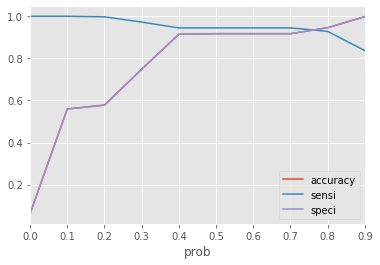

In [342]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.3 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

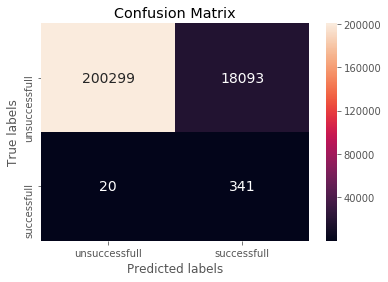

Accuracy score: 0.917198849844345
Sensitivity score: 0.9445983379501385
Specificity score: 0.9171535587384153
f1-score: 0.03628624634211226
Precision score: 0.01849842682000651
Recall score: 0.9445983379501385
AUC: 0.98


In [343]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.6)#cutoff probability is 0.6

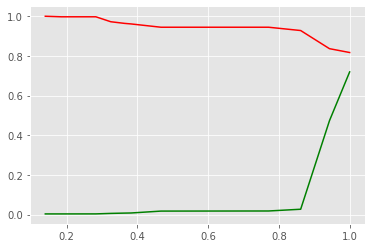

In [344]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

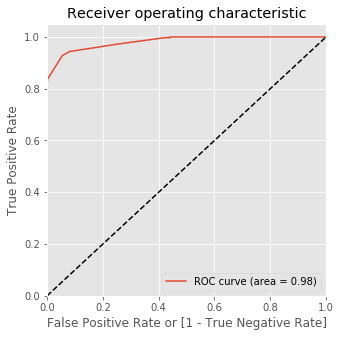

In [345]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [346]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'DecisionTree_Adasyn', #model_name
              13, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

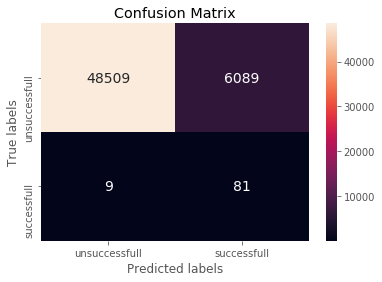

Accuracy score: 0.8884947337624342
Sensitivity score: 0.9
Specificity score: 0.8884757683431628
f1-score: 0.02587859424920128
Precision score: 0.01312803889789303
Recall score: 0.9
AUC: 0.93


In [347]:
# predict fraud on test data
y_test_pred = decisontree_adasyn_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = decisontree_adasyn_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.6)# cutoff probability is 0.6

### Draw ROC Curve

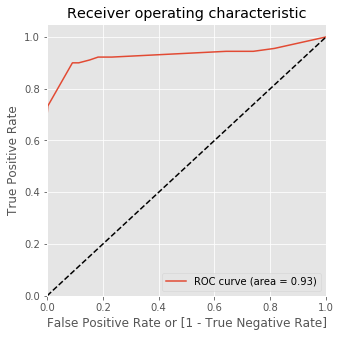

In [348]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [349]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'DecisionTree_Adasyn', #model_name
              13, #location or index
              'test' #train or test set
             )

In [350]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[13,'roc_auc'] = round(roc_score,2)
results_df.loc[13,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[13,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[13,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.8604609643266163
precision-recall threshold: 0.0


In [351]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                   Logistic      0.95             0.95       0.95       0.03   
1               DecisionTree      0.85             0.99       0.85       0.01   
2               RandomForest      0.95             0.98       0.95       0.03   
3                    XGBoost         1             0.88          1        0.8   
4       Logistic_Oversampler      0.92             0.97       0.92       0.02   
5   DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6   RandomForest_Oversampler      0.92             0.98       0.92       0.02   
7        XGBoost_Oversampler      0.98                1       0.98       0.07   
8             Logistic_Smote      0.93             0.96       0.93       0.02   
9         DecisionTree_Smote      0.92             0.96       0.92       0.02   
10        RandomForest_Smote      0.91             0.97       0.91       0.02   
11             XGBoost_Smote      0.95             0.98       0.95       0.03   
12           Logistic_Adasyn      0.94             0.96       0.94       0.03   
13       DecisionTree_Adasyn      0.92             0.94       0.92       0.02   

   train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0      0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1      0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2      0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3      0.84        1            0.76         1      0.85     0.8    0.98   
4      0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5      0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6      0.04     0.95             0.9      0.95      0.03    0.05    0.98   
7      0.12     0.99            0.89      0.99      0.11     0.2    0.98   
8      0.04     0.97            0.92      0.97      0.05     0.1    0.98   
9      0.04     0.95            0.86      0.95      0.03    0.05    0.92   
10     0.03     0.91            0.94      0.91      0.02    0.03    0.98   
11     0.06     0.98            0.88      0.98      0.06    0.12    0.98   
12     0.05     0.97            0.91      0.97      0.05    0.09    0.98   
13     0.04     0.89             0.9      0.89      0.01    0.03    0.93   

   roc_threshold prec_rec_roc prec_rec_threshold  
0           0.56         0.77                  0  
1           0.43         0.76                  0  
2           0.27         0.81               0.03  
3              0         0.82                  0  
4           0.27         0.79               0.02  
5           0.66         0.73                  0  
6           0.28         0.76               0.03  
7           0.15         0.82               0.03  
8           0.21          0.8               0.01  
9           0.36         0.72                  0  
10          0.25         0.77               0.02  
11          0.13         0.82               0.02  
12          0.59         0.77               0.05  
13          0.86          0.7                  0

## Random Forest

In [352]:
#create Random Forest variable
#using class_weight as 'balanced'
randomforest = RandomForestClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate adasyn
adasyn = ADASYN(random_state=42)

#create pipeline
pipeline = make_pipeline(adasyn,randomforest)


# {'decisontree__criterion': 'entropy', 'decisontree__max_depth': 4, 'decisontree__max_features': 20, 
#  'decisontree__min_samples_leaf': 100, 'decisontree__min_samples_split': 120}

#create parameters that will be used during randomsearch
params = {
    'randomforestclassifier__max_depth': [4],#[4,8,10], # maximum depth of the tree,
    'randomforestclassifier__min_samples_leaf': [100],#[50,80,100,120], #minimum sample observations at the leaf
    'randomforestclassifier__min_samples_split': [120],#[50,80,100,120], #minmum sample observations at the node during split
    'randomforestclassifier__max_features': [20],#[5,8,10,12,15,20], # number of features
    'randomforestclassifier__criterion': ['entropy'],#['gini','entropy'], #function to measure quality of split
    'randomforestclassifier__n_estimators': [200],#[100,200,300], # no. of trees to be build
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
randomforest_adasyn_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [353]:
randomforest_adasyn_randomsearch.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.2min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('adasyn',
                                              ADASYN(n_jobs=1, n_neighbors=5,
                                                     random_state=42,
                                                     ratio=None,
                                                     sampling_strategy='auto')),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight='balanced',
                                                                     criterion='gini',
                                                                     max_depth=None,
                                               

In [354]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", randomforest_adasyn_randomsearch.best_score_)
print(randomforest_adasyn_randomsearch.best_params_)

best accuracy 0.9761461113822433
{'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 120, 'randomforestclassifier__min_samples_leaf': 100, 'randomforestclassifier__max_features': 20, 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'entropy'}


In [355]:
# scores of RandomizedSearchCV
scores = randomforest_adasyn_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0    1072.072439     13.360625         0.749336        0.099077   

  param_randomforestclassifier__n_estimators  \
0                                        200   

  param_randomforestclassifier__min_samples_split  \
0                                             120   

  param_randomforestclassifier__min_samples_leaf  \
0                                            100   

  param_randomforestclassifier__max_features  \
0                                         20   

  param_randomforestclassifier__max_depth  \
0                                       4   

  param_randomforestclassifier__criterion  \
0                                 entropy   

                                              params  split0_test_score  \
0  {'randomforestclassifier__n_estimators': 200, ...           0.995503   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.979776           0.957513           0.969423           0.978516   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.976146        0.012537                1            0.992922   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.992369            0.997119             0.99581   

   split4_train_score  mean_train_score  std_train_score  
0            0.994586          0.994561         0.001766

### predict y_train data

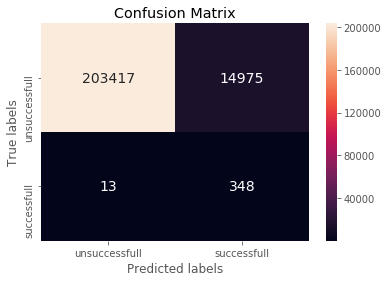

Accuracy score: 0.9314843682143787
Sensitivity score: 0.96398891966759
Specificity score: 0.9314306384849262
f1-score: 0.04437643458301454
Precision score: 0.02271095738432422
Recall score: 0.96398891966759
AUC: 0.99


In [356]:
y_train_pred = randomforest_adasyn_randomsearch.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = randomforest_adasyn_randomsearch.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [357]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.472858  1.000000  0.471986
0.2   0.2  0.670610  1.000000  0.670066
0.3   0.3  0.810668  0.997230  0.810359
0.4   0.4  0.885496  0.986150  0.885330
0.5   0.5  0.931484  0.963989  0.931431
0.6   0.6  0.956202  0.952909  0.956207
0.7   0.7  0.975049  0.925208  0.975132
0.8   0.8  0.989125  0.905817  0.989262
0.9   0.9  0.997755  0.864266  0.997976


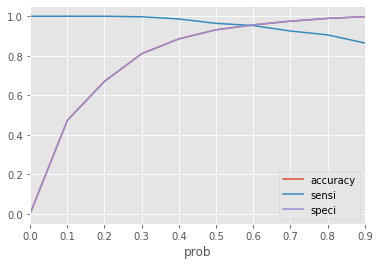

In [358]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.5 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

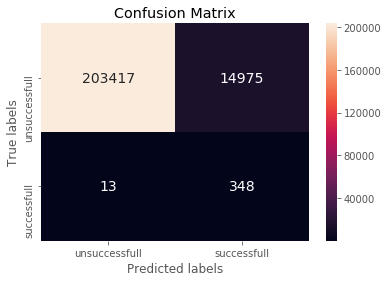

Accuracy score: 0.9314843682143787
Sensitivity score: 0.96398891966759
Specificity score: 0.9314306384849262
f1-score: 0.04437643458301454
Precision score: 0.02271095738432422
Recall score: 0.96398891966759
AUC: 0.99


In [359]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.5)#cutoff probability is 0.5

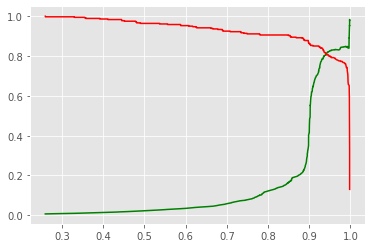

In [360]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

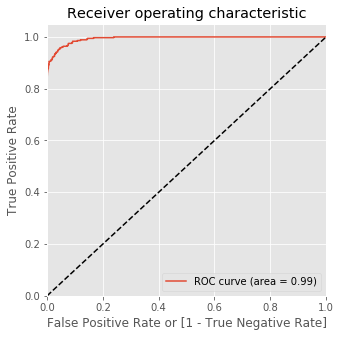

In [361]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [362]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'RandomForest_Adasyn', #model_name
              14, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

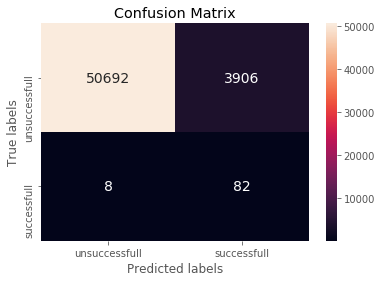

Accuracy score: 0.9284303686366296
Sensitivity score: 0.9111111111111111
Specificity score: 0.928458917909081
f1-score: 0.04021579205492889
Precision score: 0.020561685055165497
Recall score: 0.9111111111111111
AUC: 0.97


In [363]:
# predict fraud on test data
y_test_pred = randomforest_adasyn_randomsearch.predict(X_test_transformed)

# check area under curve
y_pred_prob = randomforest_adasyn_randomsearch.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.5)# cutoff probability is 0.5

### Draw ROC Curve

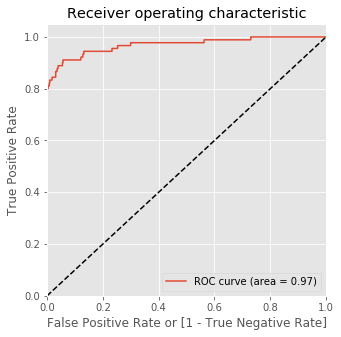

In [364]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [365]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'RandomForest_Adasyn', #model_name
              14, #location or index
              'test' #train or test set
             )

In [366]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[14,'roc_auc'] = round(roc_score,2)
results_df.loc[14,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[14,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[14,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.5485914498874513
precision-recall threshold: 0.021712971410857852


In [367]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                   Logistic      0.95             0.95       0.95       0.03   
1               DecisionTree      0.85             0.99       0.85       0.01   
2               RandomForest      0.95             0.98       0.95       0.03   
3                    XGBoost         1             0.88          1        0.8   
4       Logistic_Oversampler      0.92             0.97       0.92       0.02   
5   DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6   RandomForest_Oversampler      0.92             0.98       0.92       0.02   
7        XGBoost_Oversampler      0.98                1       0.98       0.07   
8             Logistic_Smote      0.93             0.96       0.93       0.02   
9         DecisionTree_Smote      0.92             0.96       0.92       0.02   
10        RandomForest_Smote      0.91             0.97       0.91       0.02   
11             XGBoost_Smote      0.95             0.98       0.95       0.03   
12           Logistic_Adasyn      0.94             0.96       0.94       0.03   
13       DecisionTree_Adasyn      0.92             0.94       0.92       0.02   
14       RandomForest_Adasyn      0.93             0.96       0.93       0.02   

   train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0      0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1      0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2      0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3      0.84        1            0.76         1      0.85     0.8    0.98   
4      0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5      0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6      0.04     0.95             0.9      0.95      0.03    0.05    0.98   
7      0.12     0.99            0.89      0.99      0.11     0.2    0.98   
8      0.04     0.97            0.92      0.97      0.05     0.1    0.98   
9      0.04     0.95            0.86      0.95      0.03    0.05    0.92   
10     0.03     0.91            0.94      0.91      0.02    0.03    0.98   
11     0.06     0.98            0.88      0.98      0.06    0.12    0.98   
12     0.05     0.97            0.91      0.97      0.05    0.09    0.98   
13     0.04     0.89             0.9      0.89      0.01    0.03    0.93   
14     0.04     0.93            0.91      0.93      0.02    0.04    0.97   

   roc_threshold prec_rec_roc prec_rec_threshold  
0           0.56         0.77                  0  
1           0.43         0.76                  0  
2           0.27         0.81               0.03  
3              0         0.82                  0  
4           0.27         0.79               0.02  
5           0.66         0.73                  0  
6           0.28         0.76               0.03  
7           0.15         0.82               0.03  
8           0.21          0.8               0.01  
9           0.36         0.72                  0  
10          0.25         0.77               0.02  
11          0.13         0.82               0.02  
12          0.59         0.77               0.05  
13          0.86          0.7                  0  
14          0.55         0.79               0.02

## XGBoost

In [368]:
#create XGBoost variable
#using class_weight as 'balanced'
xgboost = XGBClassifier(class_weight='balanced')#'{1:0.9, 0:0.1}')

#initiate adasyn
adasyn = ADASYN(random_state=42)

#create pipeline
pipeline = make_pipeline(adasyn,xgboost)


#create parameters that will be used during randomsearch
params = {
    'xgbclassifier__learning_rate': [0.02],#[0.01,0.02,0.03],# learning rate,
    'xgbclassifier__min_child_weight': [8],#[5,6,7,8,9], #minimum sum of weights of all observations required in a child
    'xgbclassifier__gamma': [2.5],#[1, 1.5, 2, 2.5, 3], #minimum loss reduction required to make a split
    'xgbclassifier__n_estimators': [250],#[200,250,300], # no. of trees to be build
    'xgbclassifier__colsample_bytree': [0.8],#[0.6, 0.8, 0.9, 1.0] #fraction of columns to be randomly samples for each tree
    }

#create RandomizedSearchCV object to find best param that we will use in our final model building process
xgboost_adasyn_randomsearch = RandomizedSearchCV(estimator = pipeline, param_distributions=params, verbose=1, scoring='roc_auc', 
                          n_jobs=-1, return_train_score=True
                         )

## Fit the model

In [369]:
xgboost_adasyn_randomsearch.fit(X_train_transformed.values,y_train.values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.6min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('adasyn',
                                              ADASYN(n_jobs=1, n_neighbors=5,
                                                     random_state=42,
                                                     ratio=None,
                                                     sampling_strategy='auto')),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            class_weight='balanced',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
           

In [370]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", xgboost_adasyn_randomsearch.best_score_)
print(xgboost_adasyn_randomsearch.best_params_)

best accuracy 0.9705436319392667
{'xgbclassifier__n_estimators': 250, 'xgbclassifier__min_child_weight': 8, 'xgbclassifier__learning_rate': 0.02, 'xgbclassifier__gamma': 2.5, 'xgbclassifier__colsample_bytree': 0.8}


In [371]:
# scores of RandomizedSearchCV
scores = xgboost_adasyn_randomsearch.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     500.911136      2.244347         0.702799        0.069674   

  param_xgbclassifier__n_estimators param_xgbclassifier__min_child_weight  \
0                               250                                     8   

  param_xgbclassifier__learning_rate param_xgbclassifier__gamma  \
0                               0.02                        2.5   

  param_xgbclassifier__colsample_bytree  \
0                                   0.8   

                                              params  split0_test_score  \
0  {'xgbclassifier__n_estimators': 250, 'xgbclass...           0.996293   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.972413           0.945786           0.963938           0.974288   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.970544        0.016353                1            0.997805   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.998489            0.999254             0.99873   

   split4_train_score  mean_train_score  std_train_score  
0            0.998351          0.998526         0.000474

### predict y_train data

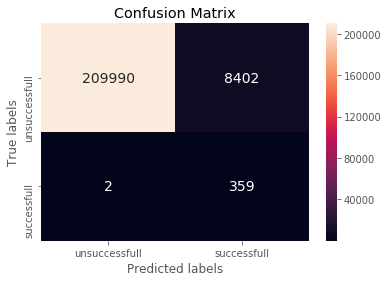

Accuracy score: 0.9615822411578355
Sensitivity score: 0.9944598337950139
Specificity score: 0.9615278947946811
f1-score: 0.07871080903310676
Precision score: 0.040977057413537264
Recall score: 0.9944598337950139
AUC: 1.0


In [372]:
y_train_pred = xgboost_adasyn_randomsearch.predict(X_train_transformed.values)
# check area under curve
y_train_pred_prob = xgboost_adasyn_randomsearch.predict_proba(X_train_transformed.values)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [373]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.636234  1.000000  0.635632
0.2   0.2  0.819084  1.000000  0.818785
0.3   0.3  0.898470  1.000000  0.898302
0.4   0.4  0.939032  0.997230  0.938935
0.5   0.5  0.961582  0.994460  0.961528
0.6   0.6  0.973802  0.980609  0.973790
0.7   0.7  0.981312  0.961219  0.981345
0.8   0.8  0.988754  0.939058  0.988837
0.9   0.9  0.996663  0.903047  0.996818


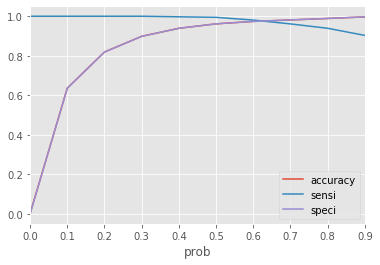

In [374]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.6 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

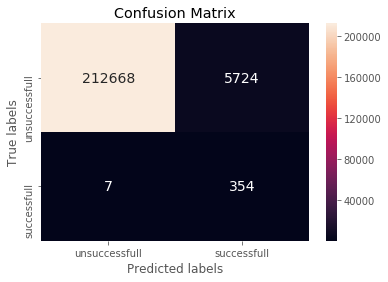

Accuracy score: 0.9738015021508276
Sensitivity score: 0.9806094182825484
Specificity score: 0.9737902487270595
f1-score: 0.10995496195061345
Precision score: 0.05824284304047384
Recall score: 0.9806094182825484
AUC: 1.0


In [375]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,
                                                                y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.6)#cutoff probability is 0.6

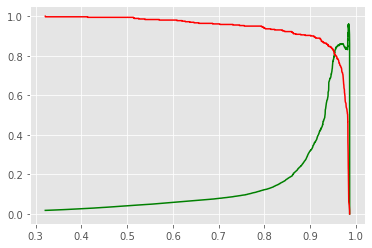

In [376]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Draw ROC Curve

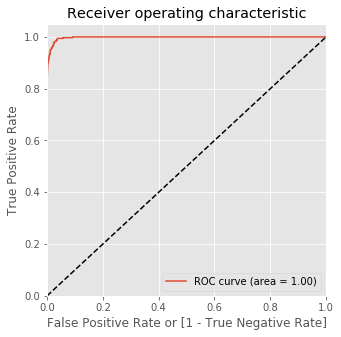

In [377]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Lets store results in results_df

In [378]:
store_results(y_train_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'XGBoost_Adasyn', #model_name
              15, #location or index
              'train' #train or test set
             )

## Evaluate model on test data and check the score

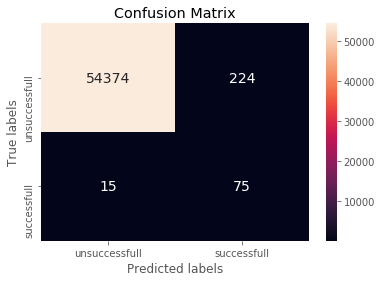

Accuracy score: 0.995629754242247
Sensitivity score: 0.8333333333333334
Specificity score: 0.9958972856148577
f1-score: 0.3856041131105398
Precision score: 0.2508361204013378
Recall score: 0.8333333333333334
AUC: 0.98


In [379]:
# predict fraud on test data
y_test_pred = xgboost_adasyn_randomsearch.predict(X_test_transformed.values)

# check area under curve
y_pred_prob = xgboost_adasyn_randomsearch.predict_proba(X_test_transformed.values)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,
                                                               y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.6)# cutoff probability is 0.6

### Draw ROC Curve

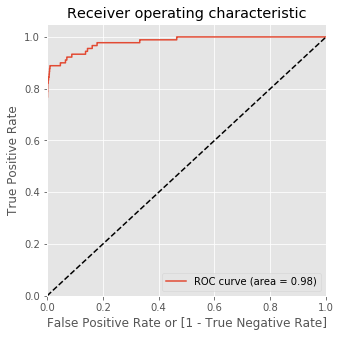

In [380]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

### Lets store results in results_df

In [381]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'XGBoost_Adasyn', #model_name
              15, #location or index
              'test' #train or test set
             )

In [382]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
roc_threshold = thresholds[np.argmax(tpr-fpr)]
roc_score = roc_auc_score(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
print('FPR-TPR threshold: {0}'.format(roc_threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
prec_threshold = thresholds[np.argmax(r-p)]
prec_rec_roc = auc(r,p)
print('precision-recall threshold: {0}'.format(prec_threshold))

### Lets store results in results_df
results_df.loc[15,'roc_auc'] = round(roc_score,2)
results_df.loc[15,'roc_threshold'] = round(roc_threshold,2)
results_df.loc[15,'prec_rec_roc'] = round(prec_rec_roc,2)
results_df.loc[15,'prec_rec_threshold'] = round(prec_threshold,2)

FPR-TPR threshold: 0.44754651188850403
precision-recall threshold: 0.027292611077427864


In [383]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                   Logistic      0.95             0.95       0.95       0.03   
1               DecisionTree      0.85             0.99       0.85       0.01   
2               RandomForest      0.95             0.98       0.95       0.03   
3                    XGBoost         1             0.88          1        0.8   
4       Logistic_Oversampler      0.92             0.97       0.92       0.02   
5   DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6   RandomForest_Oversampler      0.92             0.98       0.92       0.02   
7        XGBoost_Oversampler      0.98                1       0.98       0.07   
8             Logistic_Smote      0.93             0.96       0.93       0.02   
9         DecisionTree_Smote      0.92             0.96       0.92       0.02   
10        RandomForest_Smote      0.91             0.97       0.91       0.02   
11             XGBoost_Smote      0.95             0.98       0.95       0.03   
12           Logistic_Adasyn      0.94             0.96       0.94       0.03   
13       DecisionTree_Adasyn      0.92             0.94       0.92       0.02   
14       RandomForest_Adasyn      0.93             0.96       0.93       0.02   
15            XGBoost_Adasyn      0.97             0.98       0.97       0.06   

   train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0      0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1      0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2      0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3      0.84        1            0.76         1      0.85     0.8    0.98   
4      0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5      0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6      0.04     0.95             0.9      0.95      0.03    0.05    0.98   
7      0.12     0.99            0.89      0.99      0.11     0.2    0.98   
8      0.04     0.97            0.92      0.97      0.05     0.1    0.98   
9      0.04     0.95            0.86      0.95      0.03    0.05    0.92   
10     0.03     0.91            0.94      0.91      0.02    0.03    0.98   
11     0.06     0.98            0.88      0.98      0.06    0.12    0.98   
12     0.05     0.97            0.91      0.97      0.05    0.09    0.98   
13     0.04     0.89             0.9      0.89      0.01    0.03    0.93   
14     0.04     0.93            0.91      0.93      0.02    0.04    0.97   
15     0.11        1            0.83         1      0.25    0.39    0.98   

   roc_threshold prec_rec_roc prec_rec_threshold  
0           0.56         0.77                  0  
1           0.43         0.76                  0  
2           0.27         0.81               0.03  
3              0         0.82                  0  
4           0.27         0.79               0.02  
5           0.66         0.73                  0  
6           0.28         0.76               0.03  
7           0.15         0.82               0.03  
8           0.21          0.8               0.01  
9           0.36         0.72                  0  
10          0.25         0.77               0.02  
11          0.13         0.82               0.02  
12          0.59         0.77               0.05  
13          0.86          0.7                  0  
14          0.55         0.79               0.02  
15          0.45         0.79               0.03

## Final Model - Random Forest - with balancing dataset

In [384]:
#create Random Forest variable
#using class_weight as 'balanced'
clf = RandomForestClassifier(class_weight='balanced',
                            max_depth = 4,
                            min_samples_leaf = 100,
                            min_samples_split=120,
                            max_features = 20,
                            criterion = 'entropy',
                            n_estimators = 200)
clf.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=120,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### predict y_train data

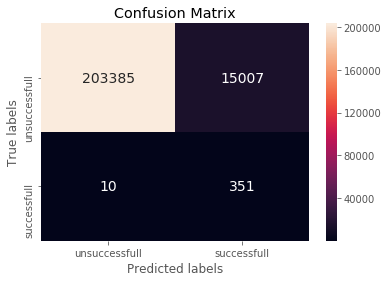

Accuracy score: 0.9313517986039048
Sensitivity score: 0.9722991689750693
Specificity score: 0.9312841129711711
f1-score: 0.04465932947388511
Precision score: 0.022854538351347833
Recall score: 0.9722991689750693
AUC: 0.99


In [385]:
y_train_pred = clf.predict(X_train_transformed)
# check area under curve
y_train_pred_prob = clf.predict_proba(X_train_transformed)[:, 1]
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob)

### <font size=3 color=blue>Lets check if we need to change the cutoff and see if senstivity and specificty can change</font>

In [386]:
#check_cutoff(y_train_pred_final)
cutoff_df = check_cutoff(y_train_pred_final)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001650  1.000000  0.000000
0.1   0.1  0.485319  1.000000  0.484468
0.2   0.2  0.681326  1.000000  0.680799
0.3   0.3  0.809616  0.997230  0.809306
0.4   0.4  0.887174  0.988920  0.887006
0.5   0.5  0.931352  0.972299  0.931284
0.6   0.6  0.955795  0.952909  0.955800
0.7   0.7  0.974766  0.925208  0.974848
0.8   0.8  0.988773  0.905817  0.988910
0.9   0.9  0.996608  0.880886  0.996799


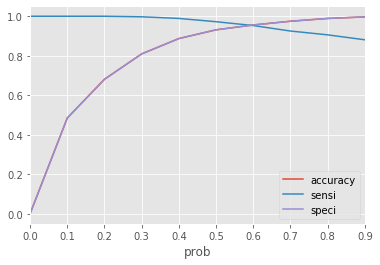

In [387]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations from above plot
- 0.2 is the optimum point to take it as cutoff probability

### Based on the probability cutoff lets do predictions mapping again

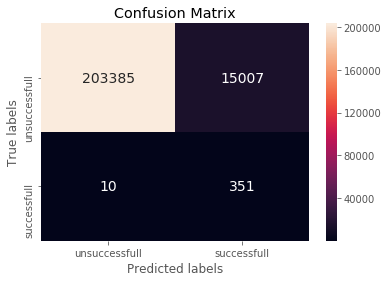

Accuracy score: 0.9313517986039048
Sensitivity score: 0.9722991689750693
Specificity score: 0.9312841129711711
f1-score: 0.04465932947388511
Precision score: 0.022854538351347833
Recall score: 0.9722991689750693
AUC: 0.99


In [388]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred,y_train_pred_prob,
                                                                prob_cutoff=0.5)#cutoff probability is 0.5

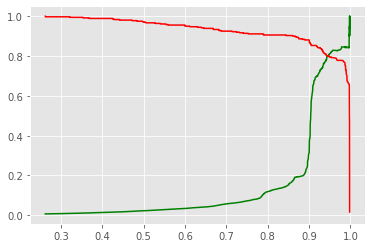

In [389]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [390]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
threshold = thresholds[np.argmax(tpr-fpr)]
print('FPR-TPR threshold: {0}'.format(threshold))
p, r, thresholds = precision_recall_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])
threshold = thresholds[np.argmax(r-p)]
print('precision-recall threshold: {0}'.format(threshold))

FPR-TPR threshold: 0.5997158224581106
precision-recall threshold: 0.26240261431773554


### Draw ROC Curve

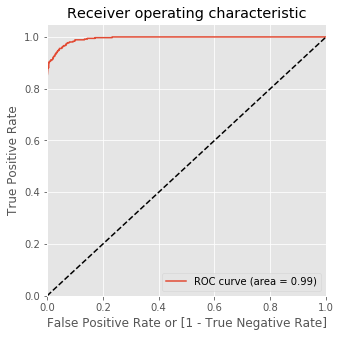

In [391]:
draw_roc(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

### Draw Precision Recall Curve

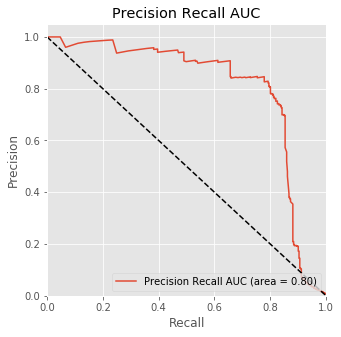

In [392]:
draw_prec_rec(y_train_pred_final['Class'],y_train_pred_final['Class_Prob'])

## Evaluate model on test data and check the score

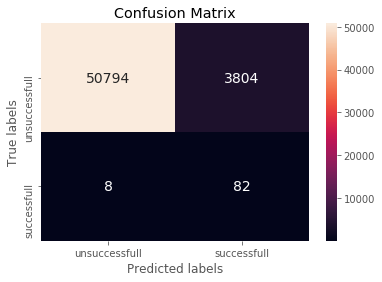

Accuracy score: 0.9302954944411936
Sensitivity score: 0.9111111111111111
Specificity score: 0.9303271182094582
f1-score: 0.04124748490945675
Precision score: 0.02110138960370561
Recall score: 0.9111111111111111
AUC: 0.97


In [393]:
# predict fraud on test data
y_test_pred = clf.predict(X_test_transformed)

# check area under curve
y_pred_prob = clf.predict_proba(X_test_transformed)[:, 1]### Test model on test data and check the score 

# use funtcion to final predictions and confusion matrix
y_test_pred_final, conf_matrix = createfinaldf_and_checkscores(y_test,y_test_pred,y_pred_prob,
                                                              prob_cutoff=0.5)# cutoff probability is 0.5

### Draw ROC Curve

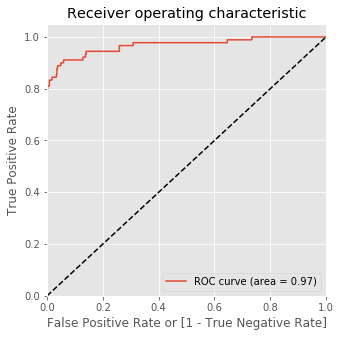

In [394]:
draw_roc(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

In [395]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.5324035794482991


### Draw Precision Recall Curve

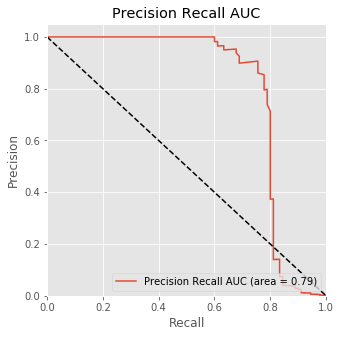

In [396]:
draw_prec_rec(y_test_pred_final['Class'],y_test_pred_final['Class_Prob'])

In [397]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
threshold = thresholds[np.argmax(tpr-fpr)]
print('FPR-TPR threshold: {0}'.format(threshold))
p, r, thresholds = precision_recall_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])
threshold = thresholds[np.argmax(r-p)]### Lets store results in results_df

store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'XGBoost_Adasyn', #model_name
              15, #location or index
              'test' #train or test set
             )
print('precision-recall threshold: {0}'.format(threshold))

FPR-TPR threshold: 0.5324035794482991
precision-recall threshold: 0.020205534149722797


### Lets store results in results_df

In [398]:
store_results(y_test_pred_final, #dataframe
              conf_matrix, #confusion_matrix
              'XGBoost_Adasyn', #model_name
              15, #location or index
              'test' #train or test set
             )

### Feature Importance

In [399]:
#features list
features_list = X_train_transformed.columns

#features importance
features_importance = list(clf.feature_importances_)

#create dataframe with feature importance in percentage
params_df = pd.DataFrame({'feature':features_list,'coefficient':features_importance})
params_df = params_df.sort_values(by='coefficient',ascending=False).reset_index(drop=True)
params_df

feature  coefficient
0          V14     0.447465
1           V4     0.282331
2          V12     0.056183
3          V10     0.053546
4          V17     0.027392
5           V8     0.022389
6     Time_rsc     0.021325
7          V20     0.012910
8   Amount_log     0.012568
9           V5     0.010957
10         V26     0.008867
11          V3     0.008673
12         V24     0.006358
13         V19     0.006285
14         V23     0.005643
15         V25     0.004034
16         V11     0.002880
17         V18     0.002435
18         V15     0.001518
19          V9     0.001309
20          V1     0.001139
21         V21     0.001048
22         V13     0.000927
23         V28     0.000684
24         V27     0.000312
25         V16     0.000304
26         V22     0.000284
27          V7     0.000138
28          V2     0.000069
29          V6     0.000026

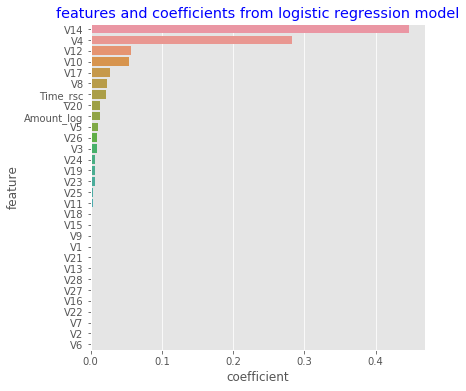

In [400]:
plt.figure(figsize=(6,6))
plt.title('features and coefficients from logistic regression model',color='blue')
sns.barplot(y='feature',x='coefficient',data=params_df);

### Observation from above plot
- V14 forms the very important predictor with positive coefficient. 
- V10 and V12 are also important predictors
- Amount_pwrt and Time_rsc are also good predictors

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 4
3rd Top var = 12


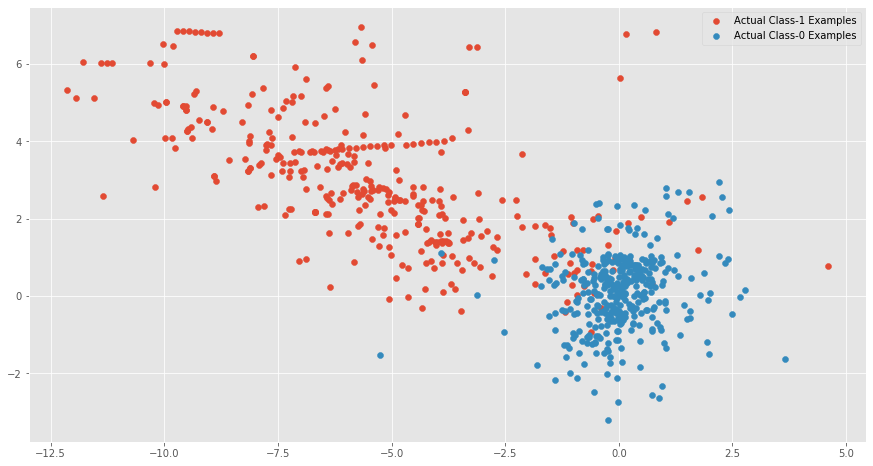

In [401]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_adasyn.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_adasyn.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.figure(figsize=(15,8))

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend();

In [402]:
results_df

model_type train_acc train_sen_recall train_spec train_prec  \
0                   Logistic      0.95             0.95       0.95       0.03   
1               DecisionTree      0.85             0.99       0.85       0.01   
2               RandomForest      0.95             0.98       0.95       0.03   
3                    XGBoost         1             0.88          1        0.8   
4       Logistic_Oversampler      0.92             0.97       0.92       0.02   
5   DecisionTree_Oversampler      0.96             0.95       0.96       0.04   
6   RandomForest_Oversampler      0.92             0.98       0.92       0.02   
7        XGBoost_Oversampler      0.98                1       0.98       0.07   
8             Logistic_Smote      0.93             0.96       0.93       0.02   
9         DecisionTree_Smote      0.92             0.96       0.92       0.02   
10        RandomForest_Smote      0.91             0.97       0.91       0.02   
11             XGBoost_Smote      0.95             0.98       0.95       0.03   
12           Logistic_Adasyn      0.94             0.96       0.94       0.03   
13       DecisionTree_Adasyn      0.92             0.94       0.92       0.02   
14       RandomForest_Adasyn      0.93             0.96       0.93       0.02   
15            XGBoost_Adasyn      0.97             0.98       0.97       0.06   

   train_f1 test_acc test_sen_recall test_spec test_prec test_f1 roc_auc  \
0      0.06     0.97            0.89      0.97      0.05     0.1    0.97   
1      0.02     0.84             0.9      0.84      0.01    0.02    0.92   
2      0.06     0.96            0.91      0.96      0.04    0.07    0.98   
3      0.84        1            0.76         1      0.85     0.8    0.98   
4      0.04     0.96            0.92      0.96      0.04    0.07    0.99   
5      0.08     0.97            0.79      0.97      0.04    0.08    0.85   
6      0.04     0.95             0.9      0.95      0.03    0.05    0.98   
7      0.12     0.99            0.89      0.99      0.11     0.2    0.98   
8      0.04     0.97            0.92      0.97      0.05     0.1    0.98   
9      0.04     0.95            0.86      0.95      0.03    0.05    0.92   
10     0.03     0.91            0.94      0.91      0.02    0.03    0.98   
11     0.06     0.98            0.88      0.98      0.06    0.12    0.98   
12     0.05     0.97            0.91      0.97      0.05    0.09    0.98   
13     0.04     0.89             0.9      0.89      0.01    0.03    0.93   
14     0.04     0.93            0.91      0.93      0.02    0.04    0.97   
15     0.11     0.93            0.91      0.93      0.02    0.04    0.98   

   roc_threshold prec_rec_roc prec_rec_threshold  
0           0.56         0.77                  0  
1           0.43         0.76                  0  
2           0.27         0.81               0.03  
3              0         0.82                  0  
4           0.27         0.79               0.02  
5           0.66         0.73                  0  
6           0.28         0.76               0.03  
7           0.15         0.82               0.03  
8           0.21          0.8               0.01  
9           0.36         0.72                  0  
10          0.25         0.77               0.02  
11          0.13         0.82               0.02  
12          0.59         0.77               0.05  
13          0.86          0.7                  0  
14          0.55         0.79               0.02  
15          0.45         0.79               0.03

# Conslusion and Recommendations
- Random Forest with SMOTE balancing technique did a good job with train Recall of 0.97 and test recall of 0.94 and train precision of 0.02 and test precision of 0.02. F1-score is of 0.03 and ROC is 0.98
- XGBoost also did a good job but the test evaulation metrics are not stable wrt train metrics. We may need to tune hyperparameters more to get the better results
- Overall precision with each model is less. May be further check on data provided is needed 
- So we will go with final model of Random Forest with SMOTE (which we have already built above in final model building step with SMOTE balancing technique)
- V14, V10, V4 are important predictors. Amount in log form is also a fairly good predictor 